# 환경 설정

## 한글 및 필수 Package 설치

In [1]:
import os
# os.chdir('/root/jupyter_notebook/keras/sungnam')
!pwd
#!sudo timedatectl set-timezone Asia/Seoul
!date


/workspace
Mon Nov 17 16:56:10 KST 2025


In [2]:
# Keras / Tensorflow 외 설치 Package

# !pip install pandas
# !pip install scikit-learn
# !pip install openpyxl
# !pip install tabulate

In [3]:
from IPython.core.magic import register_cell_magic

@register_cell_magic
def skip(line, cell):
    flag = line.strip().split(' ')[0]
    msg  = line.strip()[len(flag):]
    if globals()[flag] == True:
        print(msg)
        return
    else:
        exec(cell, globals())


In [4]:
import matplotlib.font_manager as fm
from fontTools.ttLib import TTFont
import unicodedata

def check_korean_font_available():
    # 한글 유니코드 범위
    def is_korean(char):
        return 0xAC00 <= ord(char) <= 0xD7A3 or 0x3131 <= ord(char) <= 0x3163

    # 모든 폰트를 순회
    for font_path in fm.findSystemFonts(fontpaths=None, fontext='ttf'):
        try:
            font = TTFont(font_path)
            for cmap in font['cmap'].tables:
                if cmap.isUnicode():
                    for char in cmap.cmap.keys():
                        if is_korean(chr(char)):
                            return True
        except:
            continue
    
    return False


def install_fonts():
    # 폰트 설치
    !sudo apt-get -qq -y install fonts-nanum > /dev/null
    # 폰트 cache 강제 갱신
    # 정상 설치시 /usr/share/fonts/truetype/nanum: caching... 출력
    !sudo fc-cache -f -v | grep nanum
    # matplotlib cache 삭제
    # 만약 cache를 삭제하지 않은 경우 간혹 한글 폰트를 가져오지 못하는 문제 발생함. 
    !rm -rf ~/.cache/matplotlib


In [5]:
# 한글 폰트 사용 가능 여부
installedKorFont = check_korean_font_available()
print(f"- 한글 폰트 사용 가능: {installedKorFont}")

# Google Colab에서 실행 여부
isColab = 'google.colab' in str(get_ipython())
print(f"- Google Colab 여부 : {isColab}")


# 환경 설정
if not installedKorFont:
    install_fonts()


- 한글 폰트 사용 가능: True
- Google Colab 여부 : False


In [6]:
%%skip installedKorFont 한글 폰트 설치되어 있으므로 재기동 하지 않음.

import os
import IPython

def restart_kernel():
    IPython.Application.instance().kernel.do_shutdown(restart=True)

restart_kernel()
print("Kernel is restarted.")

 한글 폰트 설치되어 있으므로 재기동 하지 않음.


## 환경 설정

In [7]:
## nbconverter로 외부 실행시 default 값을 True로 변경하여 사용하기 위헤
# notebook의 tag 기능을 사용 ( cell의 tag에 parameters 삽입함 - 셀 삭제나 복사에 유의 ) 

# GPU 관련 설정 (가능한 비결정론적 알고리즘을 방지)
GPU_FIX = False

# 수동 실행 or 외부 설정 파일로 자동 실행 여부 ( True/False )
isSkipDataChart = True
isSkipPredictChart = True
isSkipPredictDetailChart = True

is_save_result = True
is_save_predict = True

is_save_model = True
is_read_config = False
is_save_data = True

use_sample_weight = False

# config name
config_name = 'sungnam_gn36_ver2'

# hyper parameter ( s:36, l:24-test_r2:0.9720897466704637)
#predict = 72
predict = 36
seq_length = 36
num_of_cells = [64, 64]
num_of_batch = 64
#learning_rate = 0.001
learning_rate = 0.0005

# MultiStep / multi_LSTM  : 72-1 / 36-2 / 24-3 / 18-4 / 12-6
# num_of_layer = 24
num_of_layer = 12
feedback_win_size = 1

# DG Best 0.973456 : V2-T3, Layer 24, Seq Length 36, smoothing_type=2
# GN Best 0.952333 : V1-T3, Layer 24, Seq Length 36, smoothing_type=1, moving_avg_win_size=4

smoothing_type = 2
# moving average window size
moving_avg_win_size = 4
# exponential smoothing alpha
es_alpha = 0.65
# Kalman filter
proc_v_init = 1e-3
meas_v_init = 1e-3

# Available Loss Function 
# 'mean_squared_error'
# 'mean_absolute_error'
# 'huber_loss'
# 'mean_squared_logarithmic_error'
# 'mean_absolute_percentage_error'
loss_func = 'mean_squared_error'

# Activation Function : LeakyReLU / ReLU / tanh / linear
activation_func='linear'

# Data Set 설정
# 입력 : [x,f]
# 출력 : y
x_cols = ['R_한국학중앙연구원', 'R_대장동', 'R_구미초교', 'R_대곡교', 'R_성남북초교', 'R_남한산초교', 'R_궁내교_Ti', 'R_대곡교_Ti', 'F_궁내교', 'F_대곡교']
f_cols = ['R_한국학중앙연구원', 'R_대장동', 'R_구미초교', 'R_대곡교', 'R_성남북초교', 'R_남한산초교', 'R_궁내교_Ti', 'R_대곡교_Ti']

# x_cols = ['R_한국학중앙연구원', 'R_대장동', 'R_구미초교', 'F_궁내교']
# f_cols = ['R_한국학중앙연구원', 'R_대장동', 'R_구미초교']

# y_cols  = ['F_궁내교','F_대곡교']
y_cols = ['F_대곡교']
#y_cols = ['F_궁내교']

train_events = [0, 1, 4, 5]
valid_events = [2]
test_events  = [3]

# 모델 설정 및 결과를 저장할 파일 ( 파일이 없는 경우 생성후 head 정보 추가됨. ) 
model_result_file = 'model_result.csv'

# 예측시 건별 예측 여부
isBatch = True


In [8]:
# Papermill는 parameters block 다음 block에 삽입되어 대체 되므로 같은 block에 변수 변경 내용이 있으면 이전값이 적용됨.
# 반드시 대체된 내용으로 적용시 다음 block에서 처리

# num_p_layer = predict//num_of_layer

v_step    = predict        # 36
v_num_y   = len(y_cols)    # 1
num_layers = num_of_layer  # 12

num_p_layer = (v_step * v_num_y) // num_layers  # 3

In [9]:
# 수동 실행 or 외부 설정 파일로 자동 실행 여부 ( True/False )
# 통합 예보 사용 여부  

# multi-step의 Base 모델 ( LSTM4Multi)
base_model_path = './model_stage/multistep_base_model'
base_scaler_path = './model_stage/multistep_base_scaler.pkl'

# multi-step 모델 ( MultiStep Model )
multistep_model_path  = './model_stage/multistep_model'
multistep_scaler_path = './model_stage/multistep_scaler.pkl'


# Multi-Step의 Base 모델이 2개인 경우 
base_model_path1  = './model_stage/multistep_base_model1'
base_model_path2  = './model_stage/multistep_base_model2'
base_scaler_path2 = './model_stage/multistep_base_scaler1.pkl'
base_scaler_path2 = './model_stage/multistep_base_scaler2.pkl'


## 한글 관련 Package 설정

In [10]:
# 한글 폰트 사용을 위한 설정

import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import warnings

#한글 폰트 관련 warning supress
warnings.filterwarnings(action='ignore')

fontpath = './font/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)

%matplotlib inline

# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic')


# jupyter nbconvert 실행시 한글이 나오지 않는 경우 아래 comment 해제 
fm.fontManager.addfont(fontpath)

Text(0.3, 0.4, '한글')

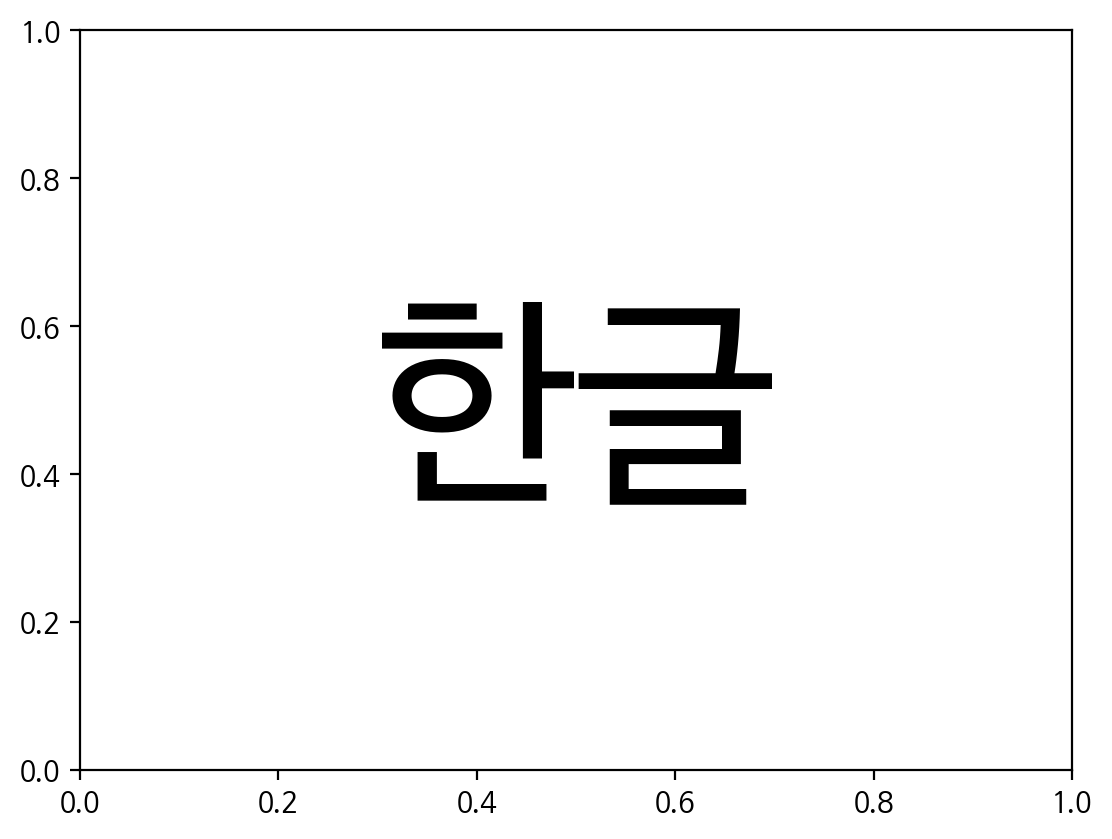

In [11]:
# 한글 출력 테스트

plt.text(0.3, 0.4, '한글', size=80)

## Library Import 

In [12]:
from IPython.display import display
from os import path
from datetime import datetime
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pprint
import tensorflow as tf
import keras

from sklearn.preprocessing import MinMaxScaler

RANDOM_SEED = 42

os.environ['PYTHONHASHSEED'] = str(RANDOM_SEED)
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

# tf.set_random_seed(RANDOM_SEED) --> deprecated 
tf.random.set_seed(RANDOM_SEED)

# GPU 관련 설정 (가능한 경우 CUDA의 비결정론적 알고리즘을 방지)
if GPU_FIX :
    # Tensorflow 비결정론적 동작 방지
    os.environ['TF_DETERMINISTIC_OPS'] = '1'
    # cuDNN 비결정론적 동작 방지
    os.environ['TF_CUDNN_DETERMINISTIC'] = '1'  
    # 사용할 GPU를 고정
    os.environ['CUDA_VISIBLE_DEVICES'] = '0' 


# 2.16 이상의 경우 keras.utils.set_random_seed 로 전체 random seed 고정 지원함.( 아래 링크 참조 )
# https://www.tensorflow.org/api_docs/python/tf/keras/utils/set_random_seed
# keras.utils.set_random_seed(RANDOM_SEED)

# jedi 자동 완성 사용하지 않음 
%config Completer.use_jedi = False

2025-11-17 16:56:10.953460: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-11-17 16:56:10.954546: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-11-17 16:56:10.973302: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-11-17 16:56:10.974366: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI AVX512_BF16 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-11-17 16:56:11.651137: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:3

In [13]:
import keras
print(keras.__version__)

import tensorflow as tf
print(tf.__version__)

from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

2.13.1
2.13.0
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 8986504150047189413
xla_global_id: -1
]


In [14]:
#자료 검토를 위해 컬럼과 행의 생략없이 출력하도록 옵션 변경

# row 생략 없이 100 행까지 출력
pd.set_option('display.max_rows', None)
# col 생략 없이 출력
pd.set_option('display.max_columns', None)

In [15]:
#모든 결과를 출력하도록 설정 [ all / last_expr ]

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last_expr"

def displayAll(isAll):
    if isAll==True :
        InteractiveShell.ast_node_interactivity = "all"
    else :
        InteractiveShell.ast_node_interactivity = "last_expr"


In [16]:
# 자동 실행시 tuning 실행 중단을 위한 함수 

class StopExecution(Exception):
    def _render_traceback_(self):
        # nbconvert error 시 return [] 사용
        return []
        # pass

def exit():
    raise StopExecution
    
# 해당 셀의 실행 중지 여부에 따라 중단하는 함수
def isStop(v_stop):
    if v_stop == True :
        print('isStop()에 의한 셀 실행 중지')
        exit()

In [17]:
# 설정 정보를 출력하는 함수
def print_result(v_result):
    print('[ Model Train and Predict Result ]')
    for key, value in v_result.items():
        print(f'{key}: {value}')

def print_config(v_config):
    print('# Execution Configuration')
    for key, value in v_config.items():
        print(f'{key}: {value}')

# 설정 정보를 파일에서 읽어오는 함수
# 설정 정보를 파일에서 읽어오는 함수
def read_config_file(filename):
    config = {}

    with open(filename, "r") as f:
        lines = f.readlines()
        for line in lines:
            line = line.strip()  # 줄의 앞뒤 공백 제거
            if not line or line.startswith('#'):  # 비어있거나 주석인 경우 무시
                continue

            key, value = line.split(':', 1)  # 첫 번째 ':' 기준으로 분리
            config[key.strip()] = eval(value.strip()) if key.strip() in ["input_data_types", "y_idxs", "train_events", "valid_events", "test_events"] else value.strip()  # 리스트로 변환
    return config




# Configuration

## Config 설정

In [18]:
# 설정 정보를 저장할 dictionary

config = {
    "name"         : config_name,
    "use_model"    : "MultiLSTM",
    "seq_length"   : seq_length,         # 한번에 입력되는 연속된 데이터 시간
    "lead_time"    : 0,                  # label로 사용할 Y값을 몇 시간 뒤로 보낼지 결정
    "predict"      : predict,            # 예측 시간
    "forecast"     : predict,            # 강수 예보 사용 시간
    "y_idxs"       : [-1],               # 목표값 컬럼들의 index 리스트
    "train_events" : train_events,       # Train할 Event index 리스트
    "valid_events" : valid_events,       # Validation Event index 리스트
    "test_events"  : test_events,        # Test Event index 리스트
    "isExecTuning" : False,              # Tuning 실행 여부

    "num_of_feature"  : 0 ,              # input feature 갯수 ( data set 설정에 따라 수정됨 )
    "num_of_forecast" : 0 ,              # forecast 컬럼 갯수  ( data set 설정에 따라 수정됨 )

    "num_of_cells"  : num_of_cells,      # LSTM Layer의 Cell 수
    "num_of_layer"  : num_of_layer,      # 병렬 LSTM Layer 수
    "smoothing_type": smoothing_type,    # smoothing 유형 
    "ma_win_size"   : moving_avg_win_size,# moving average window size 
    "fb_win_size"   : feedback_win_size, # moving average window size 
    
    
    "num_of_epochs" : 200,               # 최대 Epoch 수
    "num_of_batch"  : num_of_batch,      # batch size
    "learning_rate" : learning_rate,     # learning rate
    "dropout_rate"  : 0.0,               # drop out 비율
    "isEarlystop"   : True,              # Early Stop 여부
    "patience_count": 10,                # Early Stop stop 조건
    "isCheckpoint"  : False              # check point 저장 여부 
}



In [19]:
# 설정 정보 출력

if is_read_config :
    config = read_config_file('config.conf')

print_config(config)

# Execution Configuration
name: sungnam_gn36_ver2
use_model: MultiLSTM
seq_length: 36
lead_time: 0
predict: 36
forecast: 36
y_idxs: [-1]
train_events: [0, 1, 4, 5]
valid_events: [2]
test_events: [3]
isExecTuning: False
num_of_feature: 0
num_of_forecast: 0
num_of_cells: [64, 64]
num_of_layer: 12
smoothing_type: 2
ma_win_size: 4
fb_win_size: 1
num_of_epochs: 200
num_of_batch: 64
learning_rate: 0.0005
dropout_rate: 0.0
isEarlystop: True
patience_count: 10
isCheckpoint: False


# Data Set 구성

## Data Set Feature

In [20]:
# Raw Data Column Info
rain_cols = ['R_한국학중앙연구원', 'R_대장동', 'R_구미초교', 'R_대곡교', 'R_성남북초교', 'R_남한산초교', 'R_궁내교_Ti', 'R_대곡교_Ti']
flow_cols = ['F_궁내교', 'F_대곡교']

# 환경 설정에서 x_cols / f_cols / y_cols 값 설정함.
num_x = len(x_cols)
num_f = len(f_cols)
num_y = len(y_cols)

config['num_of_feature'] = num_x
config['num_of_forecast']= num_f


## 기본 함수 정의

In [21]:
def getShape(v_list):
    if isinstance(v_list, list):
        shape = []
        while isinstance(v_list, list):
            shape.append(len(v_list))
            v_list = v_list[0] if len(v_list) > 0 else []
        return tuple(shape)
    return None

def checkDF(df):
    print(f'[ Dataframe Info -Shape:{df.shape}, -index:{df.index.name},{df.index.dtype} ]')
    summary = pd.DataFrame(df.dtypes, columns=['데이터 타입'])
    summary = summary.reset_index()
    summary = summary.rename(columns={'index': 'Feature'})
    summary['결측값 개수'] = df.isnull().sum().values
    summary['고유값 개수'] = df.nunique().values
    summary['첫 번째 값'] = df.iloc[0].values
    summary['두 번째 값'] = df.iloc[1].values
    summary['세 번째 값'] = df.iloc[2].values

    return summary

# 1차원 Dataframe 리스트의 각 df의 Shape 보기 함수 
def showShape1D(df_lst, width=10, title=' 1D Data Frame List ') :
    i = 0  
    print(f'[ {title} : {len(df_lst)} ]')
    for df in df_lst:
        print(f'{df.shape[0]},{df.shape[1]}', end='\t')
        i += 1
        if i%width == 0 :
            print('')
    print('')

# 시간 format을 yyyymmddhh24 형태로 변경하는 함수 ( 각 자료 처리에 사용 )
#          ex, 2003091101
# dataframe의 각 행에 대해 각각 처리하기 위해서 apply(함수 or lamda 함수 ) 를 사용해야 함.

def formatYYYYMMDDHH(val) :
  datestr = str(val)
  if len(datestr) == 15 :
    return datestr[0:4] + datestr[5:7] + datestr[8:10] + '0' + datestr[11:12] 
  else :
    return datestr[0:4] + datestr[5:7] + datestr[8:10] + datestr[11:13] 

def formatYYYYMMDDHHMI(val) :
  datestr = str(val)
  if len(datestr) == 15 :
    return datestr[0:4] + datestr[5:7] + datestr[8:10] + '0' + datestr[11:12] + datestr[13:15]
  else :
    return datestr[0:4] + datestr[5:7] + datestr[8:10] + datestr[11:13] + datestr[14:16]

def getDurationStr(start_time, end_time) :
  diff_time = end_time - start_time
  hours, remainder = divmod(diff_time.seconds, 3600)
  minutes, seconds = divmod(remainder, 60)
  
  return f'{hours:02d}:{minutes:02d}:{seconds:02d}'

def getDurationFromNowStr(start_time) :
  diff_time = datetime.now() - start_time
  hours, remainder = divmod(diff_time.seconds, 3600)
  minutes, seconds = divmod(remainder, 60)
  
  return f'{hours:02d}:{minutes:02d}:{seconds:02d}'


## Data Loading

In [22]:
import pandas as pd
import glob

def read_excel_files(file_pattern):
    file_list = sorted(glob.glob(file_pattern), reverse=True)
    
    result = []
    
    # shape : [2 파일, 6 (filename, sheetnames, daataframes]
    for file in file_list:
        print(f'reading... {file}')

        sheets = pd.read_excel(file, sheet_name=None)
        
        sheet_data = [(file, sheet_name, df) for sheet_name, df in sheets.items()]
        result.append(sheet_data)
    
    return result

def makeDataFrame(file_pattern='./data/sungnam_*.xlsx'):

    data = read_excel_files(file_pattern)

    # shape : [2 파일, 6 (filename, sheetnames, daataframes]
    for file_sheets in data:
        print('[ File ]')
        # shape : [6 (filename, sheetnames, daataframes]
        for file, sheet_name, df in file_sheets:
            print(f"File: {file}, Sheet: {sheet_name}, DataFrame shape: {df.shape}")

    result = []
          
    #data[0]  : [ 6 (filename, sheetnames, daataframes) ]
    for i in range(len(data[0])):
        print(f"Two files's Sheet{i+1} is concatenated.")
        # concat : [ 6 (daataframes )  + 6 (daataframes ) ]
        event_df = pd.concat([data[0][i][2], data[1][i][2]], axis=1)
        result.append(event_df)
    
    return result


In [23]:

# excel 파일 처리를 위해서는 openpyxl 패키지 필요
# !pip install openpyxl

def cleanReform(df_list) :
    col_names  = ['DateTime', 'F_궁내교','R_한국학중앙연구원','R_대장동','R_구미초교','R_궁내교_Ti',
                  'DateTime2','F_대곡교', 'R_대곡교', 'R_성남북초교', 'R_남한산초교', 'R_대장동2', 'R_구미초교2', 'R_한국학중앙연구원2', 'R_대곡교_Ti' ]
    col_names2 = ['DateTime', 'R_한국학중앙연구원','R_대장동','R_구미초교', 'R_대곡교', 'R_성남북초교', 'R_남한산초교', 'R_대장동2', 'R_구미초교2', 'R_한국학중앙연구원2', 
                          'R_궁내교_Ti', 'R_대곡교_Ti' , 'F_궁내교', 'F_대곡교' ]

    cols_float64 = ['F_궁내교', 'F_대곡교'] 

    # index 0 은 표지
    for df in df_list:
        df.columns = col_names

    for df in df_list:
        diff_result = df[df.DateTime != df.DateTime2]
        print('- Different Time Count:', diff_result.DateTime.count())

    for i in range(len(df_list)):
        df_list[i] = df_list[i][1:]
        df_list[i].drop(columns=['DateTime2'], inplace=True)
        df_list[i].DateTime = df_list[i].DateTime.astype(str).str[0:16]
        df_list[i][cols_float64] = df_list[i][cols_float64].astype('float64')
        df_list[i] = df_list[i].reindex(columns=col_names2)


raw_dfs = makeDataFrame('./data/sungnam_*.xlsx')
raw_dfs = raw_dfs[1:]
cleanReform(raw_dfs)


reading... ./data/sungnam_gn.xlsx
reading... ./data/sungnam_dg.xlsx
[ File ]
File: ./data/sungnam_gn.xlsx, Sheet: 기간, DataFrame shape: (10, 10)
File: ./data/sungnam_gn.xlsx, Sheet: Event1, DataFrame shape: (299, 6)
File: ./data/sungnam_gn.xlsx, Sheet: Event2, DataFrame shape: (303, 6)
File: ./data/sungnam_gn.xlsx, Sheet: Event3, DataFrame shape: (597, 6)
File: ./data/sungnam_gn.xlsx, Sheet: Event4, DataFrame shape: (399, 6)
File: ./data/sungnam_gn.xlsx, Sheet: Event5, DataFrame shape: (496, 6)
File: ./data/sungnam_gn.xlsx, Sheet: Event6, DataFrame shape: (300, 6)
[ File ]
File: ./data/sungnam_dg.xlsx, Sheet: 기간, DataFrame shape: (10, 12)
File: ./data/sungnam_dg.xlsx, Sheet: Event1, DataFrame shape: (299, 9)
File: ./data/sungnam_dg.xlsx, Sheet: Event2, DataFrame shape: (303, 9)
File: ./data/sungnam_dg.xlsx, Sheet: Event3, DataFrame shape: (597, 9)
File: ./data/sungnam_dg.xlsx, Sheet: Event4, DataFrame shape: (399, 9)
File: ./data/sungnam_dg.xlsx, Sheet: Event5, DataFrame shape: (496, 9)

In [24]:
# 최종 Raw Data 확인

for i, df in enumerate(raw_dfs):
    print(f'Event Number : {i+1}')
    display(checkDF(df))
    print('\n')


Event Number : 1
[ Dataframe Info -Shape:(298, 14), -index:None,int64 ]


,Feature,데이터 타입,결측값 개수,고유값 개수,첫 번째 값,두 번째 값,세 번째 값
0,DateTime,object,0,298,2014-08-20 10:50,2014-08-20 11:00,2014-08-20 11:10
1,R_한국학중앙연구원,float64,0,8,0.0,0.0,0.0
2,R_대장동,float64,0,8,0.0,0.0,0.0
3,R_구미초교,float64,0,8,0.0,0.0,0.0
4,R_대곡교,float64,0,9,0.0,0.0,0.0
5,R_성남북초교,float64,0,9,0.0,0.0,0.0
6,R_남한산초교,float64,0,8,0.0,0.0,0.0
7,R_대장동2,float64,0,8,0.0,0.0,0.0
8,R_구미초교2,float64,0,8,0.0,0.0,0.0
9,R_한국학중앙연구원2,float64,0,8,0.0,0.0,0.0




Event Number : 2
[ Dataframe Info -Shape:(302, 14), -index:None,int64 ]


,Feature,데이터 타입,결측값 개수,고유값 개수,첫 번째 값,두 번째 값,세 번째 값
0,DateTime,object,0,302,2017-07-15 04:50,2017-07-15 05:00,2017-07-15 05:10
1,R_한국학중앙연구원,float64,0,13,7.0,8.0,4.0
2,R_대장동,float64,0,13,3.0,2.0,6.0
3,R_구미초교,float64,0,10,1.0,4.0,1.0
4,R_대곡교,float64,0,11,5.0,4.0,12.0
5,R_성남북초교,float64,0,10,0.0,2.0,4.0
6,R_남한산초교,float64,0,8,0.0,0.0,1.0
7,R_대장동2,float64,0,13,3.0,2.0,6.0
8,R_구미초교2,float64,0,10,1.0,4.0,1.0
9,R_한국학중앙연구원2,float64,0,13,7.0,8.0,4.0




Event Number : 3
[ Dataframe Info -Shape:(596, 14), -index:None,int64 ]


,Feature,데이터 타입,결측값 개수,고유값 개수,첫 번째 값,두 번째 값,세 번째 값
0,DateTime,object,0,596,2020-08-05 05:50,2020-08-05 06:00,2020-08-05 06:10
1,R_한국학중앙연구원,float64,0,9,0.0,0.0,0.0
2,R_대장동,float64,0,12,0.0,0.0,0.0
3,R_구미초교,float64,0,13,0.0,0.0,0.0
4,R_대곡교,float64,0,10,0.0,0.0,0.0
5,R_성남북초교,float64,0,8,0.0,0.0,0.0
6,R_남한산초교,float64,0,10,0.0,0.0,0.0
7,R_대장동2,float64,0,12,0.0,0.0,0.0
8,R_구미초교2,float64,0,13,0.0,0.0,0.0
9,R_한국학중앙연구원2,float64,0,9,0.0,0.0,0.0




Event Number : 4
[ Dataframe Info -Shape:(398, 14), -index:None,int64 ]


,Feature,데이터 타입,결측값 개수,고유값 개수,첫 번째 값,두 번째 값,세 번째 값
0,DateTime,object,0,398,2022-06-29 08:20,2022-06-29 08:30,2022-06-29 08:39
1,R_한국학중앙연구원,float64,0,14,0.0,0.0,0.0
2,R_대장동,float64,0,14,0.0,0.0,0.0
3,R_구미초교,float64,0,13,0.0,0.0,0.0
4,R_대곡교,float64,0,9,0.0,0.0,0.0
5,R_성남북초교,float64,0,13,0.0,0.0,0.0
6,R_남한산초교,float64,0,13,0.0,0.0,0.0
7,R_대장동2,float64,0,14,0.0,0.0,0.0
8,R_구미초교2,float64,0,13,0.0,0.0,0.0
9,R_한국학중앙연구원2,float64,0,14,0.0,0.0,0.0




Event Number : 5
[ Dataframe Info -Shape:(495, 14), -index:None,int64 ]


,Feature,데이터 타입,결측값 개수,고유값 개수,첫 번째 값,두 번째 값,세 번째 값
0,DateTime,object,0,495,2022-08-07 21:10,2022-08-07 21:20,2022-08-07 21:30
1,R_한국학중앙연구원,float64,0,18,0.0,0.0,0.0
2,R_대장동,float64,0,19,0.0,0.0,0.0
3,R_구미초교,float64,0,17,0.0,0.0,0.0
4,R_대곡교,float64,0,16,0.0,0.0,0.0
5,R_성남북초교,float64,0,21,0.0,0.0,0.0
6,R_남한산초교,float64,0,17,0.0,0.0,0.0
7,R_대장동2,float64,0,19,0.0,0.0,0.0
8,R_구미초교2,float64,0,17,0.0,0.0,0.0
9,R_한국학중앙연구원2,float64,0,18,0.0,0.0,0.0




Event Number : 6
[ Dataframe Info -Shape:(299, 14), -index:None,int64 ]


,Feature,데이터 타입,결측값 개수,고유값 개수,첫 번째 값,두 번째 값,세 번째 값
0,DateTime,object,0,299,2023-07-13 05:00,2023-07-13 05:10,2023-07-13 05:20
1,R_한국학중앙연구원,float64,0,8,0.0,0.0,0.0
2,R_대장동,float64,0,8,0.0,0.0,0.0
3,R_구미초교,float64,0,9,0.0,0.0,0.0
4,R_대곡교,float64,0,7,0.0,0.0,0.0
5,R_성남북초교,float64,0,6,0.0,0.0,0.0
6,R_남한산초교,float64,0,8,0.0,0.0,0.0
7,R_대장동2,float64,0,8,0.0,0.0,0.0
8,R_구미초교2,float64,0,9,0.0,0.0,0.0
9,R_한국학중앙연구원2,float64,0,8,0.0,0.0,0.0


In [25]:
import pickle

if is_save_data :
    os.makedirs('./model_stage', exist_ok=True)
    datafile = './model_stage/rawdata_all_event_df.pkl'
    with open(datafile, 'wb') as file:
        pickle.dump(raw_dfs, file)

    print(f'[{len(raw_dfs)} count] Event Data Sets List are saved in {datafile}')

    with open(datafile, 'rb') as file:
        temp = pickle.load(file)
        print(f'checking event count : {len(temp)}')

    for event in temp:
        print(f'checking df : {event.shape}')


[6 count] Event Data Sets List are saved in ./model_stage/rawdata_all_event_df.pkl
checking event count : 6
checking df : (298, 14)
checking df : (302, 14)
checking df : (596, 14)
checking df : (398, 14)
checking df : (495, 14)
checking df : (299, 14)


## Data 검토 및 Visualization

In [26]:
# 그래프 관련 함수
# sub-graph 배열
# 횡축 : Set 종류
# 종축 : Input 유형

def drawSmallChart(v_set, isCompare, min_val, max_val, v_ax, v_width, y_label, title ) :
  
    v_set.plot.line(ax=v_ax)

    if isCompare :
        # Real 컬럼은 실선으로 설정
        for i in range(v_set.shape[1]//2):
            v_ax.lines[i].set_linestyle('-')
        
        # Simulation 컬럼은 점선으로 설정
        for i in range(v_set.shape[1]//2, v_set.shape[1]):
            v_ax.lines[i].set_linestyle('--')

    v_ax.set_title(title)
    v_ax.set_xlabel(' ', fontsize=12)
    v_ax.set_ylabel(y_label, fontsize=12)
    v_ax.grid(True, axis='y', linestyle='--')
    v_ax.tick_params(axis='x', rotation=45)
    v_ax.set_ylim([min_val, max_val])
    v_ax.legend(loc='upper left')
    
def drawRowChart(all_set, col_list, isCompare, min_val, max_val, lst_ax, y_label, grid_col, grid_row):
    for i in range(0,len(all_set)) :
        flow_only = all_set[i][col_list]
        # drawSmallChart(flow_only, isCompare, min_val, max_val, lst_ax[i], 0.8, y_label, f'DataSet {grid_row*grid_col + i}')
        drawSmallChart(flow_only, isCompare, min_val, max_val, lst_ax[i], 0.8, y_label, f' ')

def drawGridChart(df_list, col_list, isCompare, col_num, title):
    maxvalue = 0      
    for df in df_list:
        pd_max = df[col_list].max().max()
        if pd_max > maxvalue :
            maxvalue = pd_max
    # chartmax = (maxvalue//100 + 1)*100
    chartmax = maxvalue*1.05

    row_num = len(df_list) // col_num
    if len(df_list) % col_num > 0 :
        row_num = row_num + 1

    fig_W = 6
    fig_H = 6
    totalW= fig_W * col_num
    totalH =fig_H * row_num

    fig, ax = plt.subplots(row_num, col_num, figsize=(totalW, totalH), constrained_layout=True)

    if row_num > 1 :
        for i in range(0, row_num):
            startI = col_num*i
            endI   = col_num*(i+1)
            if endI > len(df_list) :
                endI = len(df_list)
            drawRowChart(df_list[startI:endI], col_list, isCompare, 0, chartmax, ax[i], '강수량/유량', col_num, i)
    else :
        drawRowChart(df_list[:col_num], col_list, isCompare, 0, chartmax, ax, '강수량/유량', col_num, 0)

    fig.suptitle(title, fontsize=16)
    fig.tight_layout()

    plt.show()

def drawDataSets(v_dataSets, v_columns):
  max_graph = 8
  drawGridChart(v_dataSets[0][:max_graph], v_columns, False, 2, f'< 유입 유출량 - Train >')
  drawGridChart(v_dataSets[1][:4]        , v_columns, False, 2, f'< 유입 유출량 - Validation >')
  drawGridChart(v_dataSets[2][:4]        , v_columns, False, 2, f'< 유입 유출량 - Test >')


In [27]:
%%skip isSkipDataChart Raw Data Chart is skipped.

max_graph = 8
# v_columns  = ['DateTime', 'R_한국학중앙연구원', 'R_대장동', 'R_구미초교', 'R_대곡교', 'R_성남북초교', 'R_남한산초교', 'R_궁내교_Ti', 'R_대곡교_Ti', 'F_궁내교', 'F_대곡교']
# v_columns = dataSets[0][0].columns
# v_columns  = ['R_대장동', 'R_구미초교']
v_columns  = ['R_한국학중앙연구원', 'R_대장동', 'R_구미초교', 'R_대곡교', 'R_성남북초교', 'R_남한산초교', 'R_궁내교_Ti', 'R_대곡교_Ti', 'F_궁내교', 'F_대곡교']
print('   ')
drawGridChart(raw_dfs[4:6], v_columns, False, 2, f'[ Feature Data ]')
print('   ')

 Raw Data Chart is skipped.


In [28]:
%%skip isSkipDataChart Raw Data Chart is skipped.

import matplotlib.pyplot as plt
import seaborn as sns

def profiling_data(v_df, v_cols, is_detail=False):
  v_data = v_df[v_cols]
  
  if is_detail :
    display(pd.DataFrame(corr_matrix))

  corr_matrix = v_data.corr()
  # Plot the correlation heatmap
  plt.figure(figsize=(len(v_cols)//0.6, len(v_cols)//2))
  sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
  plt.title('Correlation Matrix Heatmap')
  plt.show()
  
  if is_detail :
    sns.pairplot(v_data)
    plt.show()


for i, df in enumerate(raw_dfs):
  print(f'[ {i+1} Data ]')
  profiling_data(df, x_cols, False)
  

 Raw Data Chart is skipped.


In [29]:
import matplotlib.colors as mcolors

def drawGraph(pd_lst, graph_sidx, graph_eidx, rain_cols, flow_cols, title):
    df_lst = pd_lst[graph_sidx:graph_eidx]
    graph_idx = graph_sidx

    base_colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'b', 'g', 'r',]
    # CSS4 색상
    css4_colors = list(mcolors.CSS4_COLORS.keys())

    # Tableau 색상
    tableau_colors = list(mcolors.TABLEAU_COLORS.keys())

    # Xkcd 색상 (상위 50개 사용)
    xkcd_colors = list(mcolors.XKCD_COLORS.keys())[:50]

    # 전체 색상 배열 결합
    colors = base_colors + css4_colors + tableau_colors + xkcd_colors
    
    plt.rcParams["figure.figsize"] = (20,6)

    for view_df in df_lst:
        # 조회 데이터 추출
        graph_idx += 1 
        # 그래프 크기 설정

        fig, ax1 = plt.subplots()  

        # 강수량
        lines = []
        for col in rain_cols:
            line, = ax1.plot(view_df[col], color=colors[len(lines)], linestyle='--', label=col)
            lines.append(line)
            
        ax1.set_ylabel('강수량', color='b')  
        ax1.tick_params(axis='y', labelcolor='b')      
        ax1.tick_params(axis='x', rotation=45)
        ax1.set_xticks(view_df.index[::12])
        ax1.grid(True, axis='x', linestyle='--')

        # 유입유출량 
        ax2 = ax1.twinx()
        for col in flow_cols:
            line, = ax2.plot(view_df[col], color=colors[len(lines)], linewidth=2, label=col)
            lines.append(line)
            
        ax2.set_ylabel('유입/유출량', color='g')  
        ax2.tick_params(axis='y', labelcolor='g') 
        ax2.tick_params(axis='x', rotation=45)
        ax2.set_xticks(view_df.index[::12])
        ax2.grid(True, axis='x', linestyle='--')
                                     
        labels = [line.get_label() for line in lines]
        ax1.legend(lines, labels, loc='upper right')  # 범례를 오른쪽 상단에 위치
        
        plt.title(f'[ {title} Data Set Number : {graph_idx} ]')
        plt.show()


def drawRainFlowDataSetsChart(v_dataSets, v_rain_cols, v_flow_cols):
  drawGraph(dataSets[0], 0, 10, v_rain_cols, v_flow_cols, 'Train')
  drawGraph(dataSets[1], 0, 10, v_rain_cols, v_flow_cols, 'Validation')
  drawGraph(dataSets[2], 0, 10, v_rain_cols, v_flow_cols, 'Test')


In [30]:
%%skip isSkipDataChart Raw Data Chart is skipped.

v_rain_cols = ['R_한국학중앙연구원', 'R_대장동', 'R_구미초교', 'R_대곡교', 'R_성남북초교', 'R_남한산초교', 'R_궁내교_Ti', 'R_대곡교_Ti']
v_flow_cols = ['F_궁내교', 'F_대곡교']
graph_start = 0
graph_end   = 10
drawGraph(raw_dfs, graph_start, graph_end, v_rain_cols, v_flow_cols, '[ Raw Data ]')


 Raw Data Chart is skipped.


# Data Set

## Data Set별 Event 선택

In [31]:
# 전체 데이터 중 특정 이벤트의 자료를 학습에서 제외 시키고 Validation/Test Set로 분할

def getEventList(df_lst, eventIdxs, isShuffle):
    event_list = []
    for i in range(0, len(df_lst)):
        if i in eventIdxs:
            event_list.append(df_lst[i])
    
    if isShuffle :
        random.shuffle(event_list)

    return event_list

# 각 세트의 From To Date 보기
def printFromToDate(df_1d_lst, title='Data Frame'):
    print(f'< {title} Count : {len(df_1d_lst)} >')
    print(' [ No.    Start             End     ]')
    for i, df in enumerate(df_1d_lst, 1):
        print(f' {i:>3}  {df.head(1).DateTime.values} ~ {df.tail(1).DateTime.values}')

def printDateDataSets(v_dataSets) :
    printFromToDate(v_dataSets[0], 'Train Set')
    printFromToDate(v_dataSets[1], 'Valid Set')
    printFromToDate(v_dataSets[2],  'Test Set')


def print_list_shape(nested_list, indent=0):
    if isinstance(nested_list, list):
        print('    '*indent + f"List - {len(nested_list)}")
        for item in nested_list:
            print_list_shape(item, indent + 1)
    else:
        print('    '*indent + f"Data Set - shape {nested_list.shape}")

# Train Set 선정
is_shuffle = False

# Train / Validation /Test Set 선정 
train_event_lst = getEventList(raw_dfs, config['train_events'], is_shuffle)
valid_event_lst = getEventList(raw_dfs, config['valid_events'], is_shuffle)
test_event_lst = getEventList(raw_dfs,  config['test_events'], is_shuffle)

dataSets = [train_event_lst, valid_event_lst, test_event_lst]

In [32]:
# 최종 입력 자료 Shape 보기 ( Shuffle 한 경우 순서 변경됨 )

showShape1D(dataSets[0], 10, 'Train Set')
showShape1D(dataSets[1], 10, 'Validation Set')
showShape1D(dataSets[2], 10, 'Test Set')

print('')
printDateDataSets(dataSets)

print('[ Data Set - 1 ]')
display(checkDF(dataSets[0][0]))


[ Train Set : 4 ]
298,14	302,14	495,14	299,14	
[ Validation Set : 1 ]
596,14	
[ Test Set : 1 ]
398,14	

< Train Set Count : 4 >
 [ No.    Start             End     ]
   1  ['2014-08-20 10:50'] ~ ['2014-08-22 12:20']
   2  ['2017-07-15 04:50'] ~ ['2017-07-17 07:00']
   3  ['2022-08-07 21:10'] ~ ['2022-08-11 07:30']
   4  ['2023-07-13 05:00'] ~ ['2023-07-15 06:40']
< Valid Set Count : 1 >
 [ No.    Start             End     ]
   1  ['2020-08-05 05:50'] ~ ['2020-08-09 09:00']
< Test Set Count : 1 >
 [ No.    Start             End     ]
   1  ['2022-06-29 08:20'] ~ ['2022-07-02 02:29']
[ Data Set - 1 ]
[ Dataframe Info -Shape:(298, 14), -index:None,int64 ]


,Feature,데이터 타입,결측값 개수,고유값 개수,첫 번째 값,두 번째 값,세 번째 값
0,DateTime,object,0,298,2014-08-20 10:50,2014-08-20 11:00,2014-08-20 11:10
1,R_한국학중앙연구원,float64,0,8,0.0,0.0,0.0
2,R_대장동,float64,0,8,0.0,0.0,0.0
3,R_구미초교,float64,0,8,0.0,0.0,0.0
4,R_대곡교,float64,0,9,0.0,0.0,0.0
5,R_성남북초교,float64,0,9,0.0,0.0,0.0
6,R_남한산초교,float64,0,8,0.0,0.0,0.0
7,R_대장동2,float64,0,8,0.0,0.0,0.0
8,R_구미초교2,float64,0,8,0.0,0.0,0.0
9,R_한국학중앙연구원2,float64,0,8,0.0,0.0,0.0


In [33]:
view_cols=2

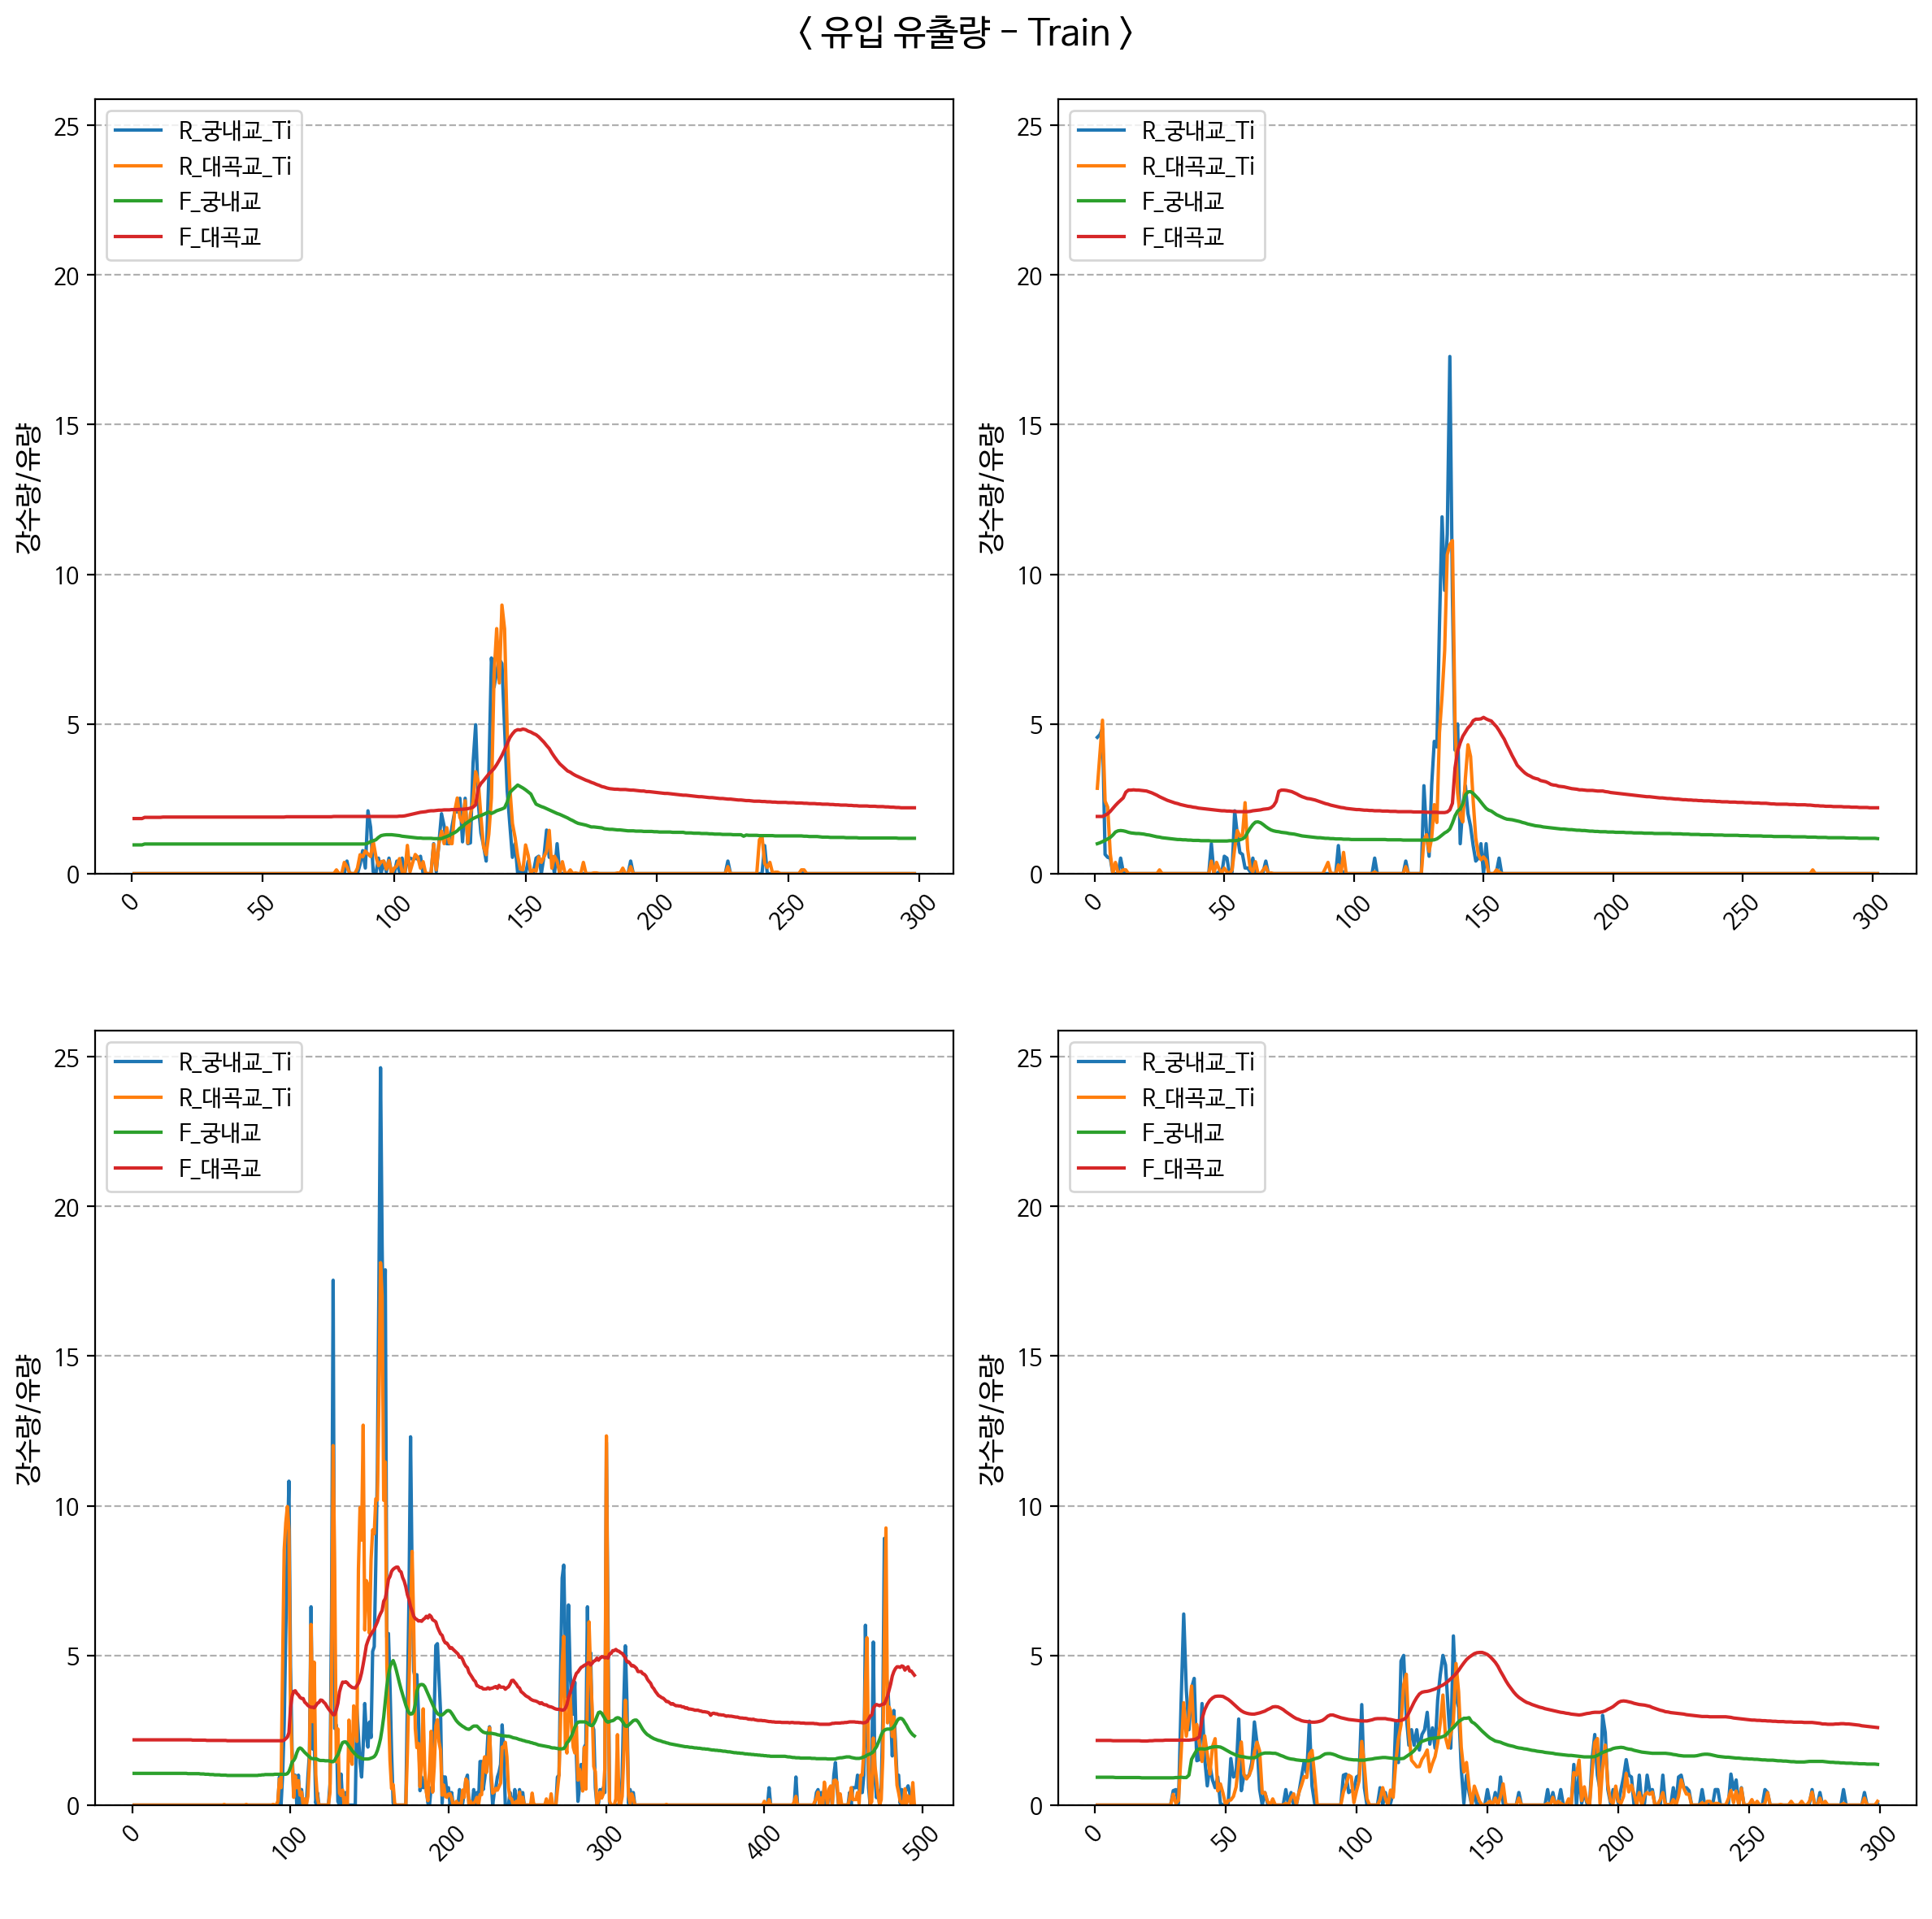

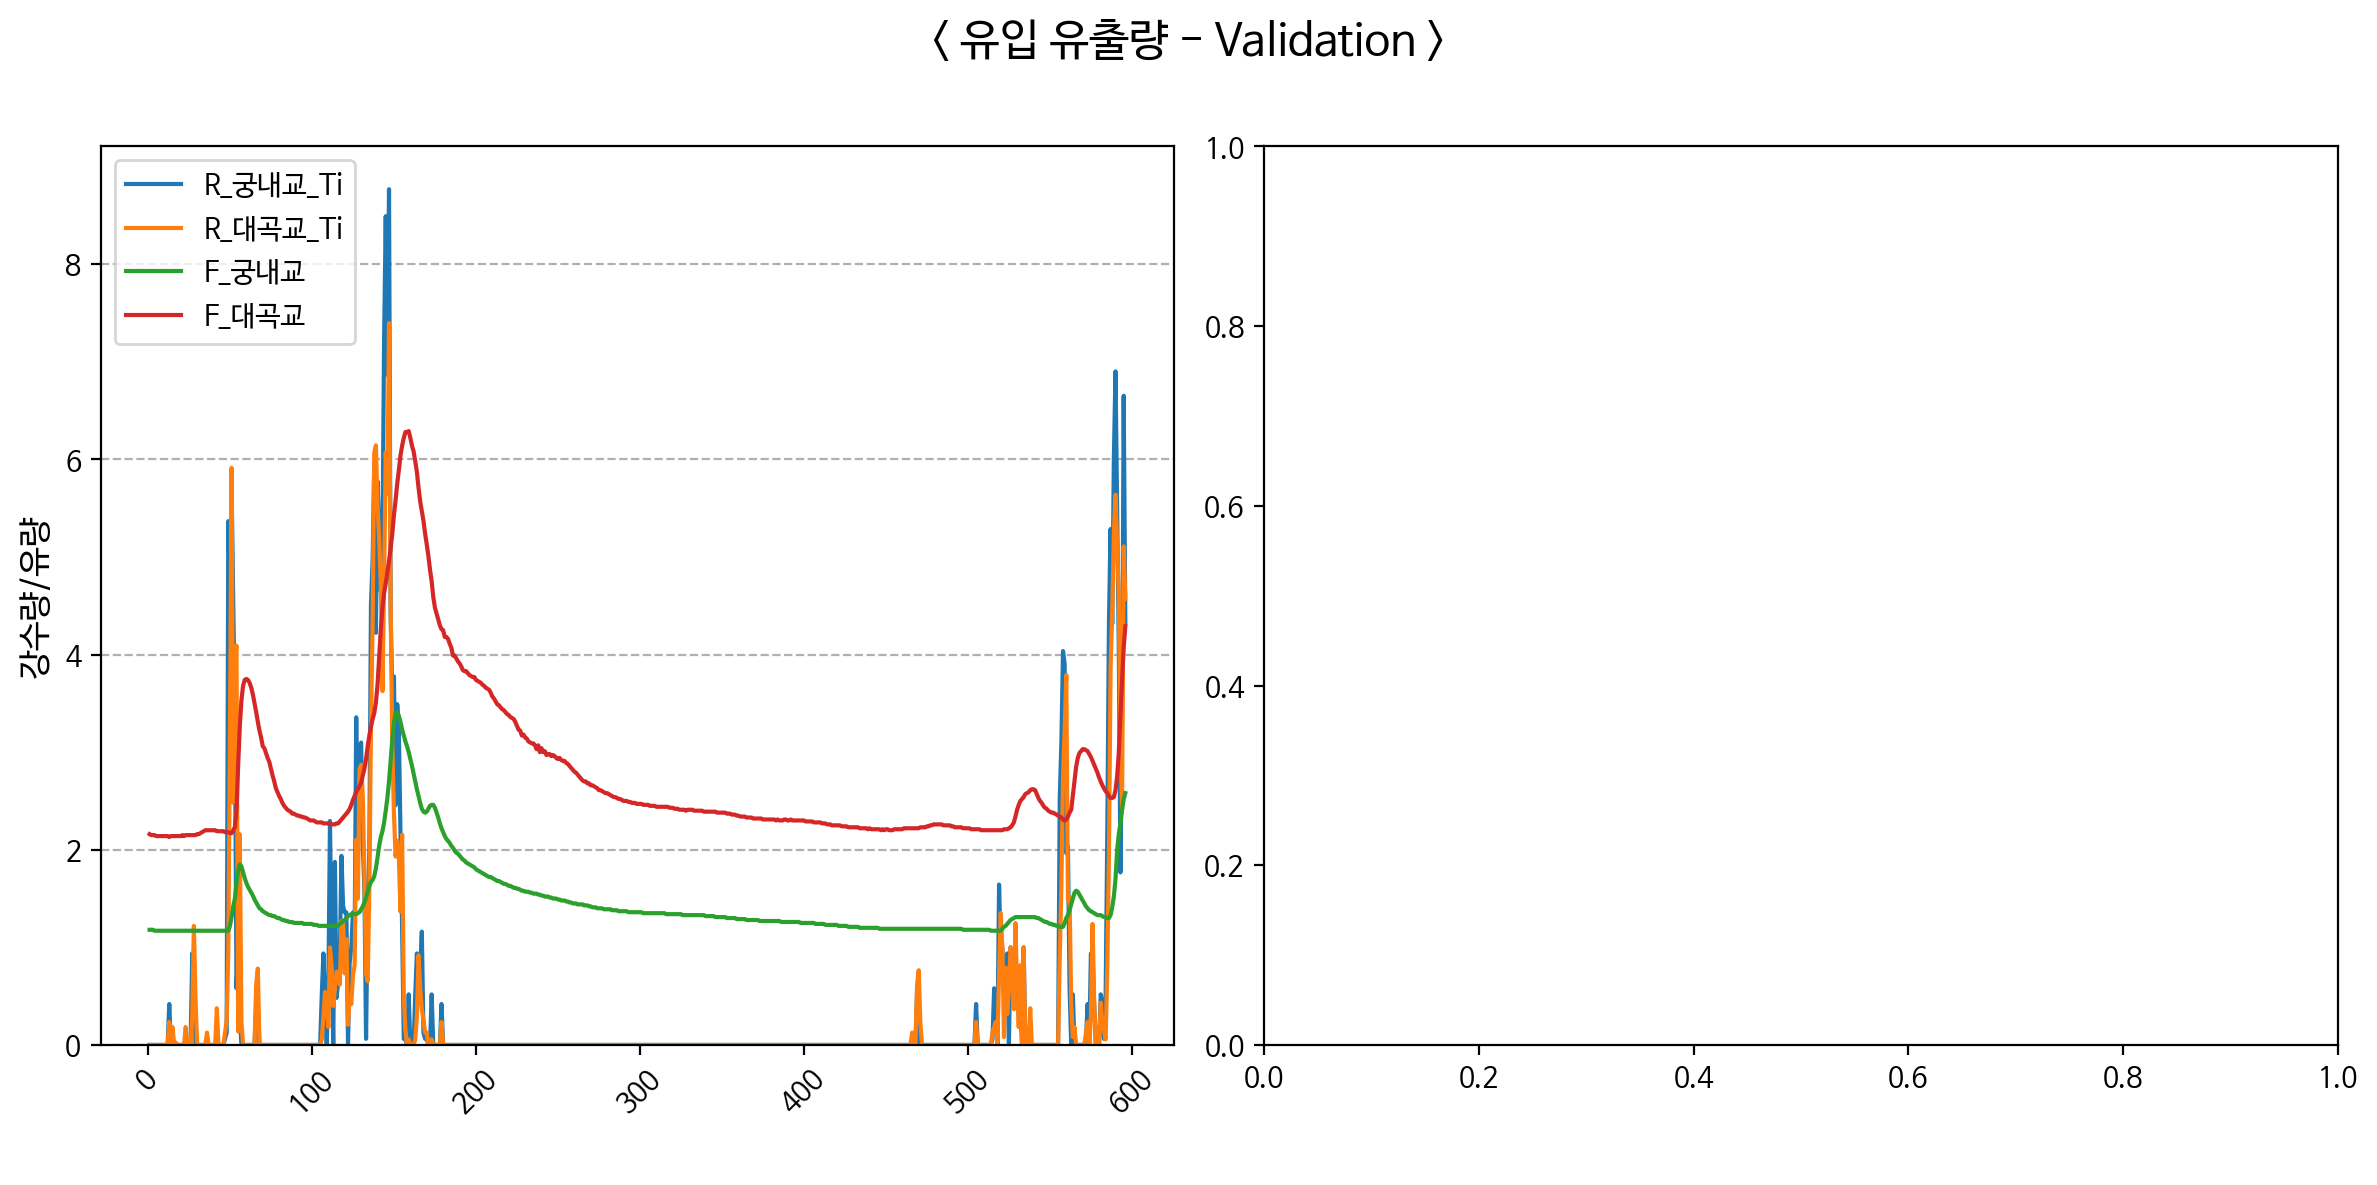

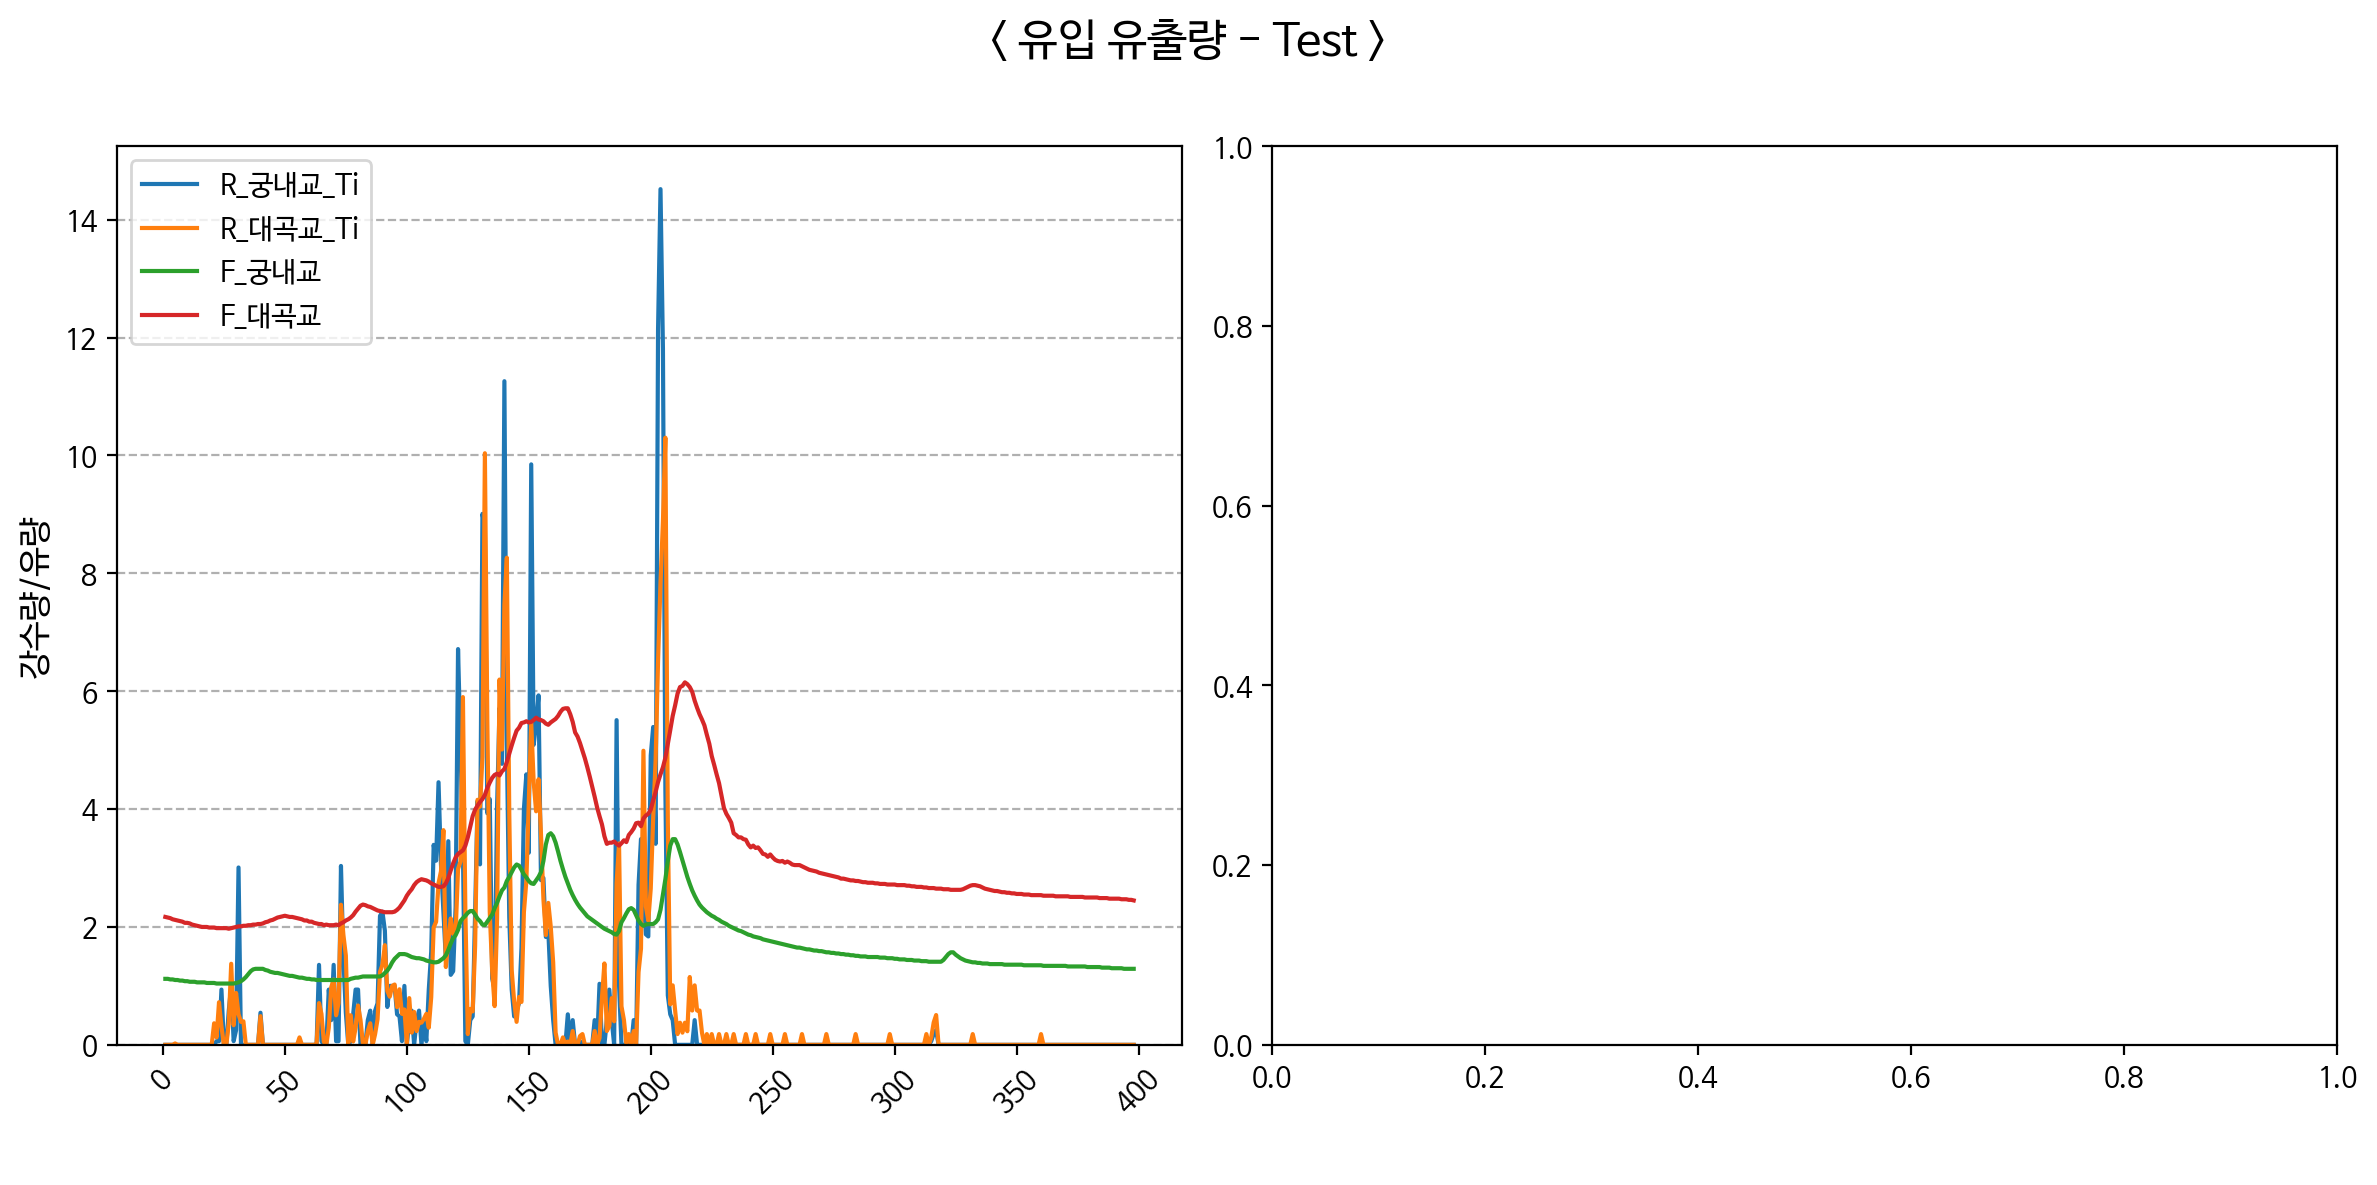

In [34]:
# Data Set 별 Chart

# view_cols =  ['R_한국학중앙연구원', 'R_대장동', 'R_구미초교', 'R_대곡교', 'R_성남북초교', 'R_남한산초교', 'R_궁내교_Ti', 'R_대곡교_Ti', 'F_궁내교', 'F_대곡교']
view_cols = ['R_궁내교_Ti', 'R_대곡교_Ti', 'F_궁내교', 'F_대곡교']

drawDataSets(dataSets, view_cols)

## Data Scaling

In [35]:
# 스케일링시 Train Set 통계량을 활용해 모든 Data Set을 스케일링.
# 1. Test set의 정보는 학습시 입력하면 인됨.
# 2. 모델이 훈련용 데이터의 통계값으로 스케일링 된 데이터로 학습됨.
# 3. 결국 모든 Data Set을 훈련용 데이터의 통계량으로 스케일링해야 함.

# x : feature ( 'datetime/Y_유입량'을 제외한 전체 컬럼 )
# y : 예측값  ( Y_유입량 )

# 예측값의 시작 컬럼 index ( 맨마지막 컬럼은 -1 도 가능 )
# 예측값이 1개 이상인 경우는 -1/-2/-3 ... 이런 방식으로 지점
# scaled 된 dataframe list
def getScalers(train_dfs, x_cols, f_cols, y_cols):
    scaler_x = MinMaxScaler()
    scaler_f = MinMaxScaler()
    scaler_y = MinMaxScaler()

    for df in train_dfs:
        scaler_x.partial_fit(df.iloc[:][x_cols].values)
        scaler_f.partial_fit(df.iloc[:][f_cols].values)
        scaler_y.partial_fit(df.iloc[:][y_cols].values)

    return [scaler_x, scaler_f, scaler_y]

def scale_data(dataSets, scaler, cols):
    scaled_dataSets = []
    for dataSet in dataSets:
        scaled_list = []
        for df in dataSet:
            # 지정된 컬럼에 대해서만 transform 적용
            scaled_numeric = pd.DataFrame(scaler.transform(df[cols]), columns=cols)
            # 지정되지 않은 컬럼은 원래 값 유지
            non_scaled_cols = df.drop(cols, axis=1)
            # 원래의 컬럼 순서 유지
            scaled_df = pd.concat([non_scaled_cols.reset_index(drop=True), scaled_numeric.reset_index(drop=True)], axis=1)
            scaled_df = scaled_df[df.columns]  # 원래의 컬럼 순서로 정렬
            scaled_list.append(scaled_df)
        scaled_dataSets.append(scaled_list)
    return scaled_dataSets

# Train Data Set를 기준으로 3개의 scaler를 생성  
scalers = getScalers(dataSets[0], x_cols, f_cols, y_cols)

# 스케일러를 사용하여 데이터 세트를 스케일링처리하여 return
# Train / Valid / Test 각각에 Data Set가 있음  
scaled_dataSets = scale_data(dataSets, scalers[0], x_cols)


In [36]:
#!pip install tabulate

from tabulate import tabulate

def printScalersInfo(scalers):
    for i, scaler in enumerate(scalers) :
        row_titles = ['Min', 'Max', 'Range', 'Scale']
        col_titles = [ f'col {i}' for i in range(scaler.n_features_in_) ]
        print('\n')
        print(f'[ Scaler {i} - {scaler.n_features_in_} Columns ]')
        print(tabulate([scaler.data_min_, scaler.data_max_,scaler.data_range_,scaler.scale_],  headers=col_titles, showindex=row_titles, tablefmt='grid'))

printScalersInfo(scalers)




[ Scaler 0 - 10 Columns ]
+-------+-----------+------------+-----------+------------+------------+---------+------------+-----------+----------+----------+
|       |     col 0 |      col 1 |     col 2 |      col 3 |      col 4 |   col 5 |      col 6 |     col 7 |    col 8 |    col 9 |
+=======+===========+============+===========+============+============+=========+============+===========+==========+==========+
| Min   |  0        |  0         |  0        |  0         |  0         |  0      |  0         |  0        | 0.91     | 1.84     |
+-------+-----------+------------+-----------+------------+------------+---------+------------+-----------+----------+----------+
| Max   | 27        | 24         | 21        | 18         | 23         | 16      | 24.6338    | 18.1222   | 4.83     | 7.95     |
+-------+-----------+------------+-----------+------------+------------+---------+------------+-----------+----------+----------+
| Range | 27        | 24         | 21        | 18         | 23

In [37]:
# Scaled_DataSets 형태 

print('[ Scaled_DataSets Shape ]')
print_list_shape(scaled_dataSets)

[ Scaled_DataSets Shape ]
List - 3
    List - 4
        Data Set - shape (298, 14)
        Data Set - shape (302, 14)
        Data Set - shape (495, 14)
        Data Set - shape (299, 14)
    List - 1
        Data Set - shape (596, 14)
    List - 1
        Data Set - shape (398, 14)


In [38]:
# Train Set 첫번째 Data

display(checkDF(scaled_dataSets[0][0]))

[ Dataframe Info -Shape:(298, 14), -index:None,int64 ]


,Feature,데이터 타입,결측값 개수,고유값 개수,첫 번째 값,두 번째 값,세 번째 값
0,DateTime,object,0,298,2014-08-20 10:50,2014-08-20 11:00,2014-08-20 11:10
1,R_한국학중앙연구원,float64,0,8,0.0,0.0,0.0
2,R_대장동,float64,0,8,0.0,0.0,0.0
3,R_구미초교,float64,0,8,0.0,0.0,0.0
4,R_대곡교,float64,0,9,0.0,0.0,0.0
5,R_성남북초교,float64,0,9,0.0,0.0,0.0
6,R_남한산초교,float64,0,8,0.0,0.0,0.0
7,R_대장동2,float64,0,8,0.0,0.0,0.0
8,R_구미초교2,float64,0,8,0.0,0.0,0.0
9,R_한국학중앙연구원2,float64,0,8,0.0,0.0,0.0


## 시계열 데이터 생성( DataX, DataF, DataY, DataI )

In [39]:
def printTSDataSetShape(dataset):
    print(f"trainX shape: {dataset[0][0].shape}")
    print(f"trainF shape: {dataset[0][1].shape}")
    print(f"trainY shape: {dataset[0][2].shape}")
    print(f"trainI shape: {dataset[0][3].shape}")
    print('')
    print(f"validX shape: {dataset[1][0].shape}")
    print(f"validF shape: {dataset[1][1].shape}")
    print(f"validI shape: {dataset[1][2].shape}")
    print(f"validY shape: {dataset[1][3].shape}")
    print('')
    print(f"testX shape: {dataset[2][0].shape}")
    print(f"testF shape: {dataset[2][1].shape}")
    print(f"testY shape: {dataset[2][2].shape}")
    print(f"testI shape: {dataset[2][3].shape}")
    print('')


def make_sequence_data(df_list, x_cols, f_cols, y_cols, seq_length, lead_time, predict_hour):
    dataX, dataF, dataY, dataI = [], [], [], []
    for df in df_list:
        for i in range(len(df) - seq_length - lead_time - predict_hour + 1):
            x = df.iloc[i:(i + seq_length)][x_cols].values
            f = df.iloc[(i + seq_length + lead_time):(i + seq_length + lead_time + predict_hour)][f_cols].values
            y = df.iloc[(i + seq_length + lead_time):(i + seq_length + lead_time + predict_hour)][y_cols].values
            i = df.iloc[(i + seq_length + lead_time)][['DateTime']].values
            dataX.append(x)
            dataF.append(f)
            dataY.append(y)
            dataI.append(i)
    return np.array(dataX), np.array(dataF), np.array(dataY), np.array(dataI)

def make_ts_dataset(df_lists, x_cols, f_cols, y_cols, seq_length, lead_time, predict_hour):
    data_set_ts = []
    for df_list in df_lists:
        x, f, y, i = make_sequence_data(df_list, x_cols, f_cols, y_cols, seq_length, lead_time, predict_hour)
        data_set_ts.append([x, f, y, i])
    return data_set_ts


# Data Set을 Time Series 형태로 변환 
seq_length = config['seq_length']  
lead_time  = config['lead_time']   
predict    = config['predict'] 

dataSets_org_ts = make_ts_dataset(dataSets, x_cols, f_cols, y_cols, seq_length, lead_time, predict) 
dataSets_ts = make_ts_dataset(scaled_dataSets, x_cols, f_cols, y_cols, seq_length, lead_time, predict)

In [40]:
# Time Series 형태의 Data Shape
print(' [ Time Series Data Shape ( before scaled ) ] ')
printTSDataSetShape(dataSets_org_ts)

print(' [ Time Series Data Shape ( after scaled )] ')
printTSDataSetShape(dataSets_ts)

 [ Time Series Data Shape ( before scaled ) ] 
trainX shape: (1110, 36, 10)
trainF shape: (1110, 36, 8)
trainY shape: (1110, 36, 1)
trainI shape: (1110, 1)

validX shape: (525, 36, 10)
validF shape: (525, 36, 8)
validI shape: (525, 36, 1)
validY shape: (525, 1)

testX shape: (327, 36, 10)
testF shape: (327, 36, 8)
testY shape: (327, 36, 1)
testI shape: (327, 1)

 [ Time Series Data Shape ( after scaled )] 
trainX shape: (1110, 36, 10)
trainF shape: (1110, 36, 8)
trainY shape: (1110, 36, 1)
trainI shape: (1110, 1)

validX shape: (525, 36, 10)
validF shape: (525, 36, 8)
validI shape: (525, 36, 1)
validY shape: (525, 1)

testX shape: (327, 36, 10)
testF shape: (327, 36, 8)
testY shape: (327, 36, 1)
testI shape: (327, 1)



# 순환 신경망 모델링

## Model 생성

In [41]:
# keras 필요 패키지 import
from keras import Model
from keras import layers

from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from keras.layers import Dense
from keras.layers import Input
from keras.layers import Concatenate
from keras.layers import Lambda
from keras.layers import LSTM
from keras.layers import Flatten
from keras.layers import ConvLSTM1D
from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras.layers import Bidirectional
from keras.layers import TimeDistributed
from keras.layers import Conv1D
from keras.layers import MaxPooling1D
from keras.layers import MaxPooling2D
from keras.layers import Reshape

from keras.models import Sequential
from keras.models import load_model

from tensorflow.keras.optimizers import Adam

### 모델 생성

In [42]:
import numpy as np
from keras.models import Model, load_model
from keras.layers import LSTM, Dense, Input, concatenate, Reshape
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import initializers

# v_num_y : 예측 feature 수 
# v_step : 예측 시간 (step)
# num_layers : layer 수
# num_p_layer : layer 당 예측수 
class MultiLSTM_Model(Model):
    def __init__(self, rf_units, fc_units, num_layers, num_p_layer, v_num_x, v_num_f, v_num_y, v_step,  v_fc_step=None, prev_steps=feedback_win_size):
        super().__init__()
        self.input1 = Input(shape=(None, v_num_x), name='input_rainflow')
        self.input2 = Input(shape=(None, v_num_f), name='input_forecast')

        self.rf_units = rf_units
        self.fc_units = fc_units
        self.step = v_step
        self.fc_horizon  = v_fc_step or v_step  # 예보 horizon (없으면 기본은 v_step)
        self.num_y = v_num_y
        self.num_layers = num_layers
        self.num_p_layer = num_p_layer
        self.prev_steps = prev_steps  # 새로 추가된 이전 스텝(layer)의 수

        # Create LSTM layers
        self.rf_lstm_layers1 = [LSTM(rf_units, return_state=True, return_sequences=True) for _ in range(num_layers)]
        self.fc_lstm_layers1 = [LSTM(fc_units, return_state=True, return_sequences=True) for _ in range(num_layers)]

        # Dense layers
        self.dense_current = [Dense(num_p_layer * 8, activation='LeakyReLU') for _ in range(num_layers)]
        self.dense_prev    = [Dense(num_p_layer * 8, activation='tanh') for _ in range(num_layers)]
        self.dense_result  = [Dense(num_p_layer, activation='LeakyReLU') for _ in range(num_layers)]

        # Reshape the final output (Ensure total size matches)
        self.reshape_result = Reshape((v_step, v_num_y))

        # smoothing type
        self.smoothing_type = smoothing_type

        # Kalman Filter Variables: Q (Process variance), R (Measurement variance)
        self.process_variance = self.add_weight(shape=(),
                                                initializer=initializers.Constant(proc_v_init),
                                                # initializer="random_normal", 
                                                trainable=True, 
                                                name='process_variance', 
                                                constraint=tf.keras.constraints.NonNeg())  # Q: Process variance
        self.measurement_variance = self.add_weight(shape=(),
                                                    initializer=initializers.Constant(meas_v_init),
                                                    # initializer="random_normal", 
                                                    trainable=True, 
                                                    name='measurement_variance', 
                                                    constraint=tf.keras.constraints.NonNeg())  # R: Measurement variance
        # exponential smoothing weight
        self.alpha = self.add_weight( shape=(), 
                                      initializer=tf.keras.initializers.Constant(1.0),
                                      constraint=tf.keras.constraints.MinMaxNorm(min_value=0.0, max_value=1.0, axis=None),
                                      trainable=True, 
                                      name='smoothing_alpha' )

        # WMA 가중치 초기화
        self.window_size = moving_avg_win_size
        self.wma_weights = self.add_weight(
          shape=(self.window_size,),  # WMA 가중치의 개수는 window_size에 맞춰 설정
          initializer=tf.keras.initializers.Constant(np.arange(1, self.window_size + 1) / np.sum(np.arange(1, self.window_size + 1))),  # 초기화
          trainable=True,
          name='wma_weights')

    def call(self, inputs):
        input1, input2 = inputs
        
        outputs = []
        outputs_fc = []
        # fc_step = self.step // self.num_layers
        fc_step = self.fc_horizon // self.num_layers   # 예보 전체 72step 기준으로 layer별 분배

        # Initial states for LSTM
        h_rf, c_rf = None, None
        h_fc, c_fc = None, None
        prev_steps_buffer = []  # 이전 스텝들을 저장할 리스트
      
        # for i in range(self.num_layers):
        #     if i == 0:
        #         x1, h_rf, c_rf = self.rf_lstm_layers1[i](input1)
        #         x2, h_fc, c_fc = self.fc_lstm_layers1[i](input2[:, :fc_step, :])
        #     else:
        #         x1, h_rf, c_rf = self.rf_lstm_layers1[i](input1, initial_state=[h_rf, c_rf])
        #         x2, h_fc, c_fc = self.fc_lstm_layers1[i](input2[:, :fc_step * (i + 1), :], initial_state=[h_fc, c_fc])

         # 실제 예보 길이 (동적)
        T_f = tf.shape(input2)[1]
    
        for i in range(self.num_layers):
            # 관측 LSTM
            if i == 0:
                x1, h_rf, c_rf = self.rf_lstm_layers1[i](input1)
            else:
                x1, h_rf, c_rf = self.rf_lstm_layers1[i](
                    input1, initial_state=[h_rf, c_rf]
                )
    
            # 이 layer가 사용할 예보 길이 (72step 내에서 점점 늘어나도록)
            this_fc_len = tf.minimum(fc_step * (i + 1), T_f)
    
            if i == 0:
                x2, h_fc, c_fc = self.fc_lstm_layers1[i](
                    input2[:, :this_fc_len, :]
                )
            else:
                x2, h_fc, c_fc = self.fc_lstm_layers1[i](
                    input2[:, :this_fc_len, :],
                    initial_state=[h_fc, c_fc]
                )

            x = concatenate([x1[:,-1], x2[:,-1]], axis=1)
            # Dense layer
            x = self.dense_current[i](x)

            # 이전 스텝의 정보들을 가져오기
            if len(prev_steps_buffer) > 0:
                # 필요한 만큼의 이전 스텝을 concatenate
                prev_steps_to_use = concatenate(prev_steps_buffer, axis=1)
                prev_steps_to_use = self.dense_prev[i](prev_steps_to_use)
                prev_steps_buffer.append(x)
                x = concatenate([x, prev_steps_to_use], axis=1)
            else:
                prev_steps_buffer.append(x)

            x = self.dense_result[i](x)
            outputs.append(x)

            # prev_step 리스트에 현재 스텝 추가
            # 버퍼가 self.prev_steps 이상이면 오래된 값을 제거
            if len(prev_steps_buffer) > self.prev_steps:
                prev_steps_buffer.pop(0)
            
        # Concatenate all outputs
        result = concatenate(outputs, axis=1)
        
        # Modify reshape to ensure correct dimensions
        result = self.reshape_result(result)

        # 1. Moving Smoothing Start 
        # 이동평균으로 step간 Data 평활화 
        # 맨 앞의 이동평균이 없는 경우는 원래 Data 그대로 사용하도록 처리. 
        if self.smoothing_type == 1:
            normalized_weights = self.wma_weights / tf.reduce_sum(self.wma_weights)
            wma_results = []
            for t in range(self.window_size - 1, result.shape[1]):
                window = result[:, t - self.window_size + 1:t + 1, :]  # Current window
                wma = tf.reduce_sum(window * normalized_weights[:, tf.newaxis], axis=1)  # WMA 계산
                wma_results.append(wma)
    
            # WMA 결과를 tensor로 변환
            wma_results = tf.stack(wma_results, axis=1)
          
            # 원래 데이터와 WMA 결합 (앞의 window_size - 1 만큼은 원본 데이터 사용)
            result = tf.concat([result[:, :self.window_size - 1, :], wma_results], axis=1)

        # 2. Exponential Smoothing 
        elif smoothing_type == 2 :
            smoothed = []
            last = result[:, 0, :]
            smoothed.append(last)
      
            for t in range(1, result.shape[1]):
                last = self.alpha * result[:, t, :] + (1 - self.alpha) * last 
                smoothed.append(last)
      
            result = tf.stack(smoothed, axis=1)

        # 3. Kalman filtering ( fixed )
        elif smoothing_type == 3 :
            # Q: Process variance : 시스템 자체의 잡음 또는 모델이 설명하지 못하는 불확실성 표현 
            # range : 0 ~ 1 이상 
            # 안정된 시스템 or 데이터가 매우 매끄러운 경우 : 작은 값 (예: 1e-5에서 1e-2) 사용
            # 예측불헌 시스템 or 데이터가 급격한 변화가 잦은 경우 : 상대적으로 큰 값 (예: 1e-1에서 1) 사용
            # R: Measurement variance : 모델이 예측값을 얼마나 신뢰할지 조정하는 역할
            # Range : 1e-5 ~ 1e-1 
            # 관측값(이전 예측) 이 매우 정확 : 작은 값 (예: 1e-4 이하) 사용
            # 관측값(이전 예측) 에 잡음이 많이 포함된 경우 : 상대적으로 큰 값 (예: 1e-2에서 1e-1) 사용
            process_variance = 1e-4
            measurement_variance = 1e-3 
            estimated_variance = tf.ones_like(result[:, 0, :])
            kalman_gain = tf.zeros_like(result[:, 0, :])
            state_estimate = result[:, 0, :] 
    
            smoothed = [state_estimate]
    
            for t in range(1, result.shape[1]):
                # Predict step
                predicted_state = state_estimate 
                predicted_variance = estimated_variance + process_variance  
    
                # Update step
                kalman_gain = predicted_variance / (predicted_variance + measurement_variance) 
                state_estimate = predicted_state + kalman_gain * (result[:, t, :] - predicted_state)
                estimated_variance = (1 - kalman_gain) * predicted_variance 
    
                smoothed.append(state_estimate)
    
            result = tf.stack(smoothed, axis=1)
        # 4. Kalman filtering ( trainable )
        elif smoothing_type == 4 :
            estimated_variance = tf.ones_like(result[:, 0, :])  # P: Estimated error in prediction
            kalman_gain = tf.zeros_like(result[:, 0, :])  # K: Kalman gain
            state_estimate = result[:, 0, :]  # Initial state estimate
    
            smoothed = [state_estimate]
          
            # Iterate through the sequence and apply the Kalman Filter
            for t in range(1, result.shape[1]):
                # Predict step
                predicted_state = state_estimate  # A * state_estimate (A=1 in simple case)
                predicted_variance = estimated_variance + self.process_variance  # P = P + Q
    
                # Update step
                kalman_gain = predicted_variance / (predicted_variance + self.measurement_variance)  # K = P / (P + R)
                state_estimate = predicted_state + kalman_gain * (result[:, t, :] - predicted_state)  # x = x' + K * (z - x')
                estimated_variance = (1 - kalman_gain) * predicted_variance  # P = (1 - K) * P
    
                smoothed.append(state_estimate)
    
            # Stack the results back into a single tensor
            result = tf.stack(smoothed, axis=1)
          
        return result


def build_MultiLSTM(rf_units, fc_units, num_layers, num_p_layer, v_num_x, v_num_f, v_num_y, v_step, v_fc_step) :
    model = MultiLSTM_Model(rf_units, fc_units, num_layers, num_p_layer, v_num_x, v_num_f, v_num_y, v_step=v_step, v_fc_step=v_fc_step)
    
    input1 = Input(shape=(None, v_num_x), name='input_1')
    input2 = Input(shape=(None, v_num_f), name='input_2')
    output = model([input1, input2])
    model = Model(inputs=[input1, input2], outputs=output)
    return model


In [43]:
%%script echo Self Attention Model Skip....

import numpy as np
import tensorflow as tf
from keras.models import Model, load_model
from keras.layers import LSTM, Dense, Input, concatenate, Reshape
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Attention, LeakyReLU, ReLU
from tensorflow.keras import initializers
import tensorflow.keras.backend as K

class MultiLSTM_Attention_Model(Model):
    def __init__(self, rf_units, fc_units, num_layers, num_p_layer, v_num_x, v_num_f, v_num_y, v_step, prev_steps=feedback_win_size):
        super().__init__()
        self.input1 = Input(shape=(None, v_num_x), name='input_rainflow')
        self.input2 = Input(shape=(None, v_num_f), name='input_forecast')

        self.rf_units = rf_units
        self.fc_units = fc_units
        self.step = v_step
        self.num_layers = num_layers
        self.num_p_layer = num_p_layer
        self.v_num_y = v_num_y

        # LSTM layers
        self.rf_lstm_layers1 = [LSTM(rf_units, return_state=True, return_sequences=True) for _ in range(num_layers)]
        self.fc_lstm_layers1 = [LSTM(fc_units, return_state=True, return_sequences=True) for _ in range(num_layers)]
        
        # Attention layers
        self.rf_attn_layers = [Attention() for _ in range(num_layers)]
        self.fc_attn_layers = [Attention() for _ in range(num_layers)]
        
        # Dense layers ( in self attention ) 
        self.rf_dense      = [Dense(num_p_layer * 16, activation='tanh') for _ in range(num_layers)]
        self.fc_dense      = [Dense(num_p_layer * 16, activation='tanh') for _ in range(num_layers)]
        self.concat_dense  = [Dense(num_p_layer * 8, activation='LeakyReLU') for _ in range(num_layers)]

        # For Previous Step Sub-Result Connections
        self.dense_prev    = [Dense(num_p_layer * 8, activation='tanh') for _ in range(num_layers)]

        # final result Dense
        self.result_dense  = [Dense(num_p_layer, activation=activation_func) for _ in range(num_layers)]

        # Reshape layer
        self.reshape_result = Reshape((v_step, v_num_y))

        # smoothing type
        self.smoothing_type = smoothing_type

        # Kalman Filter Variables: Q (Process variance), R (Measurement variance)
        self.process_variance = self.add_weight(shape=(),
                                                initializer=initializers.Constant(proc_v_init),
                                                # initializer="random_normal", 
                                                trainable=True, 
                                                name='process_variance', 
                                                constraint=tf.keras.constraints.NonNeg())  # Q: Process variance
        self.measurement_variance = self.add_weight(shape=(),
                                                    initializer=initializers.Constant(meas_v_init),
                                                    # initializer="random_normal", 
                                                    trainable=True, 
                                                    name='measurement_variance', 
                                                    constraint=tf.keras.constraints.NonNeg())  # R: Measurement variance
        # exponential smoothing weight
        self.alpha = self.add_weight( shape=(), 
                                      initializer=tf.keras.initializers.Constant(1.0),
                                      constraint=tf.keras.constraints.MinMaxNorm(min_value=0.0, max_value=1.0, axis=None),
                                      trainable=True, 
                                      name='smoothing_alpha' )

        # WMA 가중치 초기화
        self.window_size = moving_avg_win_size
        self.wma_weights = self.add_weight(
          shape=(self.window_size,),  # WMA 가중치의 개수는 window_size에 맞춰 설정
          initializer=tf.keras.initializers.Constant(np.arange(1, self.window_size + 1) / np.sum(np.arange(1, self.window_size + 1))),  # 초기화
          trainable=True,
          name='wma_weights')

    def call(self, inputs):
        input1, input2 = inputs
        outputs = []

        # Initial states for LSTM
        h_rf, c_rf = None, None
        h_fc, c_fc = None, None
        prev_steps_buffer = []  # 이전 스텝들을 저장할 리스트
      
        fc_step = self.step // self.num_layers
        for i in range(self.num_layers):
            if i == 0:
                x1, h_rf, c_rf = self.rf_lstm_layers1[i](input1)
                x2, h_fc, c_fc = self.fc_lstm_layers1[i](input2[:, :fc_step, :])
            else:
                x1, h_rf, c_rf = self.rf_lstm_layers1[i](input1, initial_state=[h_rf, c_rf])
                x2, h_fc, c_fc = self.fc_lstm_layers1[i](input2[:, :fc_step * (i + 1), :], initial_state=[h_fc, c_fc])

            # Apply Attention between LSTM outputs (rainflow and forecast)
            rf_attn_out = self.rf_attn_layers[i]([x1, x1])
            rf_attn_out = Lambda(lambda x: K.mean(x, axis=1))(rf_attn_out)            

            fc_attn_out = self.fc_attn_layers[i]([x2, x2])
            fc_attn_out = Lambda(lambda x: K.mean(x, axis=1))(fc_attn_out)

            # Concatenate LSTM and Attention outputs
            x1 = concatenate([x1[:,-1], rf_attn_out], axis=1)
            x2 = concatenate([x2[:,-1], fc_attn_out], axis=1)
            
            x1 = self.rf_dense[i](x1)
            x2 = self.fc_dense[i](x2)

            # Apply Dense layers
            x = concatenate([x1, x2], axis=1)
            x = self.concat_dense[i](x)

            # 이전 스텝의 정보들을 가져오기
            if len(prev_steps_buffer) > 0:
                # 필요한 만큼의 이전 스텝을 concatenate
                prev_steps_to_use = concatenate(prev_steps_buffer, axis=1)
                prev_steps_to_use = self.dense_prev[i](prev_steps_to_use)
                prev_steps_buffer.append(x)
                x = concatenate([x, prev_steps_to_use], axis=1)
            else:
                prev_steps_buffer.append(x)

            x = self.result_dense[i](x)
            outputs.append(x)

        # Concatenate the outputs of all layers
        result = concatenate(outputs, axis=1)
        result = self.reshape_result(result)

        if self.smoothing_type == 1:
            # 1. start Moving Smoothing Start 
            # 가중이동평균으로 step간 Data 평활화 ( Traininig )
            normalized_weights = self.wma_weights / tf.reduce_sum(self.wma_weights)
            wma_results = []
            for t in range(self.window_size - 1, result.shape[1]):
                window = result[:, t - self.window_size + 1:t + 1, :]  # Current window
                wma = tf.reduce_sum(window * normalized_weights[:, tf.newaxis], axis=1)  # WMA 계산
                wma_results.append(wma)
    
            # WMA 결과를 tensor로 변환
            wma_results = tf.stack(wma_results, axis=1)
          
            # 원래 데이터와 WMA 결합 (앞의 window_size - 1 만큼은 원본 데이터 사용)
            result = tf.concat([result[:, :self.window_size - 1, :], wma_results], axis=1)
        elif smoothing_type == 2 :
        # Exponetial Smoothing으로 step간 Data 평활화 ( Traininig )
            # 2. start Exponential Smoothing 
            smoothed = []
            last = result[:, 0, :]
            smoothed.append(last)
      
            for t in range(1, result.shape[1]):
                last = self.alpha * result[:, t, :] + (1 - self.alpha) * last 
                smoothed.append(last)
      
            result = tf.stack(smoothed, axis=1)
        elif smoothing_type == 3 :
            # 3. Start Kalman filtering
            # Q: Process variance : 시스템 자체의 잡음 또는 모델이 설명하지 못하는 불확실성 표현 
            # range : 0 ~ 1 이상 
            # 안정된 시스템 or 데이터가 매우 매끄러운 경우 : 작은 값 (예: 1e-5에서 1e-2) 사용
            # 예측불헌 시스템 or 데이터가 급격한 변화가 잦은 경우 : 상대적으로 큰 값 (예: 1e-1에서 1) 사용
            process_variance = proc_v_init
            # R: Measurement variance : 모델이 예측값을 얼마나 신뢰할지 조정하는 역할
            # Range : 1e-5 ~ 1e-1 
            # 관측값(이전 예측) 이 매우 정확 : 작은 값 (예: 1e-4 이하) 사용
            # 관측값(이전 예측) 에 잡음이 많이 포함된 경우 : 상대적으로 큰 값 (예: 1e-2에서 1e-1) 사용
            measurement_variance = meas_v_init
            estimated_variance = tf.ones_like(result[:, 0, :])
            kalman_gain = tf.zeros_like(result[:, 0, :])
            state_estimate = result[:, 0, :] 
    
            smoothed = [state_estimate]
    
            for t in range(1, result.shape[1]):
                # Predict step
                predicted_state = state_estimate 
                predicted_variance = estimated_variance + process_variance  
    
                # Update step
                kalman_gain = predicted_variance / (predicted_variance + measurement_variance) 
                state_estimate = predicted_state + kalman_gain * (result[:, t, :] - predicted_state)
                estimated_variance = (1 - kalman_gain) * predicted_variance 
    
                smoothed.append(state_estimate)
    
            # Stack the results back into a single tensor
            result = tf.stack(smoothed, axis=1)
        elif smoothing_type == 4 :
            # Kalman Filter Application
            estimated_variance = tf.ones_like(result[:, 0, :])  # P: Estimated error in prediction
            kalman_gain = tf.zeros_like(result[:, 0, :])  # K: Kalman gain
            state_estimate = result[:, 0, :]  # Initial state estimate
    
            smoothed = [state_estimate]
          
            # Iterate through the sequence and apply the Kalman Filter
            for t in range(1, result.shape[1]):
                # Predict step
                predicted_state = state_estimate  # A * state_estimate (A=1 in simple case)
                predicted_variance = estimated_variance + self.process_variance  # P = P + Q
    
                # Update step
                kalman_gain = predicted_variance / (predicted_variance + self.measurement_variance)  # K = P / (P + R)
                state_estimate = predicted_state + kalman_gain * (result[:, t, :] - predicted_state)  # x = x' + K * (z - x')
                estimated_variance = (1 - kalman_gain) * predicted_variance  # P = (1 - K) * P
    
                smoothed.append(state_estimate)
    
            # Stack the results back into a single tensor
            result = tf.stack(smoothed, axis=1)
          
        return result


def build_MultiLSTM_Attention(rf_units, fc_units, num_layers, num_p_layer, v_num_x, v_num_f, v_num_y, v_step) :
    model = MultiLSTM_Attention_Model(rf_units, fc_units, num_layers, num_p_layer, v_num_x, v_num_f, v_num_y, v_step)
    
    input1 = Input(shape=(None, v_num_x), name='input_1')
    input2 = Input(shape=(None, v_num_f), name='input_2')
    output = model([input1, input2])
    model = Model(inputs=[input1, input2], outputs=output)
    return model


Self Attention Model Skip....


In [44]:

def build_LSTM(rf_units, fc_units, v_num_x, v_num_f, v_num_y, v_step, v_layer, v_dropout=0.0) :

    rf_cells  = rf_units
    fc_cells  = fc_units
    out_feature  = v_step*v_num_y

    in_rainflow = Input(shape=(None, v_num_x), name='input_rainflow')
    in_forecast = Input(shape=(None, v_num_f), name='input_forecast')

    
    stepN = v_step//v_layer
    stepL = v_step - stepN*(v_layer-1)
    
    # 첫 행부터 stepN행까지 (shape: (n, stepN, n))
    part_fc_list = []
    for i in range(1,v_layer+1):
        if i < v_layer:
            part_fc = Lambda(lambda x: x[:, :stepN*i, :])(in_forecast)
        else:
            part_fc = Lambda(lambda x: x[:, :       , :])(in_forecast)

        part_fc_list.append(part_fc)

    part_result_list = []
    for i in range(v_layer):
        rainflow = LSTM(rf_cells, dropout=v_dropout)(in_rainflow)
        forecast = LSTM(fc_cells, dropout=v_dropout)(part_fc_list[i])
        d = Concatenate()([rainflow, forecast])

        # d = Dense(rf_cells//4, activation='relu')(d)
        # d = Dense(rf_cells, activation='linear')(d)
        # if i < v_layer-1:
        #     part_result = Dense(v_num_y*stepN, activation='relu')(d)
        # else:
        #     part_result = Dense(v_num_y*stepL, activation='relu')(d)

        d = Dense(v_num_y*stepN*16, activation='LeakyReLU')(d)
        # d = Dense(v_num_y*stepN*4, activation='relu')(d)
        d = Dense(v_num_y*stepN, activation='LeakyReLU')(d)
        part_result_list.append(d)
    
    result = Concatenate()([p_result for p_result in part_result_list])
    result = Dense(v_step*v_num_y*16, activation='LeakyReLU')(result)
    # result = Dense(v_step*v_num_y*4, activation='relu')(result)
    result = Dense(v_step*v_num_y, activation='LeakyReLU')(result)
    result = Reshape((v_step, v_num_y))(result)  
    
    model = Model(inputs=[in_rainflow, in_forecast], outputs=[result])

    return model


In [45]:
def build_LSTM4(rf_units, fc_units, v_num_x, v_num_f, v_num_y, v_step, v_dropout=0.0) :

    rf_cells  = rf_units
    fc_cells  = fc_units
    out_feature  = v_step*v_num_y

    in_rainflow = Input(shape=(None, v_num_x), name='input_rainflow')
    in_forecast = Input(shape=(None, v_num_f), name='input_forecast')

    stepN = v_step//5
    
    stepL = v_step - stepN*4
    
    # 첫 행부터 stepN행까지 (shape: (n, stepN, n))
    in_forecast1 = Lambda(lambda x: x[:, :stepN  , :])(in_forecast)
    in_forecast2 = Lambda(lambda x: x[:, :stepN*2, :])(in_forecast)
    in_forecast3 = Lambda(lambda x: x[:, :stepN*3, :])(in_forecast)
    in_forecast4 = Lambda(lambda x: x[:, :stepN*4, :])(in_forecast)
    in_forecast5 = Lambda(lambda x: x[:, :       , :])(in_forecast)

    rainflow1 = LSTM(rf_cells, dropout=v_dropout)(in_rainflow)
    forecast1 = LSTM(fc_cells, dropout=v_dropout)(in_forecast1)
    d1 = Concatenate()([rainflow1, forecast1])
    d1 = Dense(out_feature*8, activation='relu')(d1)
    d1 = Dense(out_feature*2, activation='relu')(d1)
    result1 = Dense(v_num_y*stepN)(d1)
    
    rainflow2 = LSTM(rf_cells, dropout=v_dropout)(in_rainflow)
    forecast2 = LSTM(fc_cells, dropout=v_dropout)(in_forecast2)
    d2 = Concatenate()([rainflow2, forecast2])
    d2 = Dense(out_feature*8, activation='relu')(d2)
    d2 = Dense(out_feature*2, activation='relu')(d2)
    result2 = Dense(v_num_y*stepN)(d2)

    rainflow3 = LSTM(rf_cells, dropout=v_dropout)(in_rainflow)
    forecast3 = LSTM(fc_cells, dropout=v_dropout)(in_forecast3)
    d3 = Concatenate()([rainflow3, forecast3])
    d3 = Dense(out_feature*8, activation='relu')(d3)
    d3 = Dense(out_feature*2, activation='relu')(d3)
    result3 = Dense(v_num_y*stepN)(d3)

    rainflow4 = LSTM(rf_cells, dropout=v_dropout)(in_rainflow)
    forecast4 = LSTM(fc_cells, dropout=v_dropout)(in_forecast4)
    d4 = Concatenate()([rainflow4, forecast4])
    d4 = Dense(out_feature*8, activation='relu')(d4)
    d4 = Dense(out_feature*2, activation='relu')(d4)
    result4 = Dense(v_num_y*stepN)(d4)

    rainflow5 = LSTM(rf_cells, dropout=v_dropout)(in_rainflow)
    forecast5 = LSTM(fc_cells, dropout=v_dropout)(in_forecast5)
    d5 = Concatenate()([rainflow5, forecast5])
    d5 = Dense(out_feature*8, activation='relu')(d5)
    d5 = Dense(out_feature*2, activation='relu')(d5)
    result5 = Dense(v_num_y*stepL)(d5)

    result = Concatenate()([result1, result2, result3, result4, result5])
    result = Reshape((v_step, v_num_y))(result)  
    
    model = Model(inputs=[in_rainflow, in_forecast], outputs=[result])

    return model


In [46]:
def build_LSTM3(rf_units, fc_units, v_num_x, v_num_f, v_num_y, v_step, v_dropout=0.0) :

    rf_cells  = rf_units
    fc_cells  = fc_units
    out_feature  = v_step*v_num_y

    in_rainflow = Input(shape=(None, v_num_x), name='input_rainflow')
    in_forecast = Input(shape=(None, v_num_f), name='input_forecast')

    rainflow1 = LSTM(rf_cells, dropout=v_dropout)(in_rainflow)
    forecast1 = LSTM(fc_cells, dropout=v_dropout)(in_forecast)
    d1 = Concatenate()([rainflow1, forecast1])
    d1 = Dense(out_feature*8, activation='relu')(d1)
    d1 = Dense(out_feature*2, activation='relu')(d1)
    result1 = Dense(out_feature)(d1)

    rainflow2 = LSTM(rf_cells, dropout=v_dropout)(in_rainflow)
    forecast2 = LSTM(fc_cells, dropout=v_dropout)(in_forecast)
    d2 = Concatenate()([rainflow2, forecast2])
    d2 = Dense(out_feature*8, activation='relu')(d2)
    d2 = Dense(out_feature*2, activation='relu')(d2)
    result2 = Dense(out_feature)(d2)

    result = Concatenate()([result1, result2])
    result = Dense(out_feature)(result)
    result = Reshape((v_step, v_num_y))(result)  
    
    model = Model(inputs=[in_rainflow, in_forecast], outputs=[result])

    return model


In [47]:

def build_LSTM2(rf_units, fc_units, v_num_x, v_num_f, v_num_y, v_step, v_dropout=0.0) :

    rf_cells  = rf_units
    fc_cells  = fc_units
    out_feature  = v_step*v_num_y

    rainflow = Input(shape=(None, v_num_x), name='input_rainflow')
    forecast = Input(shape=(None, v_num_f), name='input_forecast')
    # forecast = Input(shape=(v_step, v_num_f), name='input_forecast')

    # activation default : tanh 
    # None -> linear 
    rainflow1 = LSTM(rf_cells, dropout=v_dropout)(rainflow)
    forecast1 = LSTM(fc_cells, dropout=v_dropout)(forecast)

    # forecast1 = Flatten()(forecast)
    # forecast1 = Dense(fc_cells, activation='relu')(forecast1)

    d1 = Concatenate()([rainflow1, forecast1])
    # d1 = Dense(rf_cells//4, activation='relu')(d1)
    # d1 = Dense(rf_cells//16, activation='relu')(d1)

    d1 = Dense(out_feature*8, activation='relu')(d1)
    d1 = Dense(out_feature*2, activation='relu')(d1)

    result = Dense(out_feature)(d1)
    result = Reshape((v_step, v_num_y))(result)  

    model = Model(inputs=[rainflow, forecast], outputs=[result])

    return model

def build_LSTM4Multi(num_of_units, v_num_x, v_num_f, v_num_y, v_step, v_dropout=0.0) :

    rf_cells  = num_of_units
    fc_cells  = num_of_units//4

    rainflow = Input(shape=(None, v_num_x), name='input_rainflow')
    forecast = Input(shape=(None, v_num_f), name='input_forecast')

    # activation default : tanh 
    # None -> linear 
    rainflow1 = LSTM(rf_cells, input_shape=(None, v_num_x), dropout=v_dropout, activation='relu')(rainflow)
    forecast1 = LSTM(fc_cells, input_shape=(None, v_num_f), dropout=v_dropout, activation='relu')(forecast)
    # forecast1 = Dense(fc_cells, activation='relu')(forecast)
    d1 = Concatenate()([rainflow1, forecast1])
    result1 = Dense(1)(d1)

    rainflow2 = LSTM(rf_cells, input_shape=(None, v_num_x), dropout=v_dropout, activation='relu')(rainflow)
    forecast2 = LSTM(fc_cells, input_shape=(None, v_num_f), dropout=v_dropout, activation='relu')(forecast)
    # forecast2 = Dense(fc_cells, activation='relu')(forecast)
    d2 = Concatenate()([rainflow2, forecast2])
    result2 = Dense(1)(d2)

    rainflow3 = LSTM(rf_cells, input_shape=(None, v_num_x), dropout=v_dropout, activation='relu')(rainflow)
    forecast3 = LSTM(fc_cells, input_shape=(None, v_num_f), dropout=v_dropout, activation='relu')(forecast)
    # forecast3 = Dense(fc_cells, activation='relu')(forecast)
    d3 = Concatenate()([rainflow3, forecast3])
    result3 = Dense(v_num_y)(d3)
    
    result = Concatenate(axis=1)([result1, result2, result3]) 
    model = Model(inputs=[rainflow, forecast], outputs=[result])

    return model

In [48]:
# 모델을 반복 호출하는 모델
class MultiStepModel(keras.Model):
    def __init__(self, single_model, hours=3):
        super().__init__()
        self.single_model = single_model
        self.hours = hours
        
    def call(self, inputs) :
        # base_feature = inputs['Base_Feature']
        # fc_feature = inputs['Forecast_Feature']
        base_feature, fc_feature = inputs

        predictions = []
        single_data = base_feature

        # single모델을 재귀적으로 호출
        for i in range(self.hours):
            # 예보 데이터중 1시간 부분만 추출
            now_fc = fc_feature[:,i,:]
            now_fc = tf.reshape(now_fc, (-1, fc_feature.shape[-1]))
            # 1시간 예측
            output = self.single_model([single_data, now_fc])
            
            # 예측 결과를 리스트에 저장
            predictions.append(output[:,-1])
            
            # 예측 결과를 예보 데이터와 결합후 입력 데이터로 통합 
            next_feature = tf.concat([now_fc, output], axis=1) 
            next_feature = tf.reshape(next_feature, (-1,1,next_feature.shape[1]))
            single_data = tf.concat([single_data[:,1:,:], next_feature], axis=1)
        
        # 리스트로부터 예측 결과 반환
        result = tf.stack(predictions, axis=1)
        # result = result[:,:,-1]
        
        # result = result.numpy() 
        # result = result.reshape(-1,result.shape[1],1)
        # result = tf.reshape(result, (-1,result.shape[1],1))

        return result

  

In [49]:
# Multi Step Model 

def build_MultiStepModel(base_model_path, pred_hours) :
    
    print('[ Multi-Step Model ]')
    print('- Base Model Path : ', base_model_path)
    base_model = keras.models.load_model(base_model_path)

    # 모델 인스턴스 생성
    mstep_model = MultiStepModel(base_model, hours=pred_hours)
    mstep_model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.01))
    mstep_model.build(input_shape=[(None, config['seq_length'], config['num_of_feature']), (None, pred_hours, config['forecast'])])

    return mstep_model


In [50]:
# use_model에 따라 모델 생성
# Convolution Layer 사용시 사용할 subsequence (영상에서 frame에 해당) 기본 길이 ( 모델에 따라 다름 )
def build_model(model_type, rf_cells, fc_cells, num_of_predict, v_layer) :
    if model_type == 'LSTM' :
        v_model = build_LSTM(rf_cells, fc_cells, num_x, num_f, num_y, num_of_predict, v_layer, v_dropout=0.0)

    if model_type == 'MultiLSTM' :
        v_step    = predict          # 36
        v_fc_step = 72               # 예보는 72step까지 사용
        
        v_num_x   = len(x_cols)
        v_num_f   = len(f_cols)
        v_num_y   = len(y_cols)      # 1
        
        num_layers   = num_of_layer  # 12
        num_p_layer  = (v_step * v_num_y) // num_layers  # 3
        
        rf_units, fc_units = num_of_cells   # [64, 64]
        
        v_model = build_MultiLSTM(
            rf_units=rf_units,
            fc_units=fc_units,
            num_layers=num_layers,
            num_p_layer=num_p_layer,
            v_num_x=v_num_x,
            v_num_f=v_num_f,
            v_num_y=v_num_y,
            v_step=v_step,
            v_fc_step=v_fc_step
        )

    return v_model

# Model 생성
if config['use_model'] == 'MultiStepModel':
    model = build_MultiStepModel(config['base_model_path'], config['predict'])
else :
    model = build_model(config['use_model'], config['num_of_cells'][0], config['num_of_cells'][1], config['predict'], config['num_of_layer'])

# Model 및 Hyper Parameter, 각종 configration 설정 내용 확인 
print(f"\n[ {config['use_model']} Model / Hper Parameter / Configuration ]\n")
model.summary()
print('')
print_config(config)


[ MultiLSTM Model / Hper Parameter / Configuration ]

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, None, 10)]           0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, None, 8)]            0         []                            
                                                                                                  
 multi_lstm__model (MultiLS  (None, 36, 1)                500107    ['input_1[0][0]',             
 TM_Model)                                                           'input_2[0][0]']             
                                                                                                  
Total params: 500107 (1.91 MB)
Trainabl

## Model 학습 설정

### Callback 함수 정의

In [51]:
# 모델 학습중 성능 향상이 진행되지 않는 경우 중단 여부 설정
# 모델 학습중 model 저장 여부 설정
# 저장된 모델을 Google Drive 에 저장 여부

from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.callbacks import TensorBoard
from keras.callbacks import ModelCheckpoint
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import CSVLogger

callback_list = []

# loss 또는 val_loss의 개선이 patience_count회 연속 없을 경우 학습을 중단 
if config['isEarlystop'] :
  earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=config['patience_count'], restore_best_weights=True, mode='auto')
  callback_list.append(earlystop)


# 학습 단계마다 학습 결과(모델 데이터)를 저장할지 여부
if config['isCheckpoint'] :
  # 체크포인트 활성시 모델을 저장할 폴더명
  chkpt_dir = 'model_checkpoint' 

  # 각 epochs마다 저장될 파일명 ( 개별 Epoch 별로 지정하기 위해서는 epoch 변수 사용  ) 
  chkpt_filename = config['name'] + '_' + config['use_model'] + '_S' + str(config['seq_length']) + '_best'

  chkpt_filename = path.join(chkpt_dir, chkpt_filename)

  print('- Model will be saved in [', chkpt_filename, ']')
  checkpoint = ModelCheckpoint(chkpt_filename,      # file명
                               monitor='val_loss',  # loss/val_loss 값이 개선되었을때만 저장
                               verbose=1,           # 로그 출력 레벨
                               save_best_only=True, # 이전에 저장한 모델보다 향상시 저장 여부
                               mode='auto'          # auto/min/max  loss, acc 값의 해석
                              )
  callback_list.append(checkpoint)

class PrintParamterCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f"\r---------- Epoch {epoch+1} -------------                                                  ")
        # Weighted Moving Average
        wma_weights = [var for var in model.trainable_variables if 'wma_weights' in var.name][0].numpy()
        normalized_wma_weights = wma_weights / np.sum(wma_weights)
        print("Weighted MA weights  :", ', '.join(f"{weight:.5f}" for weight in normalized_wma_weights))

        # Exponential Smoothing
        # smoothing_alpha_value = [var for var in self.model.trainable_variables if 'smoothing_alpha' in var.name][0].numpy()
        # print(f"Exponential Smoothing Alpha  : {smoothing_alpha_value:.5f}")

        # Kalman Filter
        # process_variance_value = [var for var in model.trainable_variables if 'process_variance' in var.name][0].numpy()
        # print(f"process_variance     : {process_variance_value:.5f}")
        # measurement_variance_value = [var for var in model.trainable_variables if 'measurement_variance' in var.name][0].numpy()
        # print(f"measurement_variance : {measurement_variance_value:.5f}")
        logs = logs or {}
        for metric, value in logs.items():
            print(f"{metric}: {value:.8f}", end='\t')  # 소수점 이하 8자리까지 출력
        print("\n-----------------------------------------")

# callback_list.append( PrintParamterCallback() )


# TensorBorad 실행 방법 ( 모델 학습 중-모니터링 또는 실행후 실행-검토 ) 
# Shell 실행 방법
# ~$ tensorboard --bind_all --logdir ./tensor_board_log
# Notebook 실행 방법
# %load_ext tensorboard
# %tensorboard --bind_all --logdir ./tensor_board_log 

isTensor_board = False
if isTensor_board == True :
  tb_callback = TensorBoard(log_dir='./tensor_board_log')
  callback_list.append(tb_callback)

# 개선이 없을 경우 Learning rate 축소
# Test 결과 adam의 learning rate의 관리에 부정적 영향을 주어 좋지 않은 결과가 나옴.
# reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=4)
# callback_list.append(reduce_lr)

# Train 과정을 log에 남기는 callback
now = datetime.now().strftime('%Y%m%d_%H%M%S')
os.makedirs('./logs', exist_ok=True)
csv_logger = CSVLogger(f"./logs/training_log_{now}_{config['use_model']}.csv")
callback_list.append(csv_logger)

print('\n< Added Callback List >') 
display(callback_list)


< Added Callback List >


### 학습 수행 준비 ( shape 등)

In [52]:
# Convolution층이 있는 모델은 Data의 shape를 변경

printTSDataSetShape(dataSets_ts)

trainX shape: (1110, 36, 10)
trainF shape: (1110, 36, 8)
trainY shape: (1110, 36, 1)
trainI shape: (1110, 1)

validX shape: (525, 36, 10)
validF shape: (525, 36, 8)
validI shape: (525, 36, 1)
validY shape: (525, 1)

testX shape: (327, 36, 10)
testF shape: (327, 36, 8)
testY shape: (327, 36, 1)
testI shape: (327, 1)



In [53]:
import pandas as pd
import os
import json

def save_dictionary(filename, results_dict):
    # 결과가 리스트인 경우 문자열로 변환
    for key, value in results_dict.items():
        if isinstance(value, list):
            results_dict[key] = json.dumps(value)  # 리스트를 JSON 문자열로 변환

    # 파일이 존재하는지 확인
    # 파일이 존재하는지 확인
    if os.path.exists(filename):
        # 파일이 존재하면 새로운 데이터 추가
        new_data = pd.DataFrame([results_dict])
        new_data.to_csv(filename, mode='a', header=False, index=False, encoding='utf-8-sig')  # append 모드로 저장
    else:
        # 파일이 존재하지 않으면 새로운 파일 생성
        new_data = pd.DataFrame([results_dict])
        new_data.to_csv(filename, index=False, encoding='utf-8-sig')

def load_dictinary(filename):
    if os.path.exists(filename):
        data = pd.read_csv(filename)
        # 리스트 형태로 변환
        for column in data.columns:
            data[column] = data[column].apply(lambda x: json.loads(x) if isinstance(x, str) and x.startswith('[') else x)
        return data
    else:
        print(f"{filename} 파일이 존재하지 않습니다.")
        return None




In [54]:
# 모델 실행 결과

model_result = {
    "train_sdate"     : '',
    "train_edate"     : '',
    "chkpt_file"      : '',
    "best_epochs"     : 0,
    "train_loss"      : 0.0,
    "valid_loss"      : 0.0,
    "test_loss"       : 0.0,
    "train_rows"      : 0,
    "valid_rows"      : 0,
    "test_rows"       : 0,
    "train_rmse"      : 0.0,
    "valid_rmse"      : 0.0,
    "test_rmse"       : 0.0,
    "train_mae"       : 0.0,
    "valid_mae"       : 0.0,
    "test_mae"        : 0.0,
    "train_mape"      : 0.0,
    "valid_mape"      : 0.0,
    "test_mape"       : 0.0,
    "train_r2"        : 0.0,
    "valid_r2"        : 0.0,
    "test_r2"         : 0.0,
    "train_cr2"       : 0.0,
    "valid_cr2"       : 0.0,
    "test_cr2"        : 0.0,
    "train_qer"       : 0.0,
    "valid_qer"       : 0.0,
    "test_qer"        : 0.0,
    "train_rmse_h"    : [0.0],
    "valid_rmse_h"    : [0.0],
    "test_rmse_h"     : [0.0],
    "train_mae_h"     : [0.0],
    "valid_mae_h"     : [0.0],
    "test_mae_h"      : [0.0],
    "train_mape_h"    : [0.0],
    "valid_mape_h"    : [0.0],
    "test_mape_h"     : [0.0],
    "train_r2_h"      : [0.0],
    "valid_r2_h"      : [0.0],
    "test_r2_h"       : [0.0],
    "train_cr2_h"     : [0.0],
    "valid_cr2_h"     : [0.0],
    "test_cr2_h"      : [0.0],
    "train_qer_h"     : [0.0],
    "valid_qer_h"     : [0.0],
    "test_qer_h"      : [0.0]
}


In [55]:
# save_result(model_result, 'model_result_tmp.csv')
# 결과 읽기

# loaded_result = load_result('model_result_tmp.csv')
# loaded_result.T


### 모델 Compile (Loss/Opti 지정 )

In [56]:
from tensorflow.keras.optimizers import Adam

# Optimizer를 Adam으로 설정
#
# 보통 Learning Rate를 제외하고 default 값을 사용
# lr: 0보다 크거나 같은 float 값. 학습률.
# beta_1: 0보다 크고 1보다 작은 float 값. 일반적으로 1에 가깝게 설정
# beta_2: 0보다 크고 1보다 작은 float 값. 일반적으로 1에 가깝게 설정
# epsilon: 0보다 크거나 같은 float형 fuzz factor. None인 경우 K.epsilon()이 사용
# decay: 0보다 크거나 같은 float 값. 업데이트마다 적용되는 학습률의 감소율
# amsgrad: 불리언. Adam의 변형인 AMSGrad의 적용 여부를 설정

# 주의 : epsilon/decay/amsgrad 지정시 오류 발생하는 경우가 있음. 오류 발생시 learning_rate 값만 지정하여 사용
# default : Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-7)
#adam = Adam(learning_rate=config['learning_rate, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
# adam = Adam(learning_rate=config['learning_rate)
adam = Adam(learning_rate=0.01)

# 'mean_squared_error'
# 'mean_absolute_error'
# 'huber_loss'
# 'mean_squared_logarithmic_error'
# 'mean_absolute_percentage_error'
# WeightedMSE(v_std=0.1)


# 모델 학습 설정
model.compile(loss=loss_func, optimizer=adam)
#model.compile(loss=WeightedMSE(v_std=1.5), optimizer=adam)
#model.compile(loss=HourWeightedMSE(w_list=[1, 1.2, 1.5]), optimizer=adam)

### Test Data Set 저장(필요시)

In [57]:
import pickle

# Data Set 저장 및 로드 관련 함수
def save_dataset(v_dataset_list, filepath, description) : 
    cnt_list = len(v_dataset_list)
    with open(filepath, 'wb') as file:
        pickle.dump(description, file)
        pickle.dump(cnt_list, file)
        for v_list in v_dataset_list:
            pickle.dump(v_list, file)
 
    print(f'[{cnt_list} count] Data Sets List are saved in {filepath}')

def load_dataset(datafile):
    data_list = []
    with open(datafile, 'rb') as file:
        description = pickle.load(file)
        print(description)
        cnt_list = pickle.load(file)
        for i in range(cnt_list):
            load_data = pickle.load(file)
            print(f'{i+1} data({load_data.__class__}) has loaded.')
            data_list.append(load_data)

    return data_list


In [58]:
# is_save_data 인 경우 Test Data Set 저장 

if is_save_data :
    # 파일 저장 관련 정보 
    os.makedirs('./model_stage', exist_ok=True)
    datafile = './model_stage/data_' + config['name'] + '.pkl'
    dataset_list = [dataSets[2],dataSets_org_ts[2],dataSets_ts[2]]
    data_desc = """
    - data : 성남 data
      Type : Test Data Set
      count : 3
      order : dataset(df list), dataSets_org_ts(ndarray list), dataSets_ts(ndarray list)
    """
    save_dataset(dataset_list, datafile, data_desc)

    # File을 load 하여 이상 유무 check 
    print('\nChecking saved datafile...')
    loaded_data = load_dataset(datafile)


[3 count] Data Sets List are saved in ./model_stage/data_sungnam_gn36_ver2.pkl

Checking saved datafile...

    - data : 성남 data
      Type : Test Data Set
      count : 3
      order : dataset(df list), dataSets_org_ts(ndarray list), dataSets_ts(ndarray list)
    
1 data(<class 'list'>) has loaded.
2 data(<class 'list'>) has loaded.
3 data(<class 'list'>) has loaded.


## 학습 수행

In [59]:
# 학습 및 예측 등 모델의 각종 결과를 저장하기 위한 객체 생성
model_result['train_rows'] = dataSets_ts[0][0].shape[0]
model_result['valid_rows'] = dataSets_ts[1][0].shape[0]
model_result['test_rows']  = dataSets_ts[2][0].shape[0]

# 모델 학습 실행
# 데이터 일부에 NaN 이 있는 경우 전체 loss/val_lod 가 NaN 이 됨.
# epochs : 학습 수행 횟수

In [60]:
if config['use_model'] == 'MultiStepModel' :
    isSkip = True
else :
    isSkip = False

In [61]:
# sample weight 함수
# Y 의 값이 threshhold 이상인 경우 샘플 가중치를 높여 좀더 집중하여 처리 

# v_TrainY : 학습 데이터의 Y
# v_threshhold : 가중치를 높이는 기준
# v_weight : 지정할 가중치값
def make_sample_weight(v_TrainY, v_threshold, v_weight, v_min_cnt=0):
    original_shape = v_TrainY.shape
    v_TrainY_reshaped = v_TrainY.reshape(original_shape[0], -1)
    
    # 기준을 초과하는 data 선정 (1건이라도 넘는 경우)
    exceed_count = np.sum(v_TrainY_reshaped > v_threshold, axis=1)
    focus_data = exceed_count > v_min_cnt
    # max_exceed = np.max(exceed_count)  # 최대 초과 개수

    # 기본값 1을 가진 weight array 생성
    data_weights = np.ones(original_shape[0])
    # 기준에 부합하는 sample에 대해 weight 값을 지정
    data_weights[focus_data] = v_weight

    nofocus_data = ~focus_data

    print(f'- Train Data : {original_shape[0]}')
    print(f'- Weighted Data : {np.sum(focus_data)}')
    print(f'- No weighted Data : {np.sum(nofocus_data)}')
    print(f'- Exceed Count\n{exceed_count}')
    
    data_weights /= np.mean(data_weights)
    
    return data_weights
   

In [62]:
def shuffle_dataset(x, f, y, i):
  index = np.arange(x.shape[0]) 
  np.random.shuffle(index)  
  
  # 인덱스를 기준으로 trainX, trainF, trainY 셔플
  return x[index], f[index], y[index], i[index]


In [63]:
%%skip isSkip skip... : MultiStepModel은 학습하지 않음.
# 학습 수행 ( MultiStepModel의 경우 학습하지 않음. )

print('[ Training is starting. ] ') 
train_start = datetime.now()
model_result['train_sdate'] = train_start.strftime('%Y%m%d_%H%M%S')

trainX = dataSets_ts[0][0]
trainF = dataSets_ts[0][1]
trainY = dataSets_ts[0][2]
trainI = dataSets_ts[0][3]

trainset_shuffle = True
if trainset_shuffle :
  trainX, trainF, trainY, trainI = shuffle_dataset(trainX, trainF, trainY, trainI)

validX = dataSets_ts[1][0]
validF = dataSets_ts[1][1]
validY = dataSets_ts[1][2]
validI = dataSets_ts[1][3]

testX = dataSets_ts[2][0]
testF = dataSets_ts[2][1]
testY = dataSets_ts[2][2]
testI = dataSets_ts[2][3]

if use_sample_weight :
    # make_sample_weight ( data_set, threshhold, weight, min_count=0 )
    sample_weights = make_sample_weight(trainY, 0.75, 3.0)
    # print(f'Sample Weight\n{sample_weights}')
    train_hist = model.fit([trainX, trainF], [trainY], epochs=config['num_of_epochs'], batch_size=config['num_of_batch'], 
                            validation_data=([validX, validF] , [validY] ), callbacks=callback_list, sample_weight=sample_weights )
else:
    train_hist = model.fit([trainX, trainF], [trainY], epochs=config['num_of_epochs'], batch_size=config['num_of_batch'], 
                        validation_data=([validX, validF] , [validY] ), callbacks=callback_list)

train_end = datetime.now()
model_result['train_edate'] = train_end.strftime('%Y%m%d_%H%M%S')
print('[ Training is finished. ] ') 

model_result['best_epochs'] = np.argmin(train_hist.history['val_loss'])+1
print('best_epochs :', np.argmin(train_hist.history['val_loss'])+1 ) 

print('Training Time :', getDurationStr(train_start, train_end))

[ Training is starting. ] 
Epoch 1/200
18/18 [==============================] - 27s 533ms/step - loss: 0.0187 - val_loss: 0.0048
Epoch 2/200
18/18 [==============================] - 6s 337ms/step - loss: 0.0037 - val_loss: 0.0019
Epoch 3/200
18/18 [==============================] - 6s 346ms/step - loss: 0.0018 - val_loss: 0.0016
Epoch 4/200
18/18 [==============================] - 6s 360ms/step - loss: 0.0011 - val_loss: 0.0013
Epoch 5/200
18/18 [==============================] - 6s 313ms/step - loss: 8.4670e-04 - val_loss: 0.0014
Epoch 6/200
18/18 [==============================] - 7s 407ms/step - loss: 6.9095e-04 - val_loss: 0.0012
Epoch 7/200
18/18 [==============================] - 7s 390ms/step - loss: 7.2740e-04 - val_loss: 0.0014
Epoch 8/200
18/18 [==============================] - 6s 347ms/step - loss: 7.3816e-04 - val_loss: 0.0012
Epoch 9/200
18/18 [==============================] - 6s 350ms/step - loss: 6.7905e-04 - val_loss: 0.0013
Epoch 10/200
18/18 [=======================

In [64]:
%%script echo specific layer training

def set_layers_trainable(model, target_layer_names):
    # Helper function to recursively set trainable layers
    def traverse_and_set_trainable(layer, trainable_layers):
        if layer.name in trainable_layers:
            return
        trainable_layers.add(layer.name)
        if hasattr(layer, '_inbound_nodes'):
            for node in layer._inbound_nodes:
                if hasattr(node, 'inbound_layers'):
                    inbound_layers = node.inbound_layers
                    if not isinstance(inbound_layers, list):
                        inbound_layers = [inbound_layers]
                    for inbound_layer in inbound_layers:
                        traverse_and_set_trainable(inbound_layer, trainable_layers)

    # Set of layers that should be trainable
    trainable_layers = set()

    # Traverse the model to find all layers connected to each target layer
    for target_layer_name in target_layer_names:
        target_layer = model.get_layer(target_layer_name)
        traverse_and_set_trainable(target_layer, trainable_layers)

    # Set layers' trainable property based on their presence in the trainable_layers set
    for layer in model.layers:
        if layer.name in trainable_layers:
            layer.trainable = True
        else:
            layer.trainable = False



set_layers_trainable(model, ['dense_17', 'dense_18'])


specific layer training


[ Train Chart ]


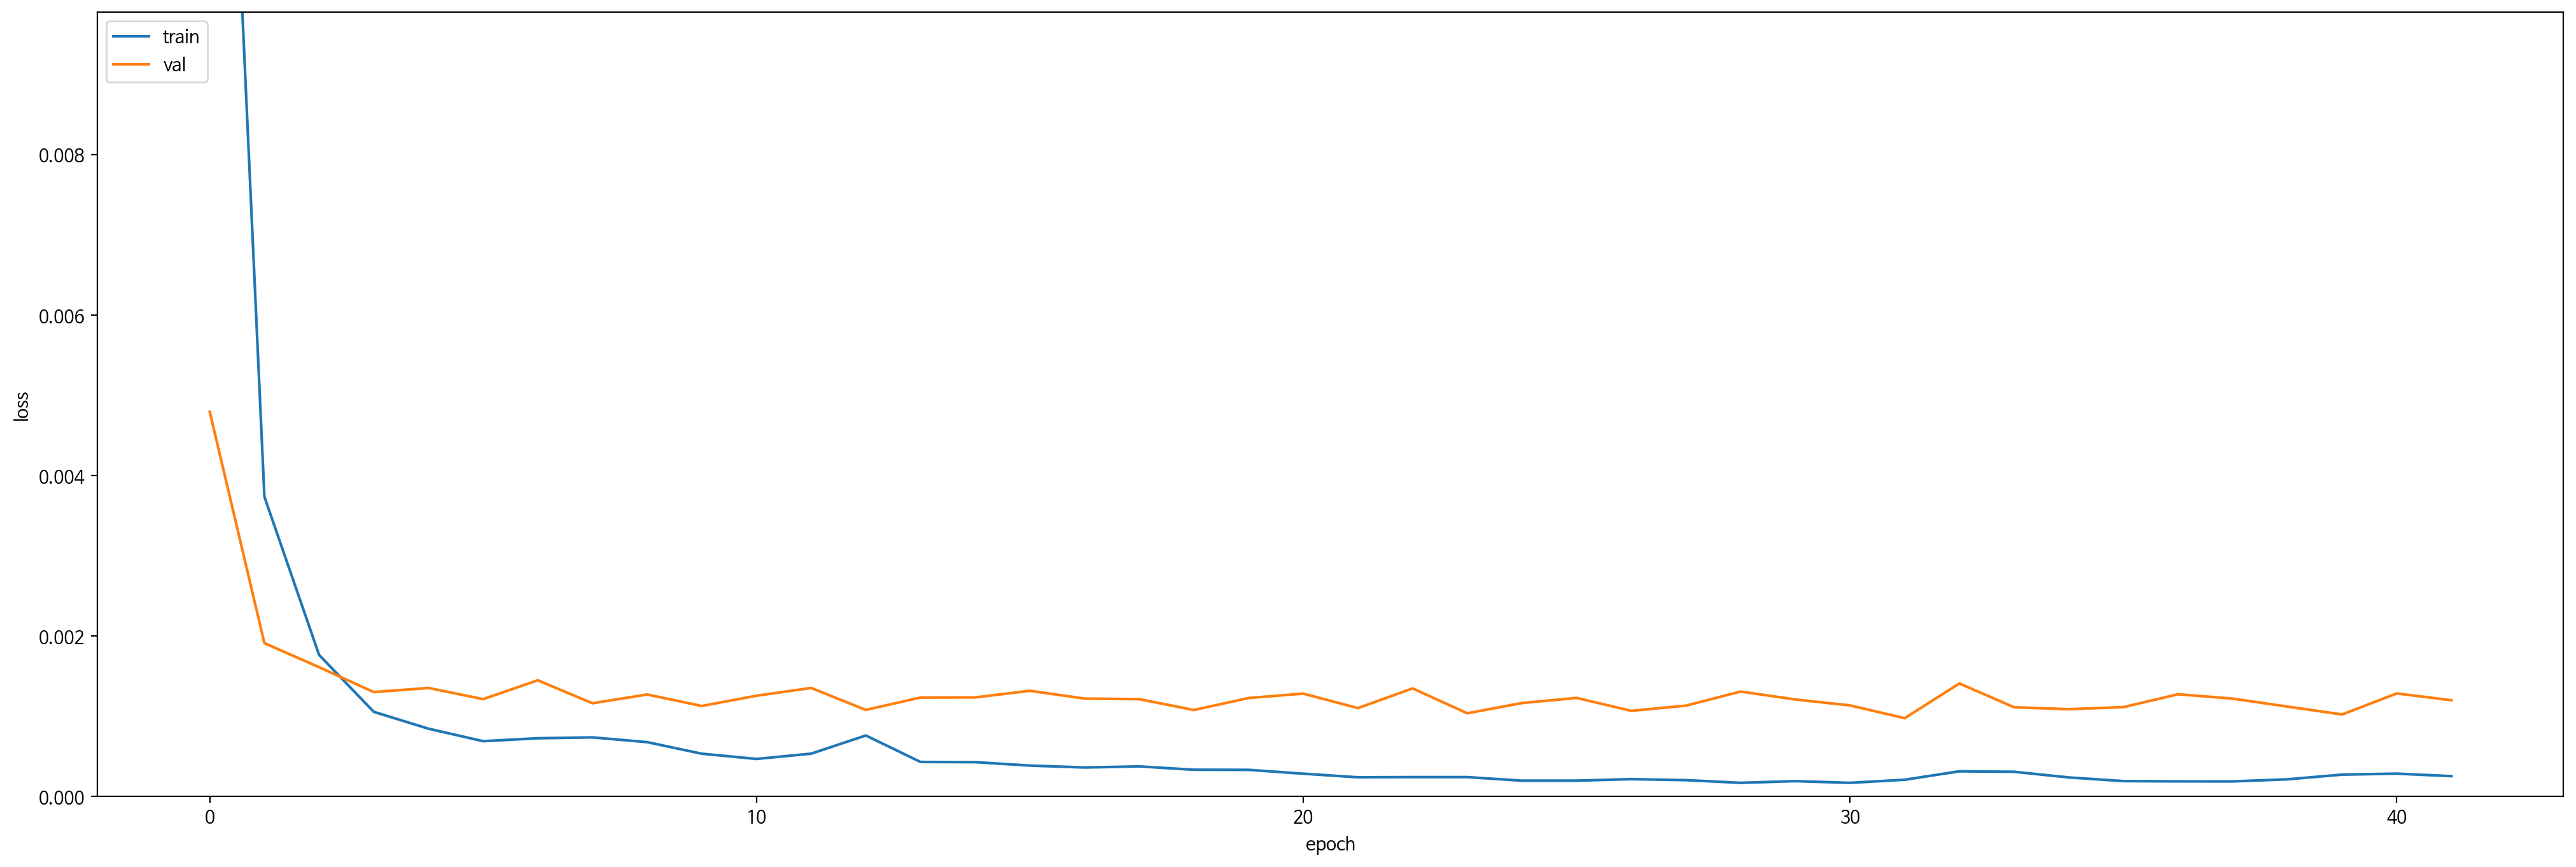

In [65]:
%%skip isSkip skip... : MultiStepModel은 학습하지 않음.

# 학습 과정 Plotting
plt.figure(figsize=(25,8))
plt.plot(train_hist.history['loss'])
plt.plot(train_hist.history['val_loss'])
# 모델간 loss 비교를 위해서는 Y축 scale을 고정하는 것이 좋음. 
# 비교가 아닌 경우 코멘트 처리.
# loss_max = max(max(train_hist.history['loss']), max(train_hist.history['val_loss']))

# if loss_max > 1 :
#   plt.ylim(0.0, loss_max)
# elif loss_max > 0.5 :
#   plt.ylim(0.0, 1)
# elif loss_max > 0.1 :
#   plt.ylim(0.0, 0.5)
# elif loss_max > 0.01 :
#   plt.ylim(0.0, 0.1)
# else :
#   plt.ylim(0.0, loss_max*1.5)

print('[ Train Chart ]')
loss_min = min(train_hist.history['val_loss'])
plt.ylim(0.0, loss_min*10)

plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


In [66]:
%%script echo skip
# 학습된 중요 Parameter 값 확인 

smoothing_alpha = [var for var in model.trainable_variables if 'smoothing_alpha' in var.name][0].numpy()
print('Exponential smoothing')
print(f"Learned smoothing_alpha (a): {smoothing_alpha}")

process_variance_value = [var for var in model.trainable_variables if 'process_variance' in var.name][0].numpy()
measurement_variance_value = [var for var in model.trainable_variables if 'measurement_variance' in var.name][0].numpy()
print('Kalman filter')
print(f"Learned process_variance (Q): {process_variance_value}")
print(f"Learned measurement_variance (R): {measurement_variance_value}")

skip


In [67]:
%%skip isSkip skip... : MultiStepModel은 학습하지 않으므로 skip

import keras
import pickle

if config['use_model'] == 'LSTM_4Multi' :
    model.save(config['base_model_path'])
    print('The Multi-Step Base Model is saved in ', config['base_model_path'])

    with open(config['base_scaler_path'], 'wb') as file:
        pickle.dump(scaler_x, file)
        pickle.dump(scaler_f, file)
        pickle.dump(scaler_y_step, file)
 
    print('The Multi-Step Base Scalers are saved in ', config['base_scaler_path'])


In [68]:
%%skip isSkip skip... : MultiStepModel은 Evalution 수행하지 않음.
# 모델 평가

print('------------------------------------')
model.reset_states()
model_result['train_loss'] = model.evaluate([trainX, trainF], trainY, verbose=0)
print(f"Train loss Score : {model_result['train_loss']}")

model.reset_states()
model_result['valid_loss'] = model.evaluate([validX,validF], validY, verbose=0)
print(f"Valid loss Score : {model_result['valid_loss']}")

model.reset_states()
model_result['test_loss'] = model.evaluate([testX, testF], testY, verbose=0)
print(f"Test  loss Score : {model_result['test_loss']}")
print('------------------------------------')


------------------------------------
Train loss Score : 0.00029789021937176585
Valid loss Score : 0.0009772642515599728
Test  loss Score : 0.001295190886594355
------------------------------------


In [69]:
%%script echo skipping... Tensor Board
# Tensor Board = True 설정시에만 실행

if isTensor_board == True :
    %load_ext tensorboard
    %tensorboard --bind_all --logdir ./tensor_board_log

skipping... Tensor Board


# 예측 수행 및 검토

## 예측 수행 함수

In [70]:
# 예측에 사용할 함수 

# model : 예측에 사용할 모델
# predX : 예측에 사용할 Sequence 데이터
# 여러건을 한건씩 인출하여 1건의 batch로 만든 후 예측 수행
def predict(model, dataX, dataF, isBatch):
    batch_size = 100
  
    if isBatch :
        return predict_Batch_LSTM(model, dataX, dataF, batch_size)
    else: 
        return predict_LSTM(model, dataX, dataF)

def predict_LSTM(model, dataX, dataF):
    n_total = len(dataX)
    predicts = []

    print('[ 총', n_total, '건 예측 실행 ]')
    for i in range(n_total):
        predicted = model.predict([np.array([dataX[i]]),np.array([dataF[i]])], batch_size=1, verbose=None)
        predicts.append(np.squeeze(predicted))

        if i%10 == 0 :
            print(f'Predicting... : [{i:6,d} / {n_total:6,d}] ', end='\r', flush=True)
            # print(predicted)
    return predicts

def predict_Batch_LSTM(model, dataX, dataF, batch_size):
    n_total = len(dataX)

    print('[ 총', n_total, '건 예측 실행 ]')
    predicted = model.predict([np.array(dataX), np.array(dataF)], batch_size=batch_size, verbose=None)
    return predicted



## scaler Inverse 및 성능 지표

In [71]:
# 평균제곱근오차
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
from scipy.stats import pearsonr

def RMSE(real, pred):
    return np.sqrt(mean_squared_error(real, pred))

# 평균절대오차
def MAE(real, pred):
    return mean_absolute_error(real, pred)

# 평균절대오차
def MAPE(real, pred):
    return mean_absolute_percentage_error(real, pred)


# 첨두유량 오차의 백분율 
def QER(real, pred):
    maxr = np.max(real)
    maxp = np.max(pred)

    return np.abs(((maxr - maxp) / maxr )) * 100

# metric 값 계산 및 출력 ( 특히 R2의 경우 컬럼이 여러개인 경우 컬럼별 R2 값의 평균이 계산됨. )
def processMetric(v_real, v_pred, isSilent=False):
    # mae  = round(MAE(v_real, v_pred))
    # rmse = round(RMSE(v_real, v_pred))
    mae  = MAE(v_real, v_pred)
    mape = MAPE(v_real, v_pred)
    rmse = RMSE(v_real, v_pred)
    r2   = r2_score(v_real, v_pred)  # 결정계수 R^2
    r, p = pearsonr(v_real.reshape(-1), v_pred.reshape(-1))  # 피어슨 상관계수 R 과 P value ( 귀무가설 판정 )
    cor2 = r**2                      # 상관계수 R의 제곱값
    qer  = QER(v_real, v_pred)  # 결정계수 R^2
    
    if not isSilent :
        print(f'- Total Count: {len(v_pred):6,d}')
        print(f'- MAE  SCORE : { mae:.4f}')
        print(f'- MAPE SCORE : {mape:.4f}')
        print(f'- RMSE SCORE : {rmse:.4f}')
        print(f'- NSE  SCORE : {  r2:.6f}')
        print(f'- CoR2 SCORE : {cor2:.6f}')
        print(f'- QER  SCORE : { qer:.6f}')

    return {'MAE':mae, 'MAPE':mape, 'RMSE':rmse, 'R2':r2, 'CR2':cor2, 'QER':qer}

    

# scaled 자료를 scaled 이전의 자료로 변환하는 함수
# scaler      : scaler
# scaled_data : scaled data ( list )
def inverseScale(scaler, scaled_data) :
    # scaled_data = np.array(scaled_data)
    
    return scaler.inverse_transform(scaled_data)


# MAE와 RMSE 등 예측 결과를 log CSV 파일에 추가 
# log CSV 파일은 다음과 같은 컬럼으로 구성
# 모델명, 데이터명, 데이터세트종류, 세트 IDs, MAE, RMSE, 레코드수, 실행일시, 기타정보
def print_config_result(v_config, v_result):
    print(f'\n[ Execution Configuration and Result ]') 
    print_config(v_config)
    print('')
    print_result(v_result)

def save_config_result(filename, v_config, v_result):
    print(f'\n[ Result File : {filename} ]') 
    config_result = v_config.copy()
    config_result.update(v_result)

    save_dictionary(filename, config_result)


## 일괄 예측 수행

In [72]:
%%time

def eval_model_dataset(v_model, v_scalerY, v_dataX, v_dataF, v_dataY, v_isBatch):

    # 예측 수행
    predY_org = predict(model, v_dataX, v_dataF, isBatch)

    # scale inverse를 위해 shape 변경 (multiple step 예측) 
    col_cnt = v_dataY.shape[-1]
    predY = predY_org.reshape(-1, col_cnt)
    predY = inverseScale(v_scalerY, predY)
    realY = v_dataY.reshape(-1, col_cnt)
    realY = inverseScale(v_scalerY, realY)

    metrics = processMetric(realY, predY) 

    predY = predY.reshape(predY_org.shape)                      
    return predY, metrics


def eval_model(v_model, scaler, datasets, dataset_names, isBatch) :

    datasets_metrics = {}
    predYs  = []   
    for name, dataset in zip(dataset_names, datasets):
        dataX = dataset[0]
        dataF = dataset[1]
        dataY = dataset[2]
        dataI = dataset[3]

        print(f'\n[ {name} Set ]')
        predY, metrics = eval_model_dataset(v_model, scaler, dataX, dataF, dataY, isBatch)
        predYs.append(predY)
        datasets_metrics[name] = metrics

    return datasets_metrics, predYs

def save_result_metric(v_config, set_metrics):
    for set_name in ['train', 'valid', 'test']:
        for metric in ['r2', 'mae', 'mape', 'rmse', 'cr2', 'qer']:
            key = f'{set_name}_{metric}'
            value = set_metrics[set_name][metric.upper()]
            v_config[key] = value


# 예측 수행 및 metric 측정 ( inverse된 예측 결과 return )
datasets_metrics, dataSets_pred = eval_model(model,  scalers[2], dataSets_ts, ['train', 'valid', 'test'], True)
save_result_metric(model_result, datasets_metrics)


[ train Set ]
[ 총 1110 건 예측 실행 ]
- Total Count: 39,960
- MAE  SCORE : 0.0778
- MAPE SCORE : 0.0249
- RMSE SCORE : 0.1055
- NSE  SCORE : 0.990968
- CoR2 SCORE : 0.993158
- QER  SCORE : 6.163673

[ valid Set ]
[ 총 525 건 예측 실행 ]
- Total Count: 18,900
- MAE  SCORE : 0.1201
- MAPE SCORE : 0.0384
- RMSE SCORE : 0.1910
- NSE  SCORE : 0.950840
- CoR2 SCORE : 0.956930
- QER  SCORE : 0.211066

[ test Set ]
[ 총 327 건 예측 실행 ]
- Total Count: 11,772
- MAE  SCORE : 0.1394
- MAPE SCORE : 0.0368
- RMSE SCORE : 0.2199
- NSE  SCORE : 0.961319
- CoR2 SCORE : 0.968303
- QER  SCORE : 5.156774
CPU times: user 10.4 s, sys: 9.47 s, total: 19.8 s
Wall time: 5.21 s


In [73]:
# Dictionary 형식의 데이터를 DataFrame으로 변환하는 함수

def flatten_dict(d, parent_key='', sep='_'):
    items = []
    for k, v in d.items():
        # new_key = f"{parent_key}{sep}{k}" if parent_key else k
        new_key = f"{k}" if parent_key else k
        if isinstance(v, dict):
            items.extend(flatten_dict(v, new_key, sep=sep).items())
        else:
            items.append((new_key, v))
    return dict(items)

def convert_df(data):
    flattened_data = [flatten_dict(item) for item in data.values()]
    return pd.DataFrame(flattened_data, index=data.keys())


In [74]:
# Data Set 별 metric 출력

display(convert_df(datasets_metrics))

,MAE,MAPE,RMSE,R2,CR2,QER
train,0.077831,0.024858,0.105456,0.990968,0.993158,6.163673
valid,0.120127,0.038371,0.191006,0.950840,0.956930,0.211066
test,0.139377,0.036804,0.219891,0.961319,0.968303,5.156774


In [75]:
# 1시간 이상 예측하는 경우 각 시간별 지표값 산출 및 model_result에 결과 저장

def calc_metrics(setnames, v_preds, v_reals):
    metrics_all = []
    for name, predY, realY in zip(setnames, v_preds, v_reals):
        predY = predY.reshape(predY.shape[0], -1)
        realY = realY.reshape(realY.shape[0], -1)
        metrics_set = [processMetric(realY[:, i], predY[:, i], True) for i in range(predY.shape[1])]
        metrics_all.append(metrics_set)
    return metrics_all

realYs = [data[2] for data in dataSets_org_ts]
predYs = dataSets_pred

metrics_sets_h = calc_metrics(['Train', 'Valid', 'Test'], predYs, realYs)

# 각 지표를 model_result에 저장
for metric_name in ['mae_h', 'mape_h', 'rmse_h', 'r2_h', 'cr2_h', 'qer_h']:
    model_result[f'train_{metric_name}'] = [metrics[metric_name.split('_')[0].upper()] for metrics in metrics_sets_h[0]]
    model_result[f'valid_{metric_name}'] = [metrics[metric_name.split('_')[0].upper()] for metrics in metrics_sets_h[1]]
    model_result[f'test_{metric_name}']  = [metrics[metric_name.split('_')[0].upper()] for metrics in metrics_sets_h[2]]



In [76]:
# 시간별 metric 출력 

for set_name in ['train', 'valid', 'test']:
    print(f'\n[ {set_name} ]')
    for metric in ['r2_h', 'mae_h', 'mape_h', 'rmse_h', 'cr2_h', 'qer_h']:
        key = f'{set_name}_{metric}'
        value = model_result[key]
        formatted_values = [f"{v:.10f}" for v in value]
        print(f"{key:<14} {formatted_values}") 


[ train ]
train_r2_h     ['0.9971568660', '0.9970875571', '0.9965302117', '0.9964610132', '0.9967846749', '0.9968898840', '0.9959562655', '0.9946626390', '0.9931081009', '0.9910603161', '0.9889312273', '0.9893048734', '0.9820436650', '0.9805786979', '0.9834858102', '0.9886184026', '0.9911400026', '0.9923911527', '0.9926186693', '0.9904276970', '0.9919286141', '0.9926324775', '0.9914385857', '0.9944539169', '0.9929383513', '0.9930813570', '0.9908457165', '0.9911477830', '0.9903905385', '0.9907039921', '0.9889520073', '0.9887577145', '0.9880022124', '0.9846383149', '0.9849918534', '0.9838054402']
train_mae_h    ['0.0372142396', '0.0379456940', '0.0433947318', '0.0461433832', '0.0466477513', '0.0451537945', '0.0529596159', '0.0621104534', '0.0751532722', '0.0864340059', '0.0994760181', '0.0950896124', '0.1260840002', '0.1282621451', '0.1141658831', '0.0862765009', '0.0742189752', '0.0729891461', '0.0616941063', '0.0710298787', '0.0643964956', '0.0635848085', '0.0765771846', '0.0587800870

### 결과 저장 및 Summary

In [77]:
# 실행 결과 출력 및 저장

print_config_result(config, model_result)

if is_save_result == True :
    save_config_result(model_result_file, config, model_result)


[ Execution Configuration and Result ]
# Execution Configuration
name: sungnam_gn36_ver2
use_model: MultiLSTM
seq_length: 36
lead_time: 0
predict: 36
forecast: 36
y_idxs: [-1]
train_events: [0, 1, 4, 5]
valid_events: [2]
test_events: [3]
isExecTuning: False
num_of_feature: 10
num_of_forecast: 8
num_of_cells: [64, 64]
num_of_layer: 12
smoothing_type: 2
ma_win_size: 4
fb_win_size: 1
num_of_epochs: 200
num_of_batch: 64
learning_rate: 0.0005
dropout_rate: 0.0
isEarlystop: True
patience_count: 10
isCheckpoint: False

[ Model Train and Predict Result ]
train_sdate: 20251117_165619
train_edate: 20251117_170056
chkpt_file: 
best_epochs: 32
train_loss: 0.00029789021937176585
valid_loss: 0.0009772642515599728
test_loss: 0.001295190886594355
train_rows: 1110
valid_rows: 525
test_rows: 327
train_rmse: 0.10545552759327523
valid_rmse: 0.19100609378299413
test_rmse: 0.21989132026993038
train_mae: 0.07783096479629732
valid_mae: 0.1201273470005661
test_mae: 0.13937688597278294
train_mape: 0.0248575775

In [78]:
import matplotlib.pyplot as plt
import numpy as np

# Single Chart
def plot_single_chart(name, target, step, pred, real):
    fig = plt.figure(figsize=(20, 6))
    r2 = r2_score(real, pred)  # 결정계수 R^2

    plt.title(f'[ {name} / {target} - {step} Step ] / NSE : {r2}')
    plt.plot(np.arange(len(pred)), pred, label=f'Prediction {step} Step')
    plt.plot(np.arange(len(real)), real, label=f'Real {step} Step')
    plt.ylim(0.0, 8.0)
    plt.legend(loc='best')
    plt.show()

# 전체 Chart
def drawPredictChart(name_list, target_list, pred_list, real_list):

    pred_list = [ pred.reshape(pred.shape[0], -1) for pred in pred_list ]
    real_list = [ real.reshape(real.shape[0], -1) for real in real_list ]

    target_cnt = len(target_list)

    for i, name in enumerate(name_list):
        print(f'[ {name} ]')

        for j in range(pred_list[i].shape[1]):
            if j % target_cnt == 0:
                print(f'[ {j//target_cnt+1} Step ]')

            step = j//target_cnt + 1
            target = target_list[j % target_cnt]
            plot_single_chart(name, target, step, pred_list[i][:, j], real_list[i][:, j])

In [79]:
%%skip isSkipPredictChart skipping.... Charting 

# 예측 결과를 Chart로 검토 
# name_list = ['Train', 'Valid', 'Test']
# pred_list = [dataSets_pred[0], dataSets_pred[1], dataSets_pred[2]]
# real_list = [dataSets_org_ts[0][2], dataSets_org_ts[1][2], dataSets_org_ts[2][2]]

name_list = ['Test']
pred_list = [dataSets_pred[2]]
real_list = [dataSets_org_ts[2][2]]

sidx = 0
eidx = 12

# drawPredictChart(name_list, y_cols, pred_list, real_list)
drawPredictChart(name_list, y_cols, pred_list[sidx:eidx], real_list[sidx:eidx])

 skipping.... Charting


In [80]:
# 정교한 Charting을 위해 결과용 Dataframe 생성 함수 
# p_leadtime : 0 - 1시간후, 1 - 2시간후 .. )

def makeSummaryDF(p_index, p_pred, p_real, p_leadtime):
    
    v_index = p_index[:]
    v_pred  = p_pred [:, p_leadtime]
    v_real  = p_real [:, p_leadtime]
    
        # 1차원 배열로 변환
    v_index = v_index.reshape(-1)
    v_pred = v_pred.reshape(-1)
    v_real = v_real.reshape(-1)

    # 검증 dataframe 생성 ( date / 예측값 / 실제값  )
    v_summary = pd.DataFrame({'datetime':v_index, 'predict':v_pred.reshape(-1) , 'real':v_real.reshape(-1)})

    # datetime을 가독성이 좋도록 변경 
    # format : YYYY/MM/DD HH
    v_summary['datetime'] = v_summary['datetime'].apply(lambda x: f'{x[2:4]}/{x[4:6]}/{x[6:8]} {x[8:]}')

    # datetime을 가독성이 좋도록 변경 ( 연도 제거 )
    # format : MM/DD HH
    #v_summary['datetime'] = v_summary['datetime'].apply(lambda x: f'{x[4:6]}/{x[6:8]} {x[8:]}')

    # datetime을 index로 지정
    v_summary.set_index('datetime', inplace=True, drop=True)
    
    # 예측과 실제값의 차이값 생성
    v_summary['diff'] = v_summary['real'] - v_summary['predict']

    return v_summary



# 각 Target 변수에 예측값의 수만큼의 요소를 가진 초기화된 리스트 생성 
# Target 컬럼수 * 예측시간 만큼의 컬럼이 생성됨.
# 예. Target값 2개 , 예측시간 2시간의 경우 2*2 = 4개 리스트 생성

train_list = [0 for i in range(dataSets_org_ts[0][2].shape[1]) ] 
valid_list = train_list.copy()
test_list  = train_list.copy() 

# 각 예측 시간대별로 예측
for i in range(len(train_list)) :
    train_list[i] = makeSummaryDF(dataSets_org_ts[0][3], dataSets_pred[0], dataSets_org_ts[0][2], i)
    valid_list[i] = makeSummaryDF(dataSets_org_ts[1][3], dataSets_pred[1], dataSets_org_ts[1][2], i)
    test_list [i] = makeSummaryDF(dataSets_org_ts[2][3], dataSets_pred[2], dataSets_org_ts[2][2],  i)

target_cnt = len(y_cols)
print(f'[ Predict Range : {len(test_list)} ]')
for i in range(dataSets_org_ts[0][2].shape[1]) :
    v_hour  = int(i/target_cnt + 1)
    v_cname = y_cols[i%target_cnt]

    print(f'- Predict {v_hour} Hour(s) / {v_cname} : Train : {train_list[i].shape[0]} rows / Valid : {valid_list[i].shape[0]} rows / Test : {test_list[i].shape[0]} rows')
    # print('Train :', train_list[i].columns, train_list[i].shape[0], 'rows')
    # print('Valid :', valid_list[i].columns, valid_list[i].shape[0], 'rows')
    # print('Test  :',  test_list[i].columns,  test_list[i].shape[0], 'rows')


[ Predict Range : 36 ]
- Predict 1 Hour(s) / F_대곡교 : Train : 1110 rows / Valid : 525 rows / Test : 327 rows
- Predict 2 Hour(s) / F_대곡교 : Train : 1110 rows / Valid : 525 rows / Test : 327 rows
- Predict 3 Hour(s) / F_대곡교 : Train : 1110 rows / Valid : 525 rows / Test : 327 rows
- Predict 4 Hour(s) / F_대곡교 : Train : 1110 rows / Valid : 525 rows / Test : 327 rows
- Predict 5 Hour(s) / F_대곡교 : Train : 1110 rows / Valid : 525 rows / Test : 327 rows
- Predict 6 Hour(s) / F_대곡교 : Train : 1110 rows / Valid : 525 rows / Test : 327 rows
- Predict 7 Hour(s) / F_대곡교 : Train : 1110 rows / Valid : 525 rows / Test : 327 rows
- Predict 8 Hour(s) / F_대곡교 : Train : 1110 rows / Valid : 525 rows / Test : 327 rows
- Predict 9 Hour(s) / F_대곡교 : Train : 1110 rows / Valid : 525 rows / Test : 327 rows
- Predict 10 Hour(s) / F_대곡교 : Train : 1110 rows / Valid : 525 rows / Test : 327 rows
- Predict 11 Hour(s) / F_대곡교 : Train : 1110 rows / Valid : 525 rows / Test : 327 rows
- Predict 12 Hour(s) / F_대곡교 : Train : 1

In [81]:
def makePredictResult(p_index, p_pred, p_real, col_list, pred_hour):
    
    combined = np.hstack((p_index.reshape(p_index.shape[0],-1), p_real.reshape(p_real.shape[0], -1), p_pred.reshape(p_pred.shape[0], -1)))    
    
    pd_cols = ['datetime']
    for i in range(pred_hour):
        for cname in col_list:
            pd_cols.append(f'{cname}_Real_{i+1}h')

    for i in range(pred_hour):
        for j in col_list:
            pd_cols.append(f'{cname}_Pred_{i+1}h')
    
    df = pd.DataFrame(combined, columns=pd_cols)
    df.set_index('datetime', drop=True, inplace=True)
    
    return df

def savePredictCSV(is_save_list) :
    now = datetime.now().strftime('%Y%m%d_%H%M%S')
    set_names = ['train','valid','test']

    predict_files = []
  
    for i, set_name in enumerate(set_names):
        if not is_save_list[i] :
            continue

        pred_real_data = makePredictResult(dataSets_org_ts[i][3], dataSets_pred[i], dataSets_org_ts[i][2], y_cols, config['predict'])
        os.makedirs('./output', exist_ok=True)
        filename = f"./output/{config['name']}_{config['use_model']}_{set_name}_s{config['seq_length']}_h{config['predict']}_{now}.csv"
        pred_real_data.to_csv(filename, encoding='utf-8-sig')
        predict_files.append(filename)
        print(f'{set_name} Set Predict CSV : {filename}')

    return predict_files

# Train save : false
# Valid save : True
# Test  save : True
if is_save_predict:
    predict_files = savePredictCSV([False, True, True])

predict_files

valid Set Predict CSV : ./output/sungnam_gn36_ver2_MultiLSTM_valid_s36_h36_20251117_170111.csv
test Set Predict CSV : ./output/sungnam_gn36_ver2_MultiLSTM_test_s36_h36_20251117_170111.csv


['./output/sungnam_gn36_ver2_MultiLSTM_valid_s36_h36_20251117_170111.csv',
 './output/sungnam_gn36_ver2_MultiLSTM_test_s36_h36_20251117_170111.csv']

Model Predict Files :./output/sungnam_gn36_ver2_MultiLSTM_test_s36_h36_20251117_170111.csv
End Index is too large. ( it is replaced with 327.)


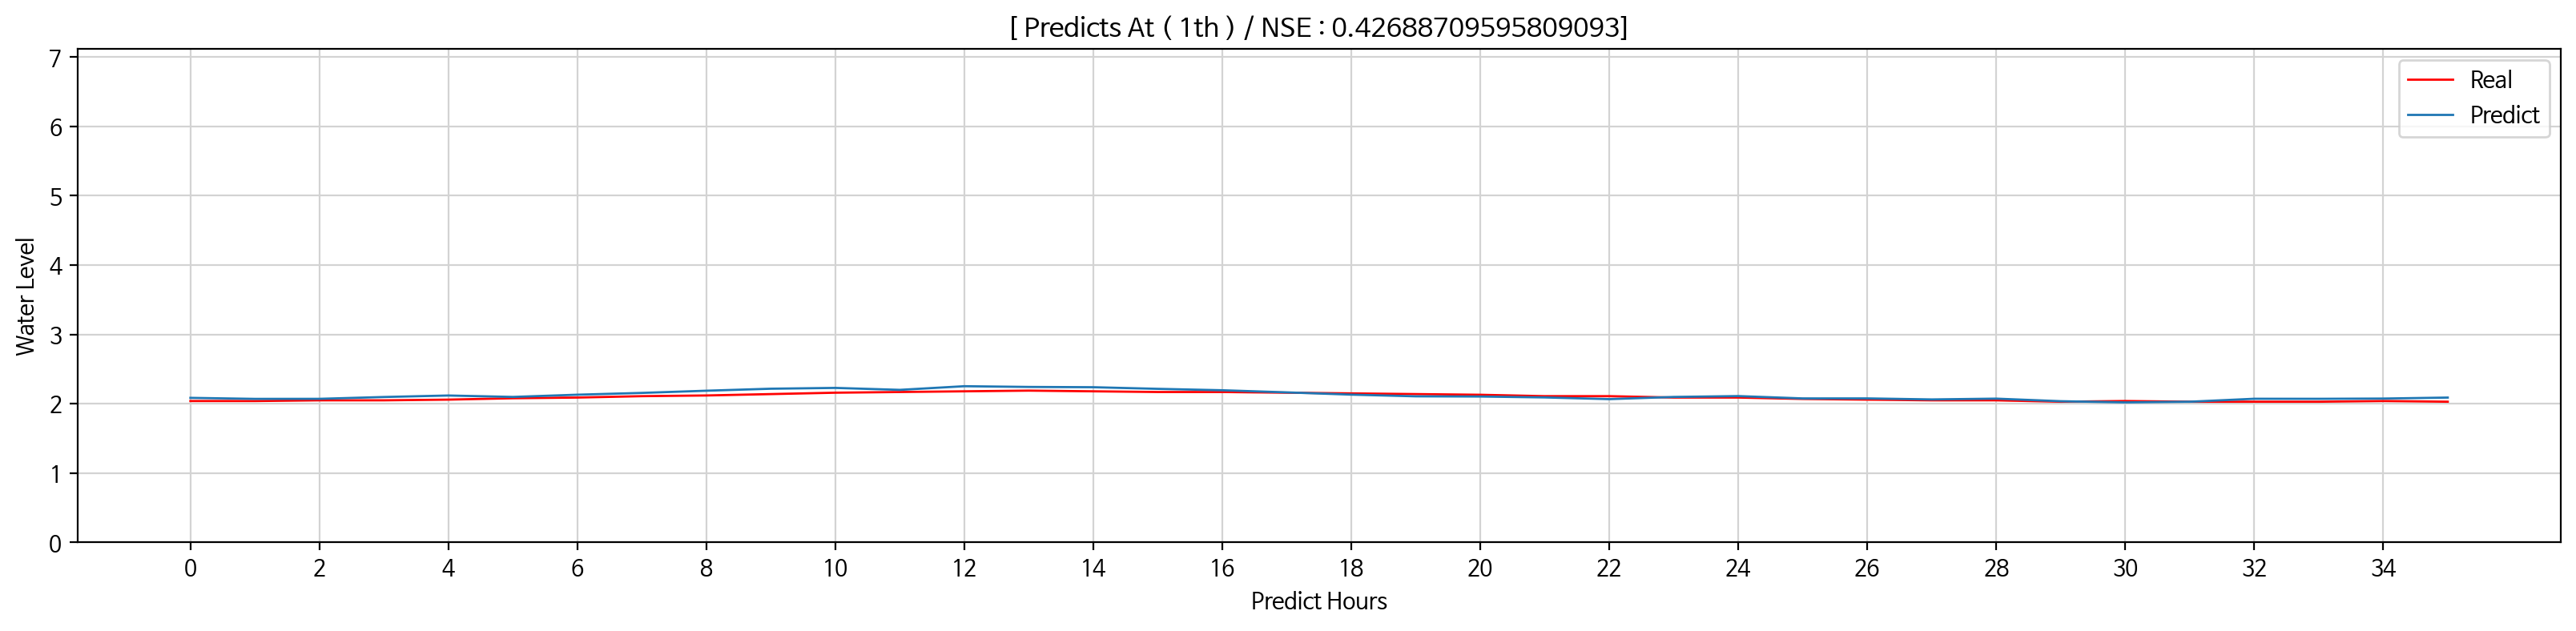

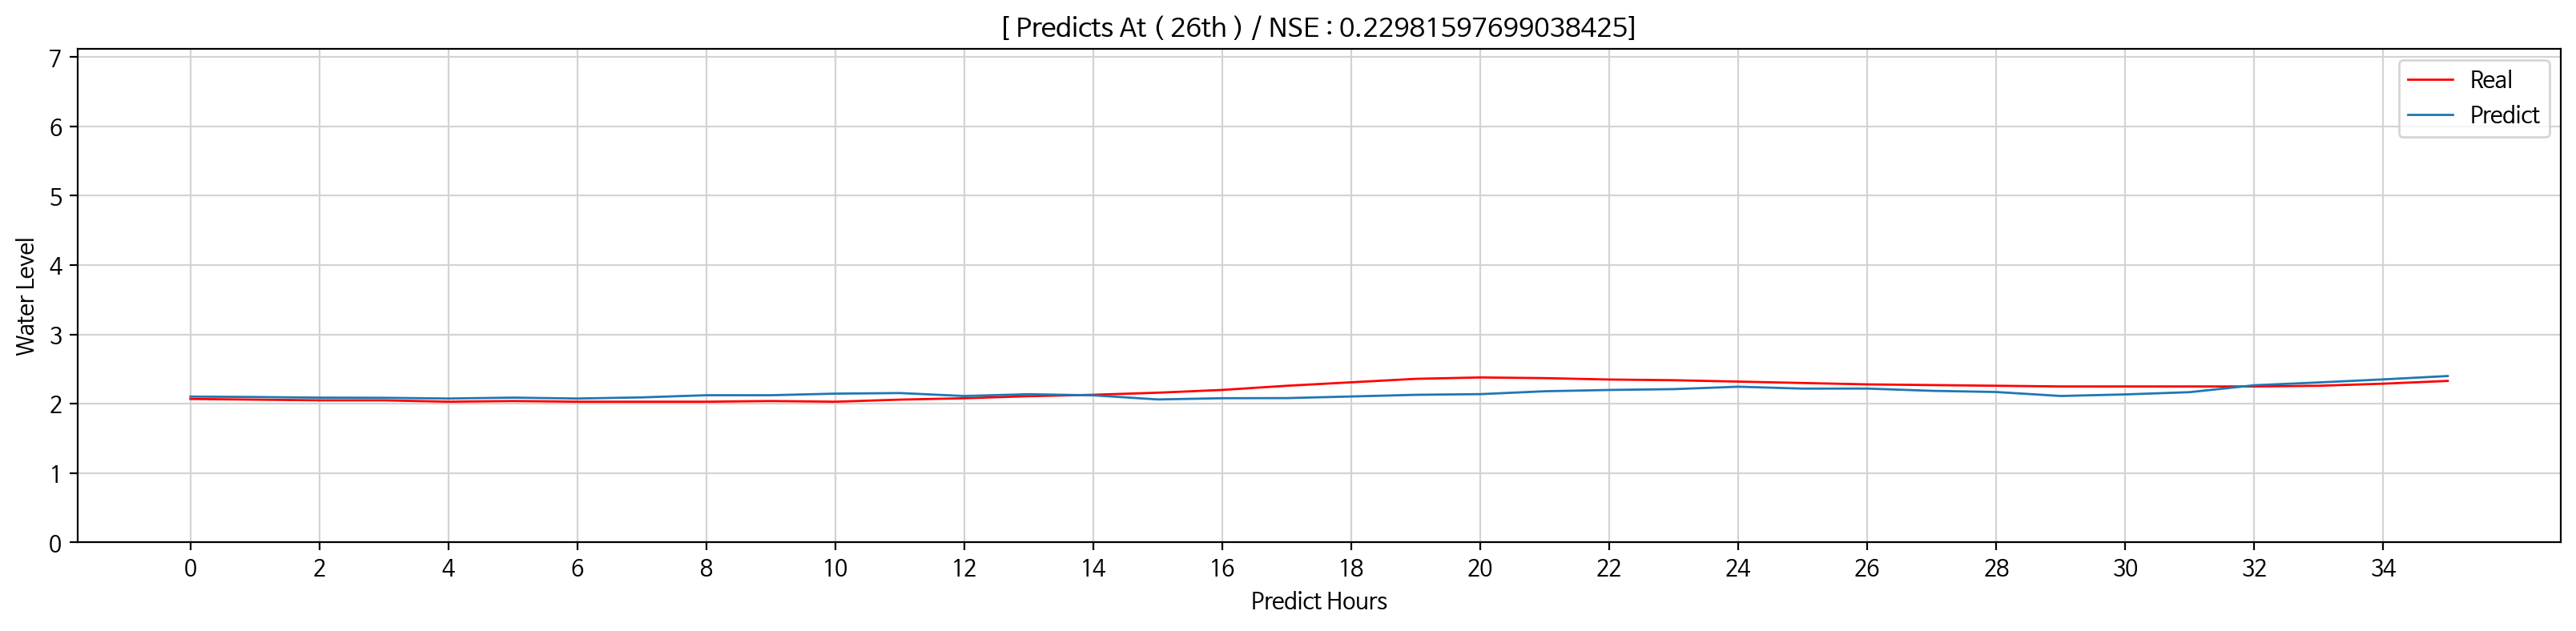

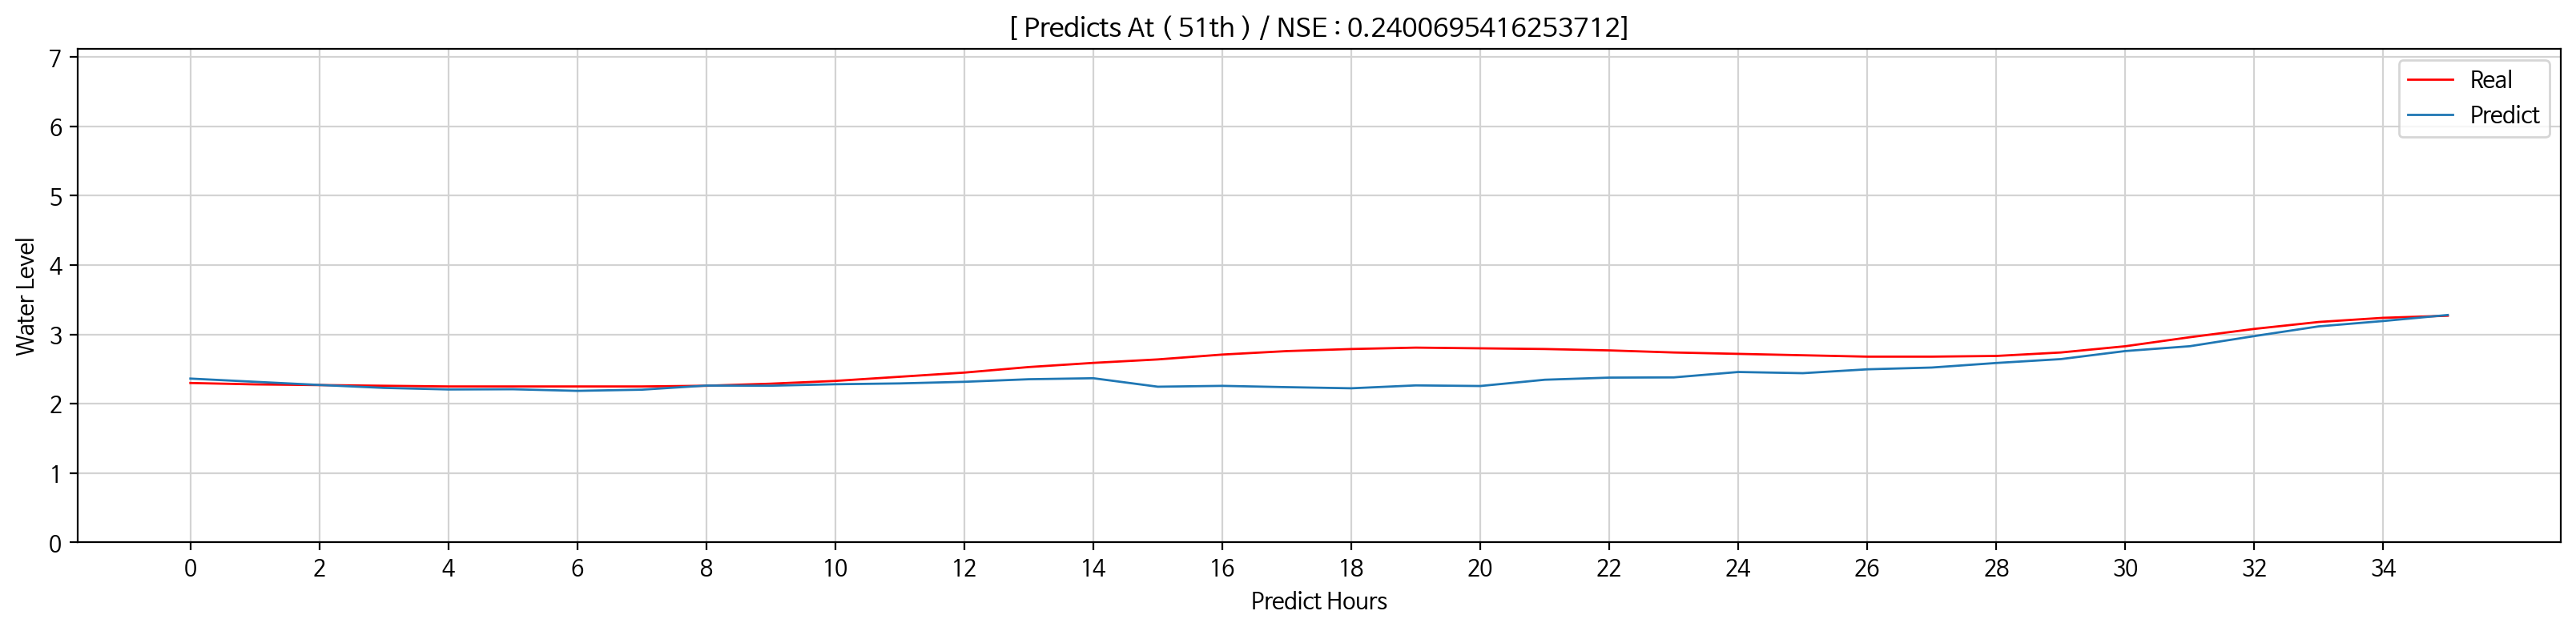

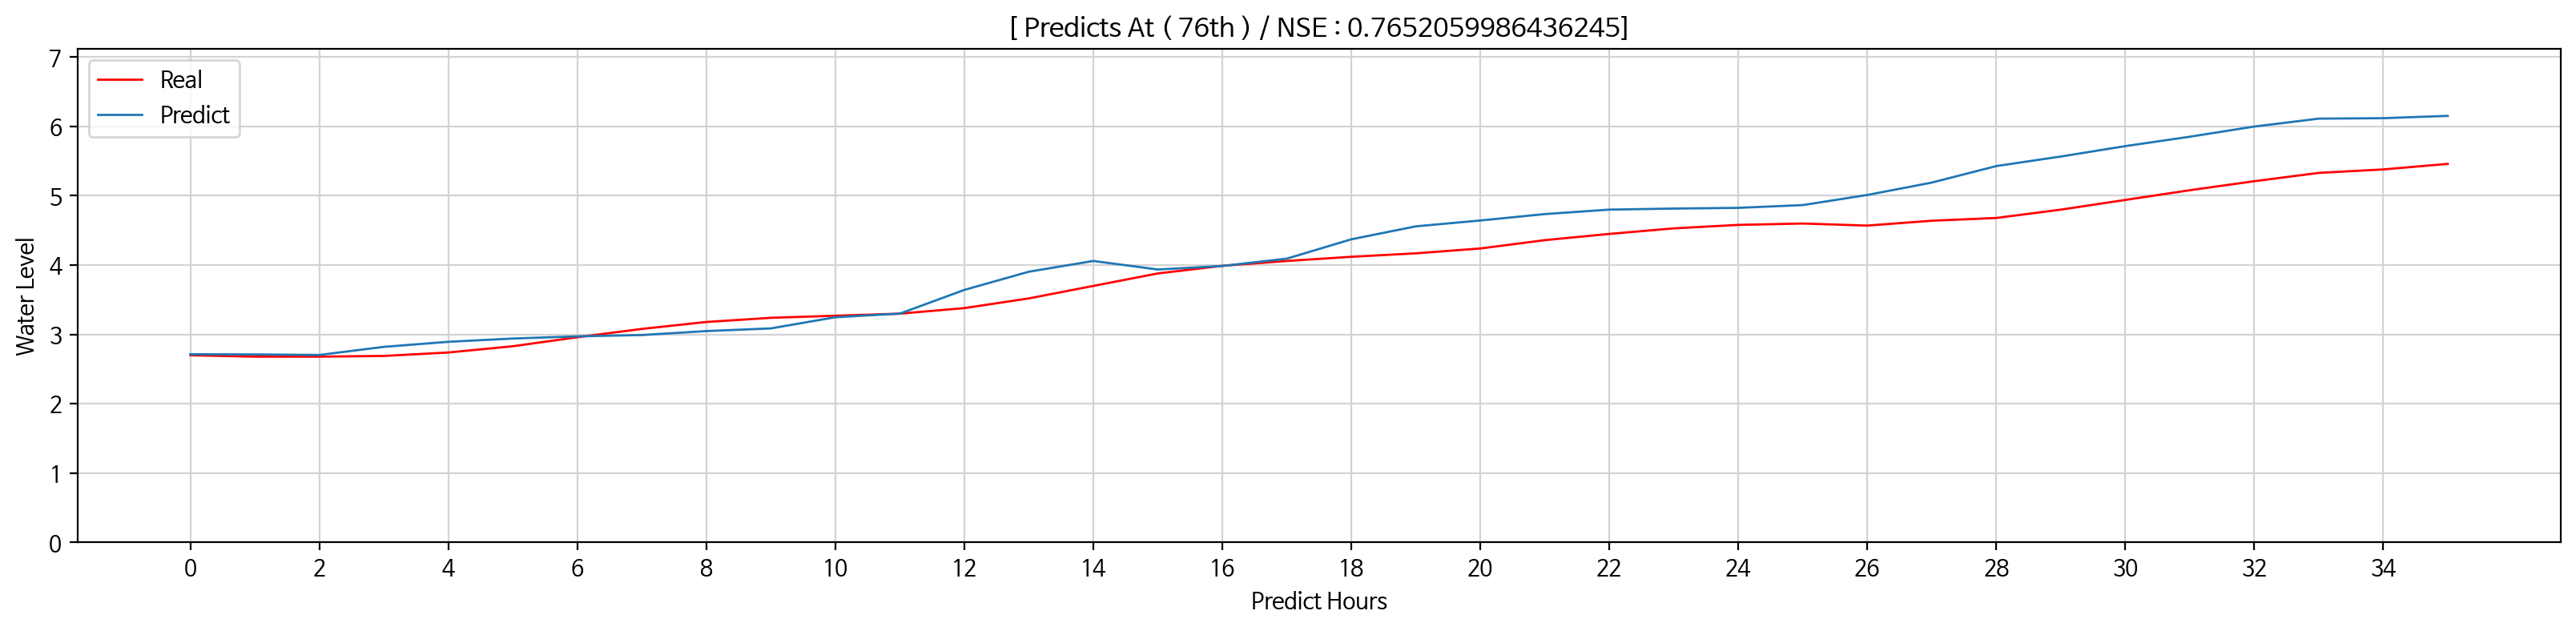

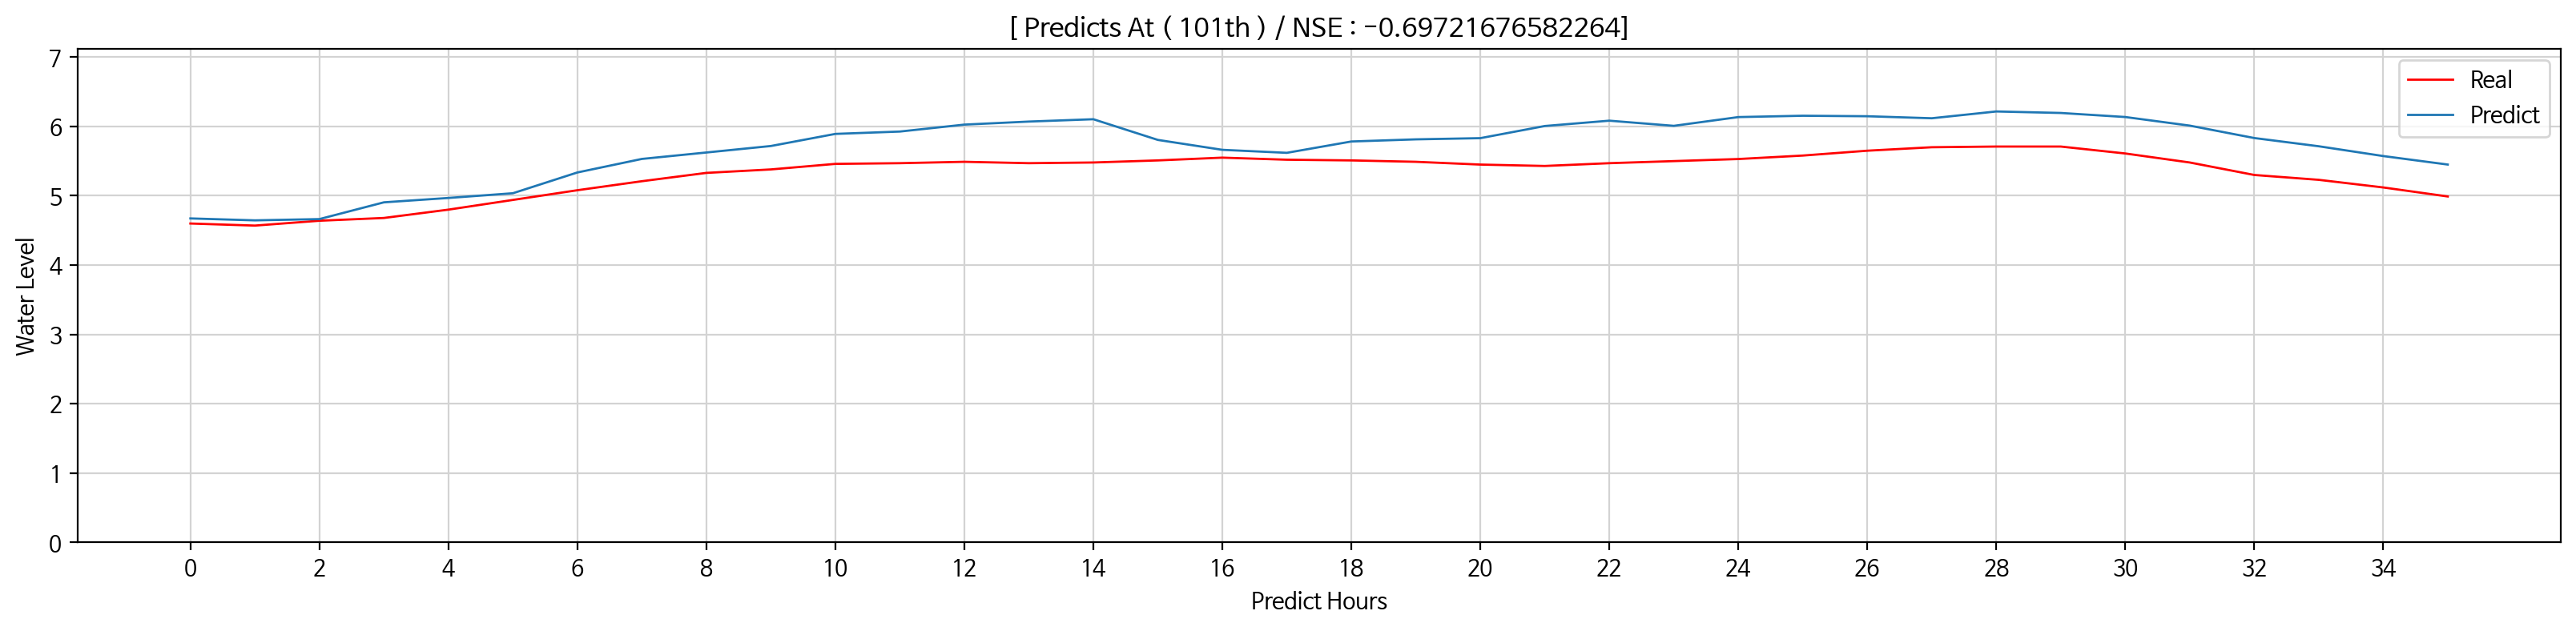

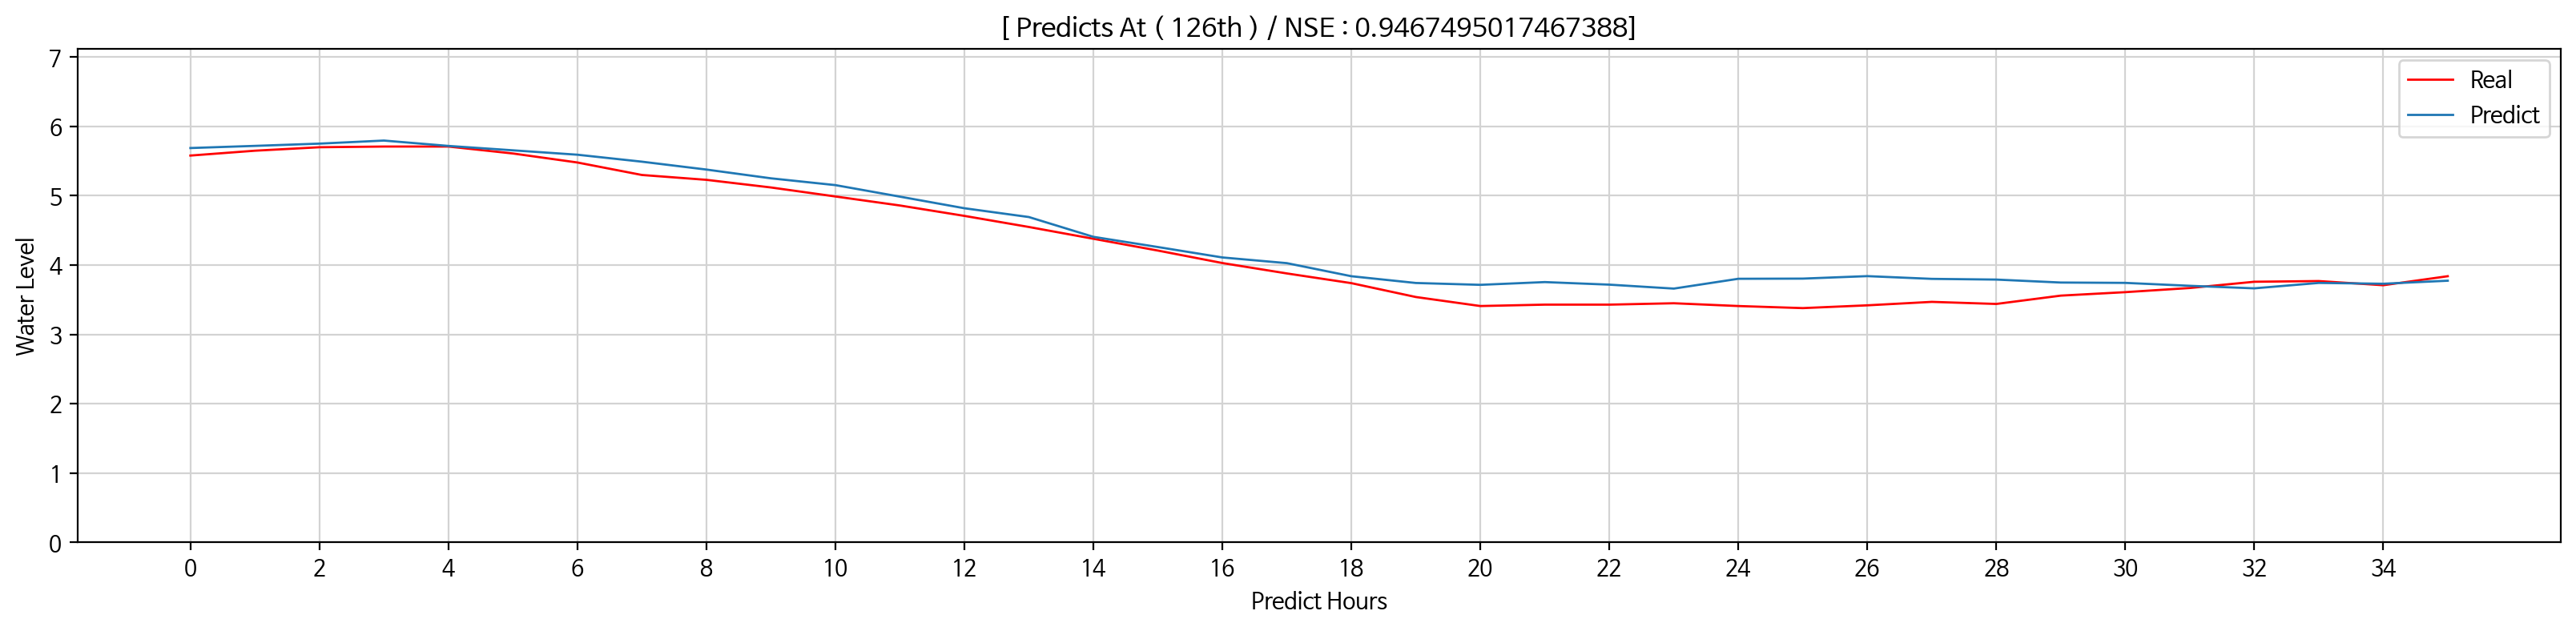

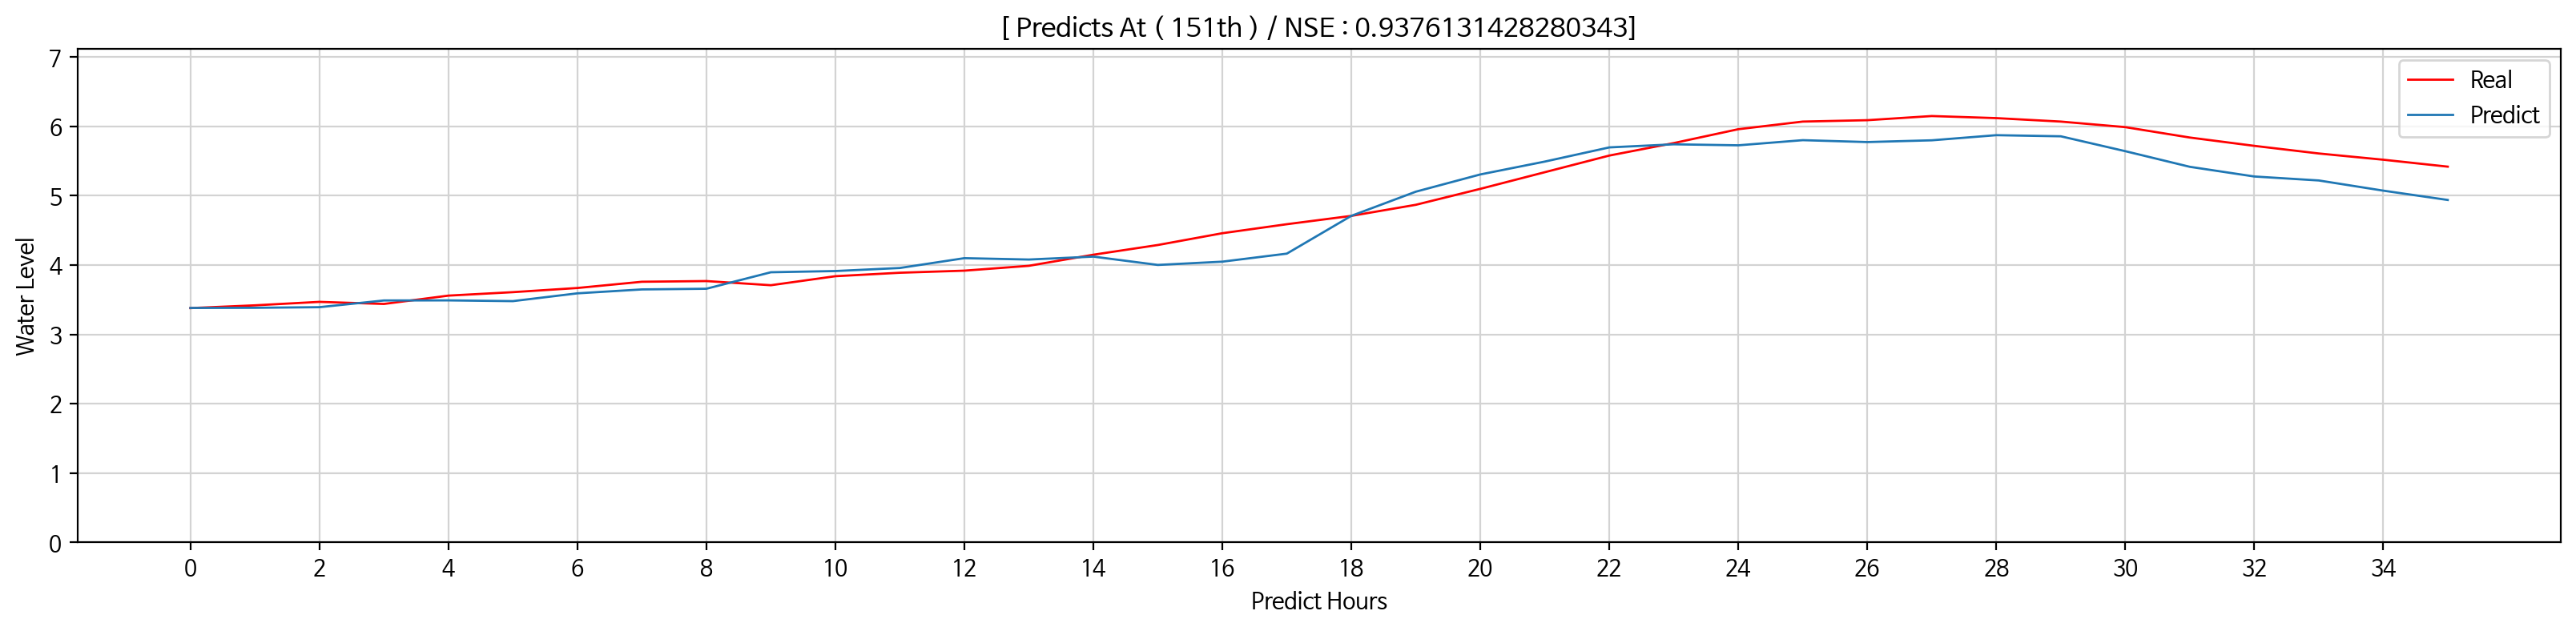

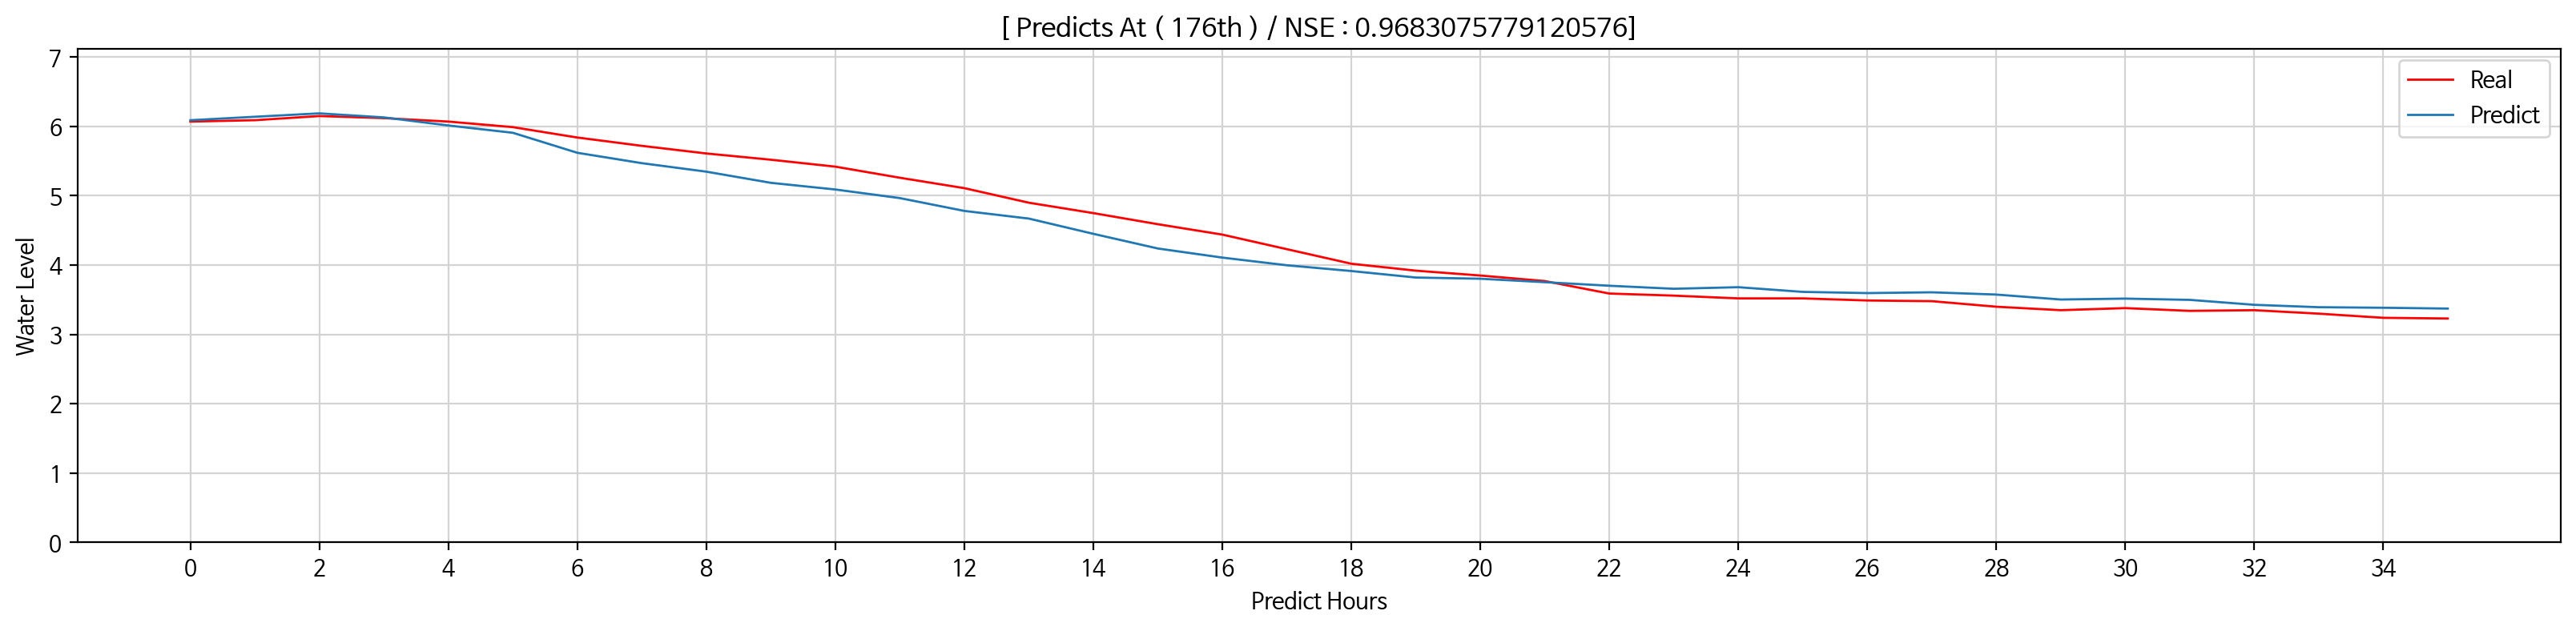

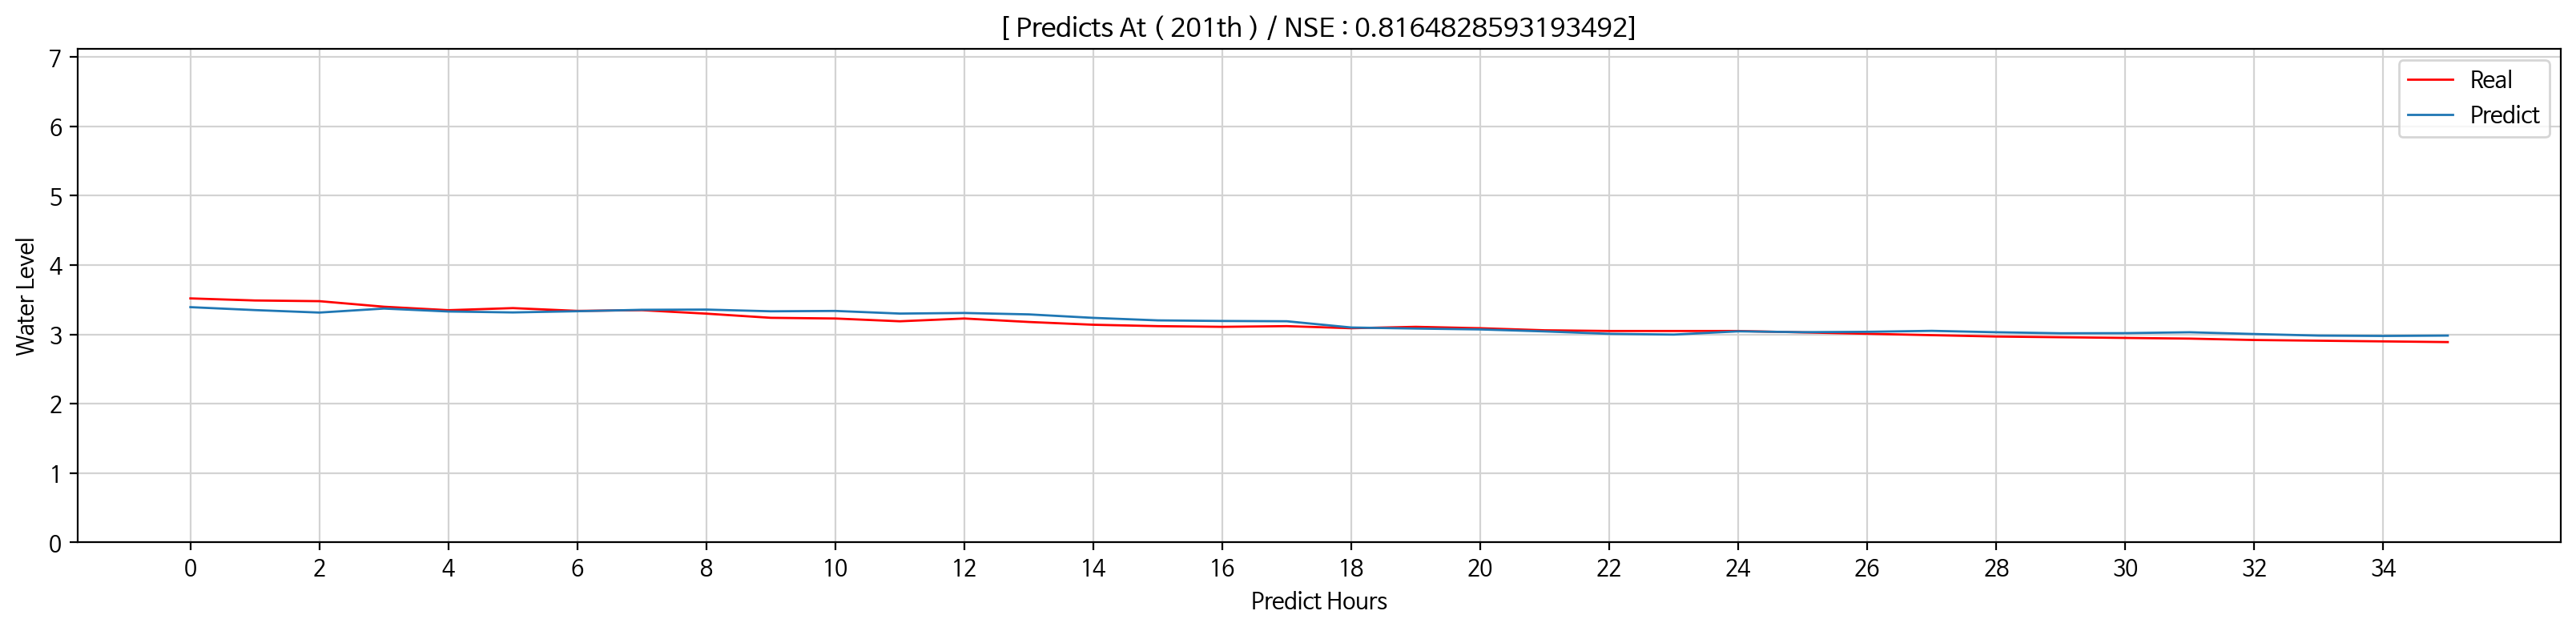

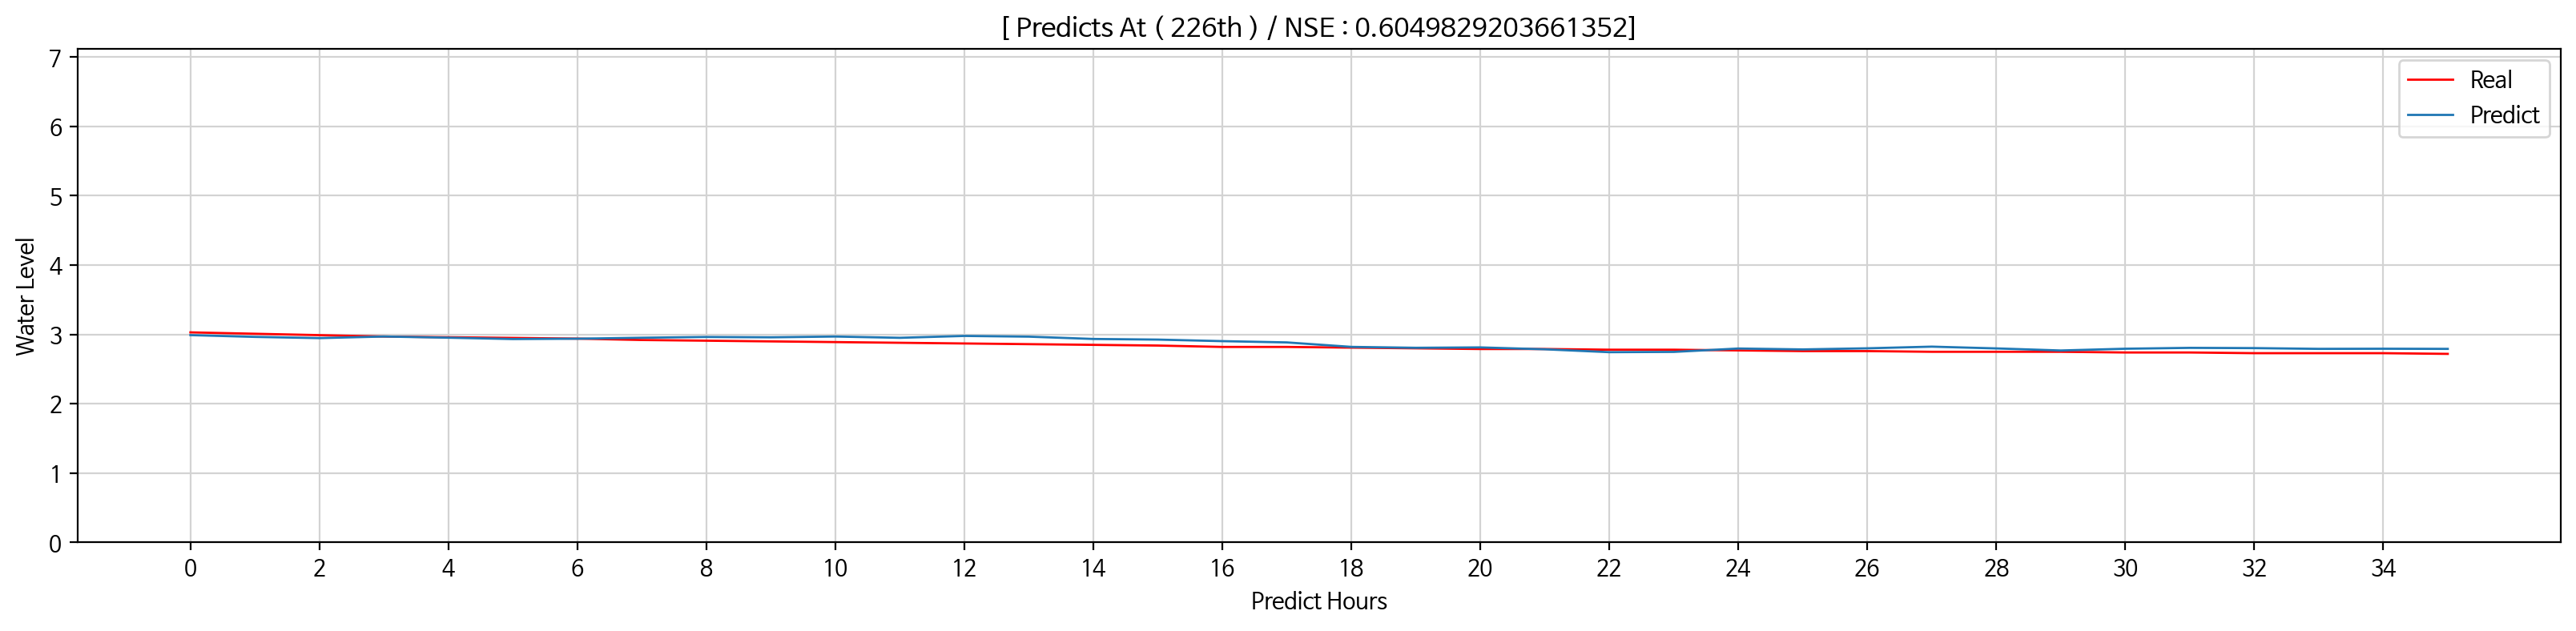

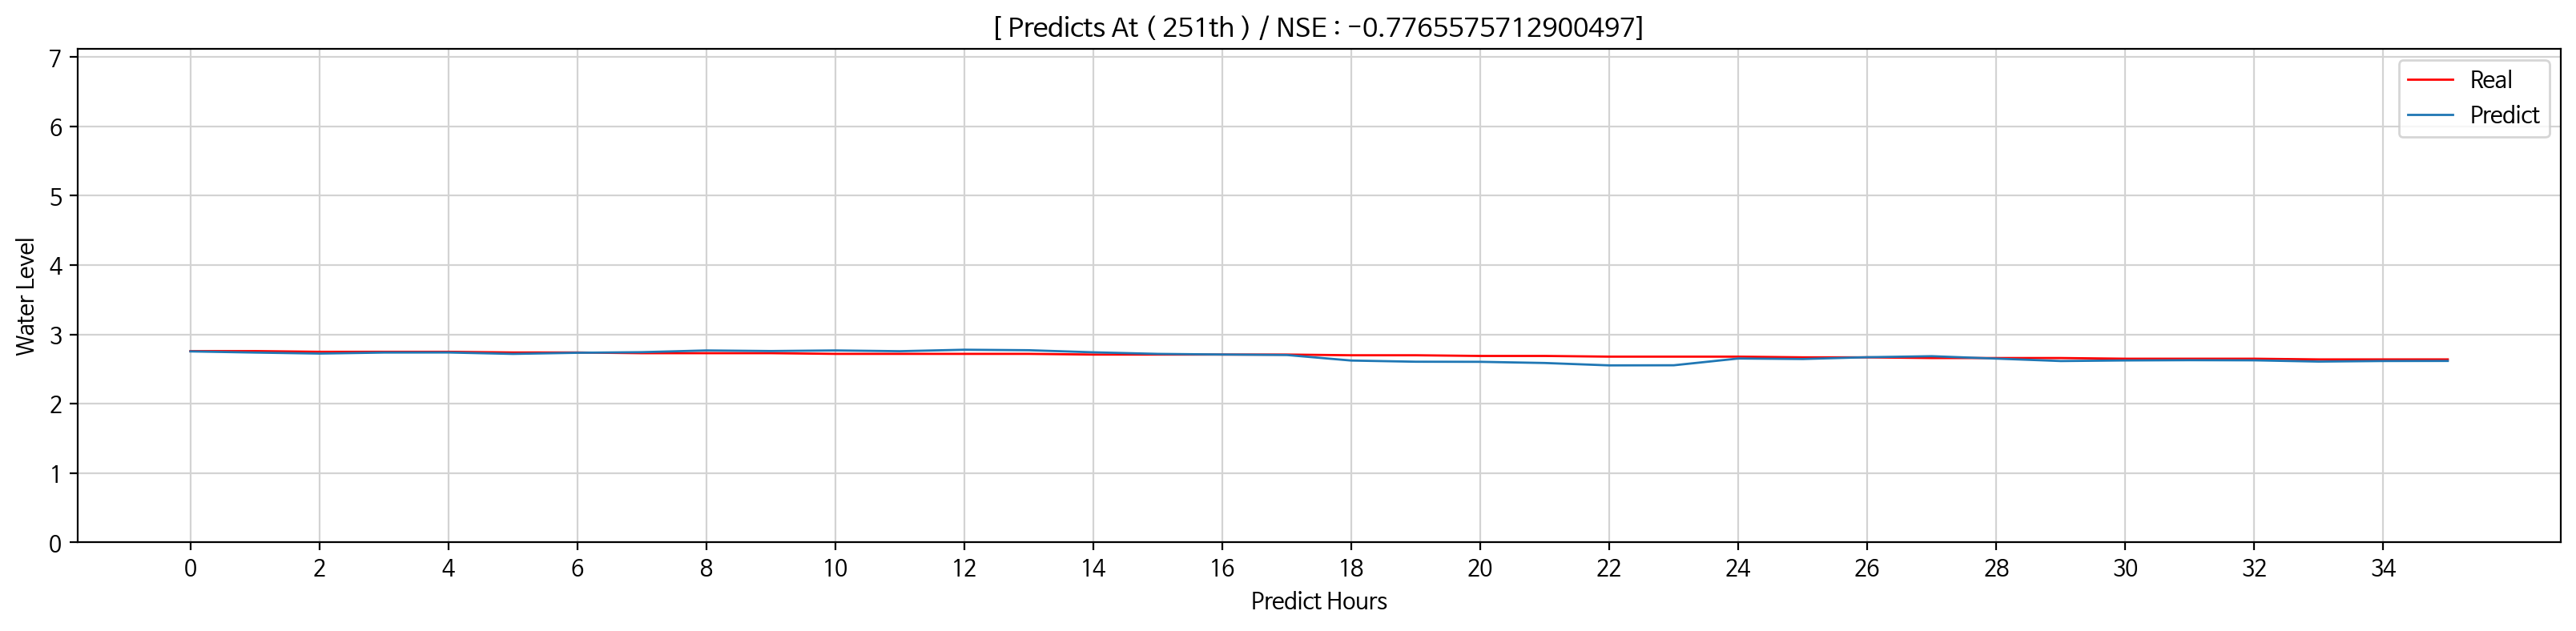

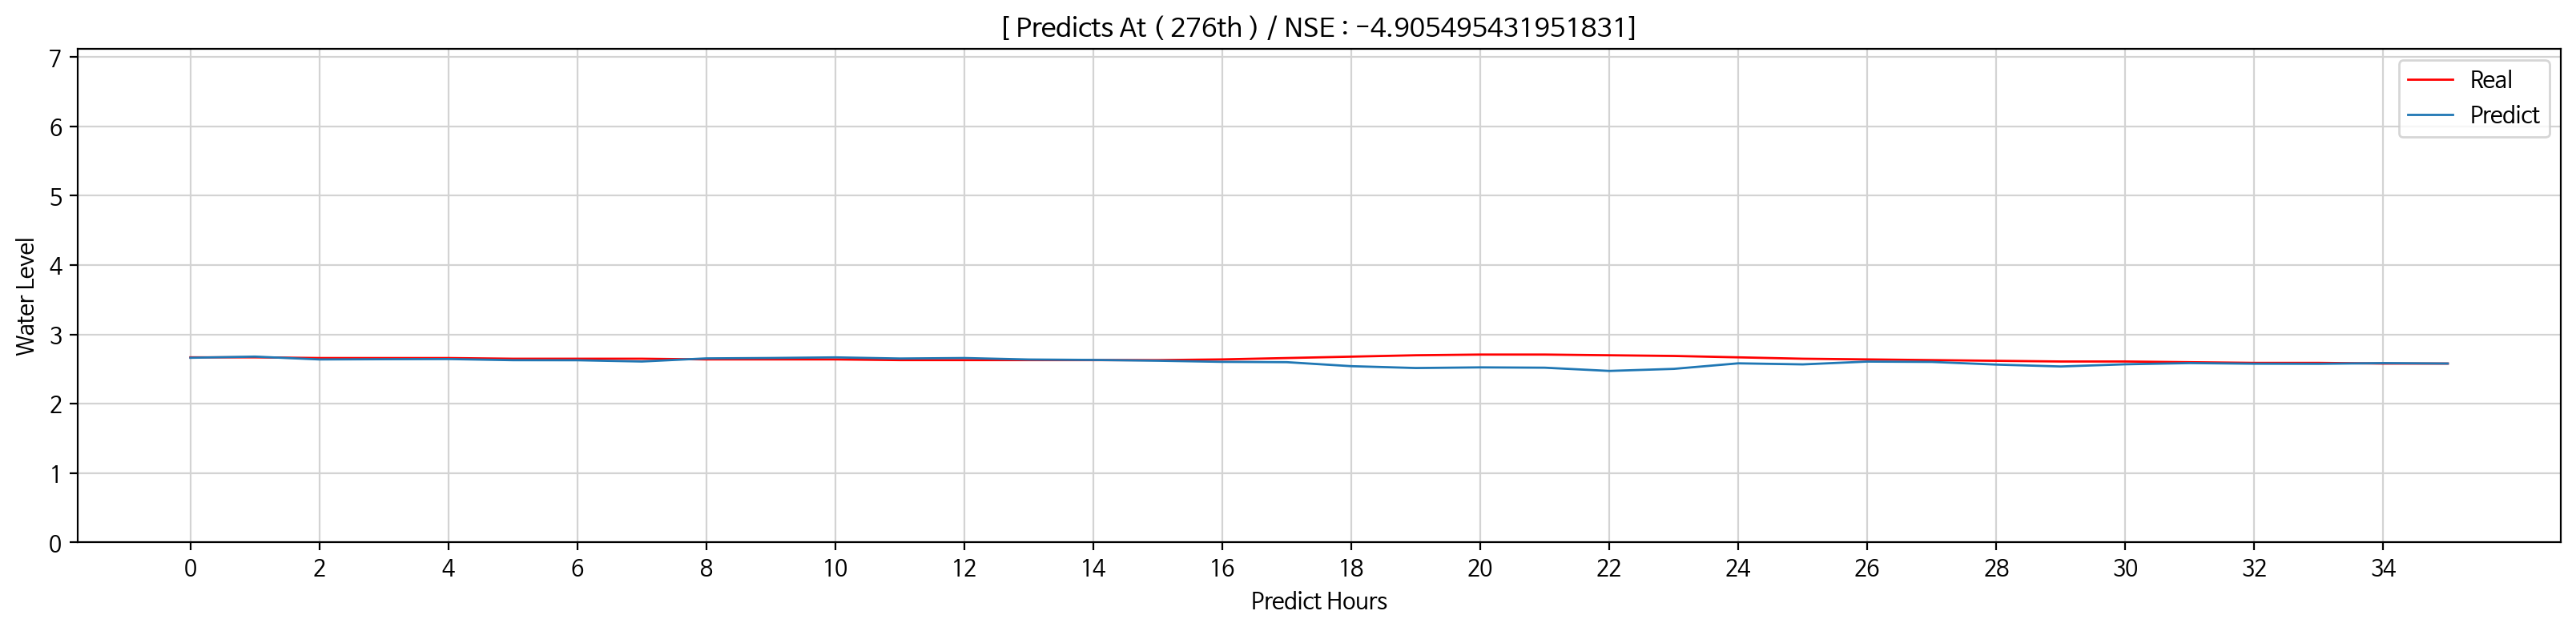

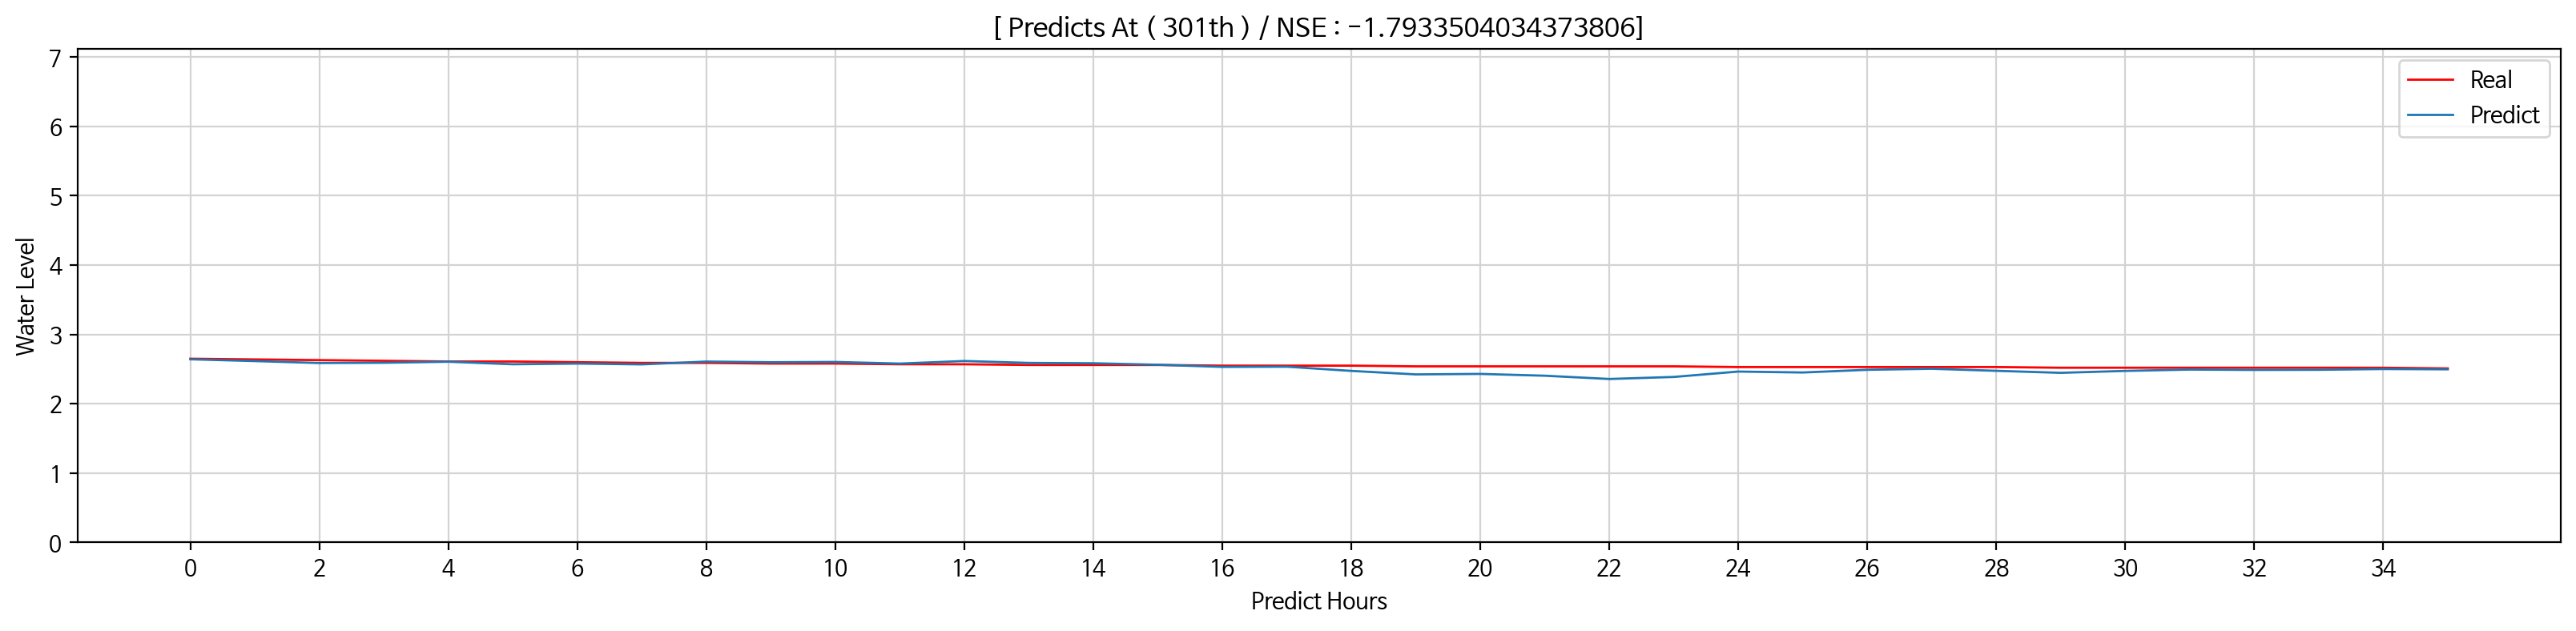

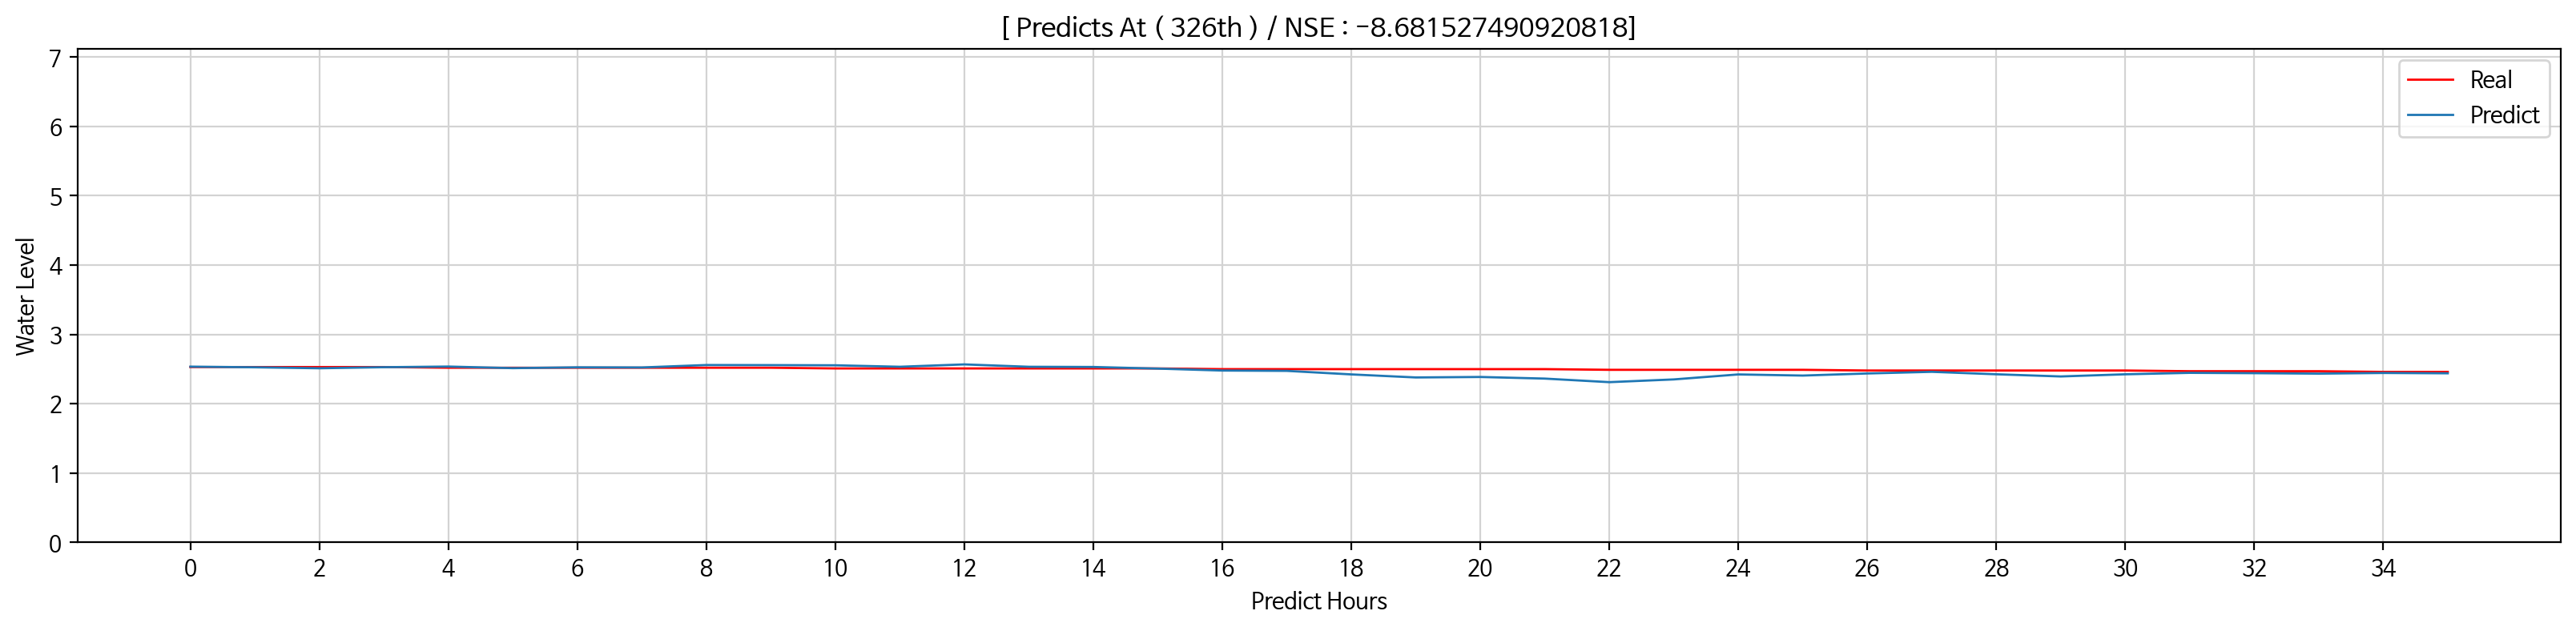

In [82]:
##### %%skip isSkipPredictDetailChart skipping.... Charting 

# 특정 시점에서의 장시간 예측 결과 그래프 그리는 함수 ( 예측 시점(특정 샘플)에서의 장기 예측 그래프 ) 
def drawPredictsAtStep(v_df, v_start=0, v_end=1, v_step=1, graph_size=(20,4)):
  # 최대 예측 횟수
  max_step_cnt = v_df.shape[0]
  # 최대 예측 시간
  max_pred_hour = (v_df.shape[1] - 1)//2

  # 최대값 추출 
  max_val = v_df.iloc[:,1:].max().max()

  if v_end > max_step_cnt :
    v_end = max_step_cnt
    print(f'End Index is too large. ( it is replaced with {max_step_cnt}.)')

  
  for i in range(v_start, v_end, v_step):
      fig = plt.figure(figsize=graph_size)

      real_hour = v_df.iloc[i:i+1, 1:max_pred_hour+1].T.reset_index(drop=True)
      pred_hour = v_df.iloc[i:i+1, max_pred_hour+1: ].T.reset_index(drop=True)

      r2 = r2_score(real_hour, pred_hour)  # 결정계수 R^2

      plt.title(f'[ Predicts At ( {i+1}th ) / NSE : {r2}]')
      plt.ylim(0.0, max_val*1.1)
      plt.plot(real_hour , 'r', linewidth=1, label='Real')
      plt.plot(pred_hour, linewidth=1, label='Predict')
      plt.grid(axis = 'x', color = 'lightgray')
      plt.grid(axis = 'y', color = 'lightgray')
      plt.xticks([i for i in range(0,max_pred_hour,2) ])
      plt.ylabel('Water Level')  
      plt.xlabel('Predict Hours')  

      plt.legend()
      plt.show()


def getDataFrameFromCSV(v_csv_file, v_idx):
    print(f'Model Predict Files :{v_csv_file}')
    return pd.read_csv(v_csv_file)

pred_df = getDataFrameFromCSV(predict_files[-1], 0) # 대곡교
# drawPredictsAtStep(v_df=pred_df, v_start=0, v_end=1, v_step=8, graph_size=(20,4))
drawPredictsAtStep(pred_df, 0, 1000, 25, (20,4) )

In [83]:
import pickle

def save_model_scaler(model_path, scaler_path) :
    print(f'- Model File : {model_path}')
    os.makedirs('./model_stage', exist_ok=True)
    model.save(model_path)

    print(f'- Scaler File : {scaler_path}')
    with open(scaler_path, 'wb') as file:
        pickle.dump(scalers[0], file)
        pickle.dump(scalers[1], file)
        pickle.dump(scalers[2], file)


# MultiStepModel의 경우 향후 사용을 위해 MultiStepModel 저장
if is_save_model :
    if config['use_model'] == 'MultiStepModel' :
        save_model_scaler(multistep_model_path, multistep_scaler_path)
    else :
        now = datetime.now().strftime('%Y%m%d_%H%M%S')
        save_model_scaler(f'./model_stage/model_{now}', f'./model_stage/scaler_{now}.pkl')


- Model File : ./model_stage/model_20251117_170114
INFO:tensorflow:Assets written to: ./model_stage/model_20251117_170114/assets


INFO:tensorflow:Assets written to: ./model_stage/model_20251117_170114/assets


- Scaler File : ./model_stage/scaler_20251117_170114.pkl


### Detail Charting

In [84]:
# 가독성을 위해 데이터를 나누어 chart 생성 함수

# pred_pd : 표시할 dataframe
# scale   : 한 그래프에 표시할 데이터 수
# fig_size : 하나의 그래프의 크기
def drawPredict(pred_pd, scale, fig_size=(20,5)):

    # 폰트 크기
    plt.rcParams["font.size"] = 11
    
    for i in range(0, pred_pd.shape[0],scale):

        p_df = pred_pd[i:i+scale]

        fig = plt.figure(figsize=fig_size)
        plt.title(f'[ {p_df.index[0]} ~ {p_df.index[-1]} ]')

        # Y 축 최대/최소값 설정
        Y_AXIS_MAX_FIX = 30  
        Y_AXIS_MIN_FIX = 0  

        # 표시할 최대값이 Y_AXIS_MAX_FIX 보다 클 경우 Y축 최대값 수정
        tmp = np.max(p_df['predict'])
        y_max = tmp if tmp > Y_AXIS_MAX_FIX else Y_AXIS_MAX_FIX
        tmp = np.max(p_df['real'])
        y_max = tmp if tmp > y_max else y_max 

        # 표시할 최소값이 Y_AXIS_MIN_FIX 보다 작을 경우 Y축 최소값 수정
        tmp = np.min(p_df['predict'])
        y_min = tmp if tmp < Y_AXIS_MIN_FIX else Y_AXIS_MIN_FIX
        tmp = np.min(p_df['real'])
        y_min = tmp if tmp < y_min else y_min

        # Y축 설정
        plt.ylim( y_min, y_max)

        # 그래프에 예측값과 실제값 그리기
        plt.plot(p_df.index, p_df['real'], 'r', linewidth=1, label='Real')
        plt.plot(p_df.index, p_df['predict'], linewidth=1, label='Predict')
        plt.grid(axis = 'x', color = 'lightgray')
        plt.grid(axis = 'y', color = 'lightgray')

        # x축 tick 갯수
        n_xticks = 8
        plt.xticks([ p_df.iloc[(p_df.shape[0]-1)//n_xticks*j].name for j in range(0,n_xticks+1) ])

        # 예측 및 측정치가 설정된 값 이상일 경우 Y축 색을 붉은색으로 변경 
        if y_max > Y_AXIS_MAX_FIX :
            plt.tick_params(axis='y', labelcolor='red')
        else:
            plt.tick_params(axis='y', labelcolor='black')

        plt.legend()
        plt.show()

In [85]:
%%skip isSkipPredictDetailChart skipping.... Charting 

# 차트당 표시할 격자의 최대수 
# 24 시간 * 30 일  * 1달
n_point = 24*30*1

print(f'[ Train Set Part Predict ]')
for i in range(0, len(train_list)):
    v_hour  = int(i/target_cnt + 1)
    v_cname = y_cols[i%target_cnt]
    print(f'[ { v_cname } / {v_hour} Hour(s) ]')
    drawPredict(train_list[i], n_point, fig_size=(20,7))

print(f'\n[ Validation Set Predict ]')
for i in range(0, len(valid_list)):
    v_hour  = int(i/target_cnt + 1)
    v_cname = y_cols[i%target_cnt]
    print(f'[ { v_cname } / {v_hour} Hour(s) ]')
    drawPredict(valid_list[i], n_point, fig_size=(20,7))

print(f'\n[ Test Set Predict ]')
for i in range(0, len(test_list)):
    v_hour  = int(i/target_cnt + 1)
    v_cname = y_cols[i%target_cnt]
    print(f'[ { v_cname } / {v_hour} Hour(s) ]')
    drawPredict(test_list[i], n_point, fig_size=(20,7))



 skipping.... Charting


In [86]:
%%script echo skipping

from IPython.display import HTML
alertEnd = '<iframe width="560" height="315" src="https://www.youtube.com/embed/5GrrT7Pbr6A?autoplay=1&mute=0" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>'

HTML(alertEnd)

skipping


# Tuning

## Keras Tuner ( Hyper Parameter )

In [87]:
%%script echo skipping

# keras tuner 설치
# !pip install -q -U keras-tuner

skipping


In [88]:
if config['isExecTuning'] :
    isTuningSkip = False 
else:
    isTuningSkip = True

print('isTuningSkip : ', isTuningSkip) 


isTuningSkip :  True


In [89]:
%%skip isTuningSkip : isExecTuning=False 로 Skip

# keras 필요 패키지 import
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Bidirectional
from keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

import tensorflow as tf
import keras_tuner as kt
import IPython

class HyperTuningModel(kt.HyperModel):
    
    def build(self, hp):
        # Tuning할 LSTM family Layer 셀 숫자의 Range 설정 
        # 최소 32 / 최대 256/ 간격 32 ( 8 Case )
        # 셀 갯수는 최소 ~ 최대 사이의 값을 간격값의 간격으로 탐색함. ( cf 아래의 학숩율 선택)
        hp_num_of_cell    = hp.Int('units', min_value = 64, max_value = 256, step = 64)
        hp_num_of_cell2   = hp.Int('units_fc', min_value = 64, max_value = 256, step =64)
        
        # layer 수 
        # hp_num_of_layer = hp.Int('layers', min_value = 1, max_value = 4,  step = 1 )
        # tuning할 변수(셀 갯수)를 넣고 모델 생성 ( 셀 갯수 파라미터에 변수를 넣고 기존 모델 생성과 동일하게)
        # 아래 경우는 Stateless 인 경우임 
        
        model = build_model(config['use_model'], hp_num_of_cell, hp_num_of_cell2, config['predict'])
        
        # 옵티마이저의 학습율 설정 Tuning (보통 학습울이 작을 경우 학습 속도가 너무 느리고 학습율이 클 경우 최적의 값에 수렴하지 못함. default =  )
        # 학습율의 경우 리스트 중 선택하는 방식으로 최적의 값을 선정함 ( 0.01 / 0.001 / 0.0001 , default - 0.001, 3 Case )
        hp_learning_rate = hp.Choice('learning_rate', values = [0.001, 0.0005, 0.0001]) 
    
        # 모델 학습 설정
        model.compile(loss = 'mean_squared_error', optimizer = Adam(learning_rate = hp_learning_rate))
        
        return model
    
    def fit(self, hp, model, *args, **kwargs):
        # batch size 도 16 / 32 / 64 의 값중 선택하도록 설정함. ( 3 Case )
        # stateful의 경우 batch_size 를 num_of_batch 의 배수 형태로 리스트를 구성해야 함. data set의 수가 num_of_batch 의 배수 관계이어야 하므로)
        return model.fit( *args, batch_size=hp.Choice("batch_size", [16, 32]), **kwargs, )

# tuning을 새롭게 시작하고자 할 경우  이전 자료 삭제 
# 만약 삭제하지 않는 경우는 이전 탐색 과정을 이어서 하게 됨.
#!rm -rf hypertuning

# 이전 자료 삭제시 Tuning 자료 save directory 생성 
#!mkdir hypertuning

# tuner의 종류는 RandomSearch, Hyperband, BayesianOptimization, Sklearn 이 있으나 Hyperband 추천
# objective : 최적치의 기준값
# max_epochs_val : 탐색시 수행할 최대 학습 수행 횟수
# factor : 토너먼트 방식으로 탐색시 한 브래킷에서 수행할 모델 수 ( 1 + log factor max_epochs_val )
#          토너먼트의 각단계마다 경합하는 모델의 수 ( 보통 3 )
#          ( 경합 모델이 많은 경우는 factor를 크게, 작을 경우는 적게 하는 것이 좋을 것으로 생각됨. )
# directory : tuning 결과 저장 디렉토리
# project_name : tuning project 명
# 각 단계마다 epochs를 2 -> 6 -> 17 -> 50 -> 6 -> 17 -> ... 로 순환 변경해 가면서 모델을 cut off 시키는 방식으로 진행됨.
# tuning 하는 조건에 따라 다르겠지만 대략 3시간 ~ 4시간 소요

# Max Epochs 가 너무 높은 경우 Resource 제한으로 오류 발생
# max_epochs_val = config['num_of_epochs
max_epochs_val = 200
datestr = datetime.now().strftime('%Y%m%d_%H%M')
# project_name = f"{config['use_model']}_{datestr}"
project_name = 'LSTM_20240729_1845'
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

# tuner = kt.Hyperband(
#     HyperTuningModel(),
#     objective = 'val_loss', 
#     max_epochs = 30,
#     factor = 3,
#     directory = 'hypertuning',
#     project_name = project_name)


# tuner = kt.GridSearch(
#     HyperTuningModel(),
#     objective='val_loss',
#     # max_trials=32,
#     directory='hypertuning',
#     project_name=project_name
# )

tuner = kt.RandomSearch(
    HyperTuningModel(),
    objective='val_loss',
    max_trials=40,  
    directory='hypertuning',
    project_name=project_name
)

# 모델 학습 실행하여 최적의 hyper parameter 검색 ( units / batch_size / learning_rate  / 최적의 epochs 횟수)
# tuner.search(trainX, trainY, epochs = max_epochs_val, validation_data = (validX, validY))
# 연속적으로 patience 수만큼 val_loss 개선이 없는 경우 해당 epochs에서 중단할 수 있음
tuner.search([trainX, trainF], [trainY], epochs=max_epochs_val, validation_data=([validX, validF] , [validY] ), callbacks=[EarlyStopping('val_loss', patience=10)])

 : isExecTuning=False 로 Skip


## Tunig 결과 저장

In [90]:
%%skip isTuningSkip : config.isExecTuning=False 로 Skip

# Tuning 수행 결과 ( Top 10 )
tuner.results_summary()

# Best Tuning Result
best_hps = tuner.get_best_hyperparameters(num_trials = 1)[0]

print('\n=================================')
print('- Model Type : ', config['use_model'] )
print('---------------------------------')
print_config(config)
print('\n---------------------------------')
# print('Optimal The number of units : ', best_hps.get('units') )
# print('Optimal Learning rate : ', best_hps.get('learning_rate'))
# print('Optimal Batch size : ', best_hps.get('batch_size'))
# print('Optimal Epochs : ', best_hps.get('tuner/epochs'))
for key, value in best_hps.values.items():
    print(f"Best {key}: {value}")
print('=================================')

 : config.isExecTuning=False 로 Skip


In [91]:
%%skip isTuningSkip skip... : config.isExecTuning=False 로 Skip

import io
from contextlib import redirect_stdout

output_buf = io.StringIO()

with redirect_stdout(output_buf):
    best_hps = tuner.get_best_hyperparameters(num_trials = 1)[0]
    print('\n=================================')
    print('- Date : ', datetime.now().strftime('%Y/%m/%d %H:%M:%S'))
    print(' ')
    print('- Model Type : ', config['use_model'] )
    print('---------------------------------')
    print_config(config)
    print('\n---------------------------------')
    # print('Optimal The number of units : ', best_hps.get('units') )
    # print('Optimal Learning rate : ', best_hps.get('learning_rate'))
    # print('Optimal Batch size : ', best_hps.get('batch_size'))
    # print('Optimal Epochs : ', best_hps.get('tuner/epochs'))
    
    for key, value in best_hps.values.items():
        print(f"Best {key}: {value}")
    
    print('\n---------------------------------')
    print('[ Tuning Result Summary ]')
    tuner.results_summary()
    print('=================================\n\n')


with open('./hypertuning/model_tuning.txt', 'a', encoding="utf8") as f:
    f.write(output_buf.getvalue())

output_buf.close()

 skip... : config.isExecTuning=False 로 Skip


## Tuning 최적 모델 생성 및 학습

In [92]:
%%skip isTuningSkip skip... : config.isExecTuning=False 로 Skip

# 최적의 hyper parameter 값으로 모델을 build 하고 훈련을 수행
# 예시로 LSTM 결과는 아래와 같음
# =================================
# Optimal The number of units :  320
# Optimal Learning rate :  0.001
# Optimal Batch size :  64
# Optimal Epochs :  50

# units: 320
# learning_rate: 0.001
# batch_size: 64
# tuner/epochs: 50
# tuner/initial_epoch: 17
# tuner/bracket: 1
# tuner/round: 1
# tuner/trial_id: 0077
# Score: 0.0016774131217971444
# =================================

model = tuner.hypermodel.build(best_hps)
# model = build_model(config['use_model, best_hps.get('units'), config['n_layers)
# adam = Adam(lr=best_hps.get('learning_rate'), beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
# model.compile(loss='mean_squared_error', optimizer=adam)
model.summary()
model.fit([trainX,trainF], [trainY], 
          epochs     = max_epochs_val , 
          batch_size = best_hps.get('batch_size'), 
          validation_data = ([validX, validF], [validY]), 
          callbacks=[EarlyStopping('val_loss', patience=10, restore_best_weights=True)])

 skip... : config.isExecTuning=False 로 Skip


In [93]:
%%script echo skipping...

# checkpoint 파일에서 최적의 모델 로드 ( isCheckpoint = True 인 경우만 )
# ex : ./gdrive/MyDrive/Project/colab/LSTM_b32_s12_d2_best.hdf5 
if config['isCheckpoint'] :
  model = load_model(chkpt_filename, custom_objects={"WeightedMSE": WeightedMSE})
  model_result.chkpt_file = chkpt_filename
  print('Trained Model is loaded from [', chkpt_filename, ']')
else :
  print('Bacause isCheckpoint is False, model is not in best status and Model Trained status was not saved.')

skipping...


In [94]:
%%script echo skipping

from IPython.display import HTML
alertEnd = '<iframe width="560" height="315" src="https://www.youtube.com/embed/5GrrT7Pbr6A?autoplay=1&mute=0" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>'

HTML(alertEnd)

skipping


# 모델 가시화,모델 저장 및 로드

## 모델 가시화

In [95]:
%%script echo Package 미설치시 uncomment후 실행
# 모델 가시화 Package

!pip install plot_model
!pip install pydot
!pip install keras-utils
!pip install graphviz

Package 미설치시 uncomment후 실행


In [96]:
#%%script echo skipping
# 모델 가시화

from tensorflow.keras.utils import plot_model
from IPython.display import SVG

def printModelInfo(v_model):
    print('[ Model Summary ]')
    v_model.summary()

    print('\n[Layers]') 
    display(v_model.layers)
    print('[Input]') 
    display(v_model.layers[ 0].input )
    print('[Output]')
    display(v_model.layers[-1].output)

# Model Stout Print
printModelInfo(model)

# SVG Format
# img1 = SVG(model_to_dot(model, show_shapes=True, dpi=80).create(prog='dot', format='svg'))
# print('\n\n[ SVG Format ]')
# display(img1)

# PNG Format
img2 = plot_model(model, show_shapes=True, dpi=100)
print('\n\n[ PNG Format ]')
display(img2)

[ Model Summary ]
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, None, 10)]           0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, None, 8)]            0         []                            
                                                                                                  
 multi_lstm__model (MultiLS  (None, 36, 1)                500107    ['input_1[0][0]',             
 TM_Model)                                                           'input_2[0][0]']             
                                                                                                  
Total params: 500107 (1.91 MB)
Trainable params: 500107 (1.91 MB)
Non-traina

[Input]


<KerasTensor: shape=(None, None, 10) dtype=float32 (created by layer 'input_1')>

[Output]


<KerasTensor: shape=(None, 36, 1) dtype=float32 (created by layer 'multi_lstm__model')>

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


[ PNG Format ]


None

## Data 저장 및 로드

In [97]:
%%script echo skip dill Package 설치

!pip install dill

skip dill Package 설치


In [98]:
%%script echo skip dill Package 설치

# 데이터 및 관련 정보를 저장

import pickle
import dill

dirname = './trained/'
filename = config['name'] + '_' + config['use_model'] + '_S' + str(config['seq_length']) + '_data.pkl'

with open(filename, 'wb') as file:
    dill.dump(config, file)
    dill.dump(model_result, file)

    dill.dump(trainX, file)
    dill.dump(trainF, file)
    dill.dump(trainY, file)
    dill.dump(trainI, file)
    
    dill.dump(validX, file)
    dill.dump(validF, file)
    dill.dump(validY, file)
    dill.dump(valid I, file)
    
    dill.dump(testX, file)
    dill.dump(testF, file)
    dill.dump(testY, file)
    dill.dump(testI, file)

!ls -l {filename}


skip dill Package 설치


# 결과 HTML 저장 및 외부 자동 실행

In [99]:
%%script echo HTML Generating skip...
# Jupyter Notebook 실행 결과 Html 파일로 저장 
# --execute : notebook 실행 여부 ( 주의 : notebook에서 바로 실행하는 경우 무한 loop 가능성 있으니 Cell 내에서 실행되지 않도록 확인 )
# --allow-errors : 노트북 수행중 Error/Exception 발생시 실행 중지 여부 ( Keras Tuning 실행 여부 Option에서 사용하므로 Keras Version은 반드시 옵션 추가 필요
# --HTMLExporter.theme : HTML 스타일 ( dark/light )
# --no-input : 명령창 출력 여부
# --output : 생성할 파일명 ( output directory 사용 )

# 많은 Case의 실행은 설정파일에 각 옵션을 저장하고 하위 프로그램을 호출하는 방식으로 실행됩니다.
# batch_execute_all.sh     -->  batch_execute_withpara.sh           -->  notebook 실행
# [Case 변경 / shell 실행 ]    [ valid set 변경 / notebook 실행 ]     [ 설정내용에 따라 수행]
#
#!jupyter nbconvert --to=html --no-input --HTMLExporter.theme=dark --output='LSTM_NamGang_Real_1hour_event5_6.html' 'NamGang_LSTM_Keras.ipynb' 
#!jupyter nbconvert --execute --allow-errors --to=html --no-input --HTMLExporter.theme=dark --output='./output/LSTM_NamGang_Sim_5min_event5_6.html' 'NamGang_LSTM_Keras.ipynb' 


# 다음 오류시 :  metadata["widgets"][WIDGET_STATE_MIMETYPE]["state"] KeyError: 'state'
# jq -M 'del(.metadata.widgets)' original_file.ipynb > fixed_file.ipynb
# 처리후 수행

HTML Generating skip...
